In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [195]:
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier

In [4]:
test_array = np.array([1, 2, 3])
test_array**2

a,b = 5, 5
a, b

(5, 5)

In [7]:
p = np.array([.1, .2, .3])
p * (1-p)

array([0.09, 0.16, 0.21])

#### tree objects

In [60]:
def p_to_logit(p: float):
    assert p > 0 and p <1
    return np.log(p/(1-p))

In [209]:
from dataclasses import dataclass
from typing import Optional

def logit_to_p(logit: float):
    return np.exp(logit)/(1+np.exp(logit))

@dataclass
class Tree:
    left: Optional= None
    right: Optional = None
    parent: Optional = None
    feature_idx: Optional[int] = None
    split_value: Optional[float] = None
    predict_value: Optional[float] = None
    depth: Optional[int] = 0
    
    def apply(self, x: np.array):
        """return the root node of the tree"""
        return 
    
    def __repr__(self):
        return f"Tree feature_idx:'{self.feature_idx}' split_value:'{self.split_value}'\n"+\
            f"predicted_value:{self.predict_value}"
    
    def __str__(self):
        return self.__repr__()
    
    
    def apply_single_input(self, input_feature_array: np.array):
        """for each instance, apply the decision tree."""
        # if leaf, return predicted value
        if self.feature_idx is None:
            return self.predict_value
        if input_feature_array[self.feature_idx] <= self.split_value:
            return self.left.apply_single_input(input_feature_array)
        else:
            return self.right.apply_single_input(input_feature_array)
            
    def apply(self, input_df: pd.DataFrame):
        """apply decision tree for the whole tree"""
        # skip the index column
        #print(f"input df shape from tree: {input_df.shape}")
        intermediate_output = [self.apply_single_input(row)  for row in input_df.values]
        output_array = np.array(intermediate_output)
        #print(f"intermediate shape from tree: { [row  for row in input_df.values]}")
        #print(f"output df shape from tree: {output_array.shape}")
        return output_array
    
def find_tree_split(feature_df: pd.DataFrame, y:np.array, p: np.array):
    """
    curr_score = residuals**2/len(residuals)

    for feature_index in range(len(features)):

        for value in input_df.sort_values(feature_index)[feature_index]:


            residuals_left = y[input_df.query(f"")]  
            residuals_right = y[input_df.query(f"")]

            # the score of squre lost is just residuals / (num residuals + lambda)
            score_left = residuals_left**2/len(residuals_left)
            score_right = residuals_right**2/len(residuals_left)
    return:
        feature_idx,
        best_split_value,
    """
    residuals = y - p
    parent_score = np.sum(residuals)**2/np.sum(p * (1-p))
    best_score = 0 #float(parent_score)
    n_features = feature_df.shape[1]
    features = list(feature_df.columns)

    best_feature_idx = None
    best_split_value = None
    predicted_left, predicted_right = None, None
    if feature_df.shape[0] == 1:
        return best_feature_idx, best_split_value, predicted_left, predicted_right
    for feature_idx in range(n_features):
        # sort data to see the split
        feature_df = feature_df.sort_values(feature_df.columns[feature_idx]) #sort feature_df
        feature_values = feature_df[features[feature_idx]]
        candidate_values = feature_values.unique()
        # need to handle where there is only 1 unique value 
        if len(candidate_values) ==1:
            continue 
        #dont have to consider maximum value since it doesn't create split 
        for candidate_value in candidate_values[:-1]: 
            print(f"feature_idx: {feature_idx}, feature_value: {candidate_value}")
            left_indices = feature_values <= candidate_value
            right_indices = feature_values > candidate_value
            p_left = p[left_indices]
            p_right = p[right_indices]
  
            # no regularizations
            # with square loss, griadent is just residuals, hessians is 1
            try:
                score_left = np.sum(residuals[left_indices])**2/np.sum(p_left * (1-p_left))
                score_right = np.sum(residuals[right_indices])**2/np.sum(p_right * (1-p_right))
            except Exception as e:
                print("ran in to error")
                print(f"residuals {residuals}")
                print(f"left_indices {left_indices}")
                raise 
            split_score = score_left + score_right - parent_score
            print(f"""best_value:{np.round(best_score, 2)}, split_score:{np.round(split_score,2)}\n"""+\
            f"""left_score:{np.round(score_left,2)}, right_score:{np.round(score_right,2)}\n\n""")
            if  split_score > best_score:
                print(f"find new best: {np.round(split_score,2)}, old_score: {best_score}")
                best_score = split_score
                best_split_value = candidate_value
                best_feature_idx = int(feature_idx)
                predicted_left = np.sum(residuals[left_indices])/np.sum(p_left * (1-p_left))
                predicted_right = np.sum(residuals[right_indices])/np.sum(p_right * (1-p_right))
    return best_feature_idx, best_split_value, predicted_left, predicted_right
                
class gradientTreeRegressor:
    def __init__(self, learning_rate: float=0.3, max_depth: int=5, min_leaf_size=1):
        self.max_depth = max_depth
        self.min_leaf_size = min_leaf_size
        self.learning_rate = learning_rate
        self.tree = None
        
    def predict(self, input_df:pd.DataFrame):
        """
        predict value given input dataframe
        """
        return self.tree.apply(input_df)
    
    def fit(self, feature_df:pd.DataFrame, y: np.array, p: np.array):
        """
        fitting a single tree
        """
        res = y - p
        prediction_value = np.sum(res)/np.sum(p * (1-p))
        root = Tree(predict_value=prediction_value, depth=1) 
        print(root)
        #res = y - prev_prediction
        stack = [(root, feature_df, y, p)]
    
        while stack:
            print("checking stack")
            print([tuple_[1].shape[0] for tuple_ in stack]) # print input feature_df
            print([tuple_[2].shape[0] for tuple_ in stack]) # check y-s
            curr_node, feature_df, y, p = stack.pop(0)
            print(f"current feature_df： {feature_df.shape}")
            
            if curr_node.depth >= self.max_depth:
                continue
                
            
            feature_idx, split_value, left_predicted, right_predicted = find_tree_split(feature_df, y, p)
            if feature_idx is None:
                # training is done
                print("no feature idx, skpping")
                continue
            curr_node.feature_idx = feature_idx
            curr_node.split_value = split_value
            
            
            split_col = feature_df.columns[feature_idx]
            sorted_feature_df = feature_df.sort_values(split_col)
            left_feature_df = sorted_feature_df[sorted_feature_df[split_col] <= split_value].copy()#.reset_index(drop=True)
            right_feature_df = sorted_feature_df[sorted_feature_df[split_col] > split_value].copy()#.reset_index(drop=True)
            
            # need to get the p and the y in sorted orders
            p_left = p[sorted_feature_df.index][sorted_feature_df[split_col] <= split_value] 
            p_right =  p[sorted_feature_df.index][sorted_feature_df[split_col] > split_value]
            
            y_left = y[sorted_feature_df.index][sorted_feature_df[split_col] <= split_value] 
            y_right = y[sorted_feature_df.index][sorted_feature_df[split_col] > split_value]
            
            print(f"left res {left_feature_df.shape}")
            print(f"right res {right_feature_df.shape}")
            print(f"left y {y_left.shape}")
            print(f"right y {y_right.shape}")
            print(f"left p {p_left.shape}")
            print(f"right p {p_right.shape}")
            
            left_tree = Tree(predict_value=left_predicted, depth=curr_node.depth+1)
            right_tree = Tree(predict_value=right_predicted,depth=curr_node.depth+1)
            #eft_feature_df, left_res, 
            curr_node.left = left_tree
            curr_node.right = right_tree
            
            stack.append((left_tree, left_feature_df, y_left, p_left))
            stack.append((right_tree, right_feature_df, y_right, p_right))
            print("end check stack ###\n\n")
        self.tree = root
        return root
    
class xgboostRegressor:
    def __init__(self, n_estimators: int=5, learning_rate: float=0.1, max_depth: int=5, min_leaf_size=1):
        """
        min_leaf_size is not yet implemented
        """
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.min_leaf_size = min_leaf_size
        self.regressors = []
        
    def fit(self, feature_df:pd.DataFrame, y: pd.Series):
        self.regressors = []
        curr_proba_prediction = pd.Series([0.5]*feature_df.shape[0]) # initial prediction is 0.5
        for i in range(self.n_estimators):
            # don't think learning rate matter in a single tree
            print(f"training {i}th tree")
            regressor = gradientTreeRegressor(max_depth=self.max_depth, min_leaf_size=self.min_leaf_size, 
                                         learning_rate=self.learning_rate)
            regressor.fit(feature_df, y, curr_proba_prediction)
            
            regressor_logit_predictions = pd.Series(regressor.predict(feature_df))
            print(f"regressor_predictions shape: {regressor_logit_predictions.shape}")
            
            curr_logit_prediction = curr_proba_prediction.apply(p_to_logit)
            
            curr_logit_prediction = curr_logit_prediction + self.learning_rate * regressor_logit_predictions
            curr_proba_prediction = curr_logit_prediction.apply(logit_to_p)
            print(f"curr prediction shape:{curr_proba_prediction.shape}")
            self.regressors.append(regressor)
            
            print("done training \n\n")
        return self.regressors
    
    def predict(self, feature_df: pd.DataFrame):
        """assume the model is trained"""
        curr_proba_prediction = pd.Series([0.5]*feature_df.shape[0]) # initial prediction is 0.5
        for regressor in self.regressors:
            # don't think learning rate matter in a single tree
            curr_logit_prediction = curr_proba_prediction.apply(p_to_logit)
            regressor_logit_predictions = pd.Series(regressor.predict(feature_df))
            curr_logit_prediction = curr_logit_prediction + self.learning_rate * regressor_logit_predictions
            curr_proba_prediction = pd.Series(curr_logit_prediction).apply(logit_to_p)
            #print(f"curr prediction shape:{curr_proba_prediction.shape}")
        return curr_proba_prediction


#### single tree testing

In [38]:
new_tree = Tree(feature_idx=5, split_value=5)
left_tree = Tree(parent=new_tree, predict_value=10)
right_tree = Tree(parent=new_tree, predict_value=15)

In [39]:
feature_df = pd.DataFrame({'1':[1, 5, 5, 4, 20], '2':[1, 1, 2, 5, 5]})
residuals = np.array([1, 1, 1, 0, 0])
feature_df 

,1,2
0,1,1
1,5,1
2,5,2
3,4,5
4,20,5


In [76]:
y = np.array([1  ,1, 1,0,0])
y.shape

(5,)

In [77]:
y[feature_df.sort_values('1').index]

IndexError: index 13 is out of bounds for axis 0 with size 5

In [42]:
find_tree_split(feature_df, y, np.array([0.5, 0.5, 0.5, 0.5, 0.5]))

feature_idx: 0, feature_value: 1
best_value:0, split_score:0.8
left_score:1.0, right_score:0.0


find new best: 0.8, old_score: 0
feature_idx: 0, feature_value: 4
best_value:0.8, split_score:2.13
left_score:2.0, right_score:0.33


find new best: 2.13, old_score: 0.8
feature_idx: 0, feature_value: 5
best_value:2.13, split_score:1.8
left_score:1.0, right_score:1.0


feature_idx: 1, feature_value: 1
best_value:2.13, split_score:2.13
left_score:2.0, right_score:0.33


feature_idx: 1, feature_value: 2
best_value:2.13, split_score:4.8
left_score:3.0, right_score:2.0


find new best: 4.8, old_score: 2.1333333333333333


(1, 2, 2.0, -2.0)

In [43]:
gtr = gradientTreeRegressor(max_depth=3)
tree = gtr.fit(feature_df, y, np.array([0.5, 0.5, 0.5, 0.5, 0.5]))

Tree feature_idx:'None' split_value:'None'
predicted_value:0.4
checking stack
[5]
[array([1, 1, 1, 0, 0])]
current feature_df： (5, 2)
feature_idx: 0, feature_value: 1
best_value:0, split_score:0.8
left_score:1.0, right_score:0.0


find new best: 0.8, old_score: 0
feature_idx: 0, feature_value: 4
best_value:0.8, split_score:2.13
left_score:2.0, right_score:0.33


find new best: 2.13, old_score: 0.8
feature_idx: 0, feature_value: 5
best_value:2.13, split_score:1.8
left_score:1.0, right_score:1.0


feature_idx: 1, feature_value: 1
best_value:2.13, split_score:2.13
left_score:2.0, right_score:0.33


feature_idx: 1, feature_value: 2
best_value:2.13, split_score:4.8
left_score:3.0, right_score:2.0


find new best: 4.8, old_score: 2.1333333333333333
left res (3, 2)
right res (2, 2)
end check stack ###


checking stack
[3, 2]
[array([1, 1, 1]), array([0, 0])]
current feature_df： (3, 2)
feature_idx: 0, feature_value: 1
best_value:0, split_score:0.0
left_score:1.0, right_score:2.0


feature_idx:

In [44]:
pd.concat([feature_df, pd.Series(y)],axis=1)

,1,2,0
0,1,1,1
1,5,1,1
2,5,2,1
3,4,5,0
4,20,5,0


In [45]:
tree

Tree feature_idx:'1' split_value:'2'
predicted_value:0.4

In [47]:
tree.left

Tree feature_idx:'None' split_value:'None'
predicted_value:2.0

In [48]:
tree.right

Tree feature_idx:'None' split_value:'None'
predicted_value:-2.0

In [49]:
tree.apply_single_input(np.array([40, 15]))

-2.0

In [13]:
tree.apply(feature_df) + 0.5

input df shape from tree: (5, 2)
output df shape from tree: (5,)


array([15., 15., 15.,  1., 10.])

In [14]:
tree.left

Tree feature_idx:'None' split_value:'None'
predicted_value:14.5

In [15]:
tree.right

Tree feature_idx:'0' split_value:'4'
predicted_value:5.0

In [16]:
tree.right.left

Tree feature_idx:'None' split_value:'None'
predicted_value:0.5

In [17]:
tree.right.right

Tree feature_idx:'None' split_value:'None'
predicted_value:9.5

In [18]:
gbregressor = GradientBoostingRegressor(n_estimators=2, learning_rate=1, max_depth=3)
gbregressor.fit(feature_df, y)

GradientBoostingRegressor(learning_rate=1, n_estimators=2)

In [19]:
sklearn_gb_pred = gbregressor.predict(feature_df)
np.mean((sklearn_gb_pred - y)**2)

0.0

#### loading iris dataset

In [64]:
from sklearn.datasets import load_iris

In [65]:
data = load_iris()

In [66]:
iris = pd.DataFrame(data['data'])
iris.columns = ['1', '2', '3', '4']
iris['target'] =data['target']
iris

,1,2,3,4,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


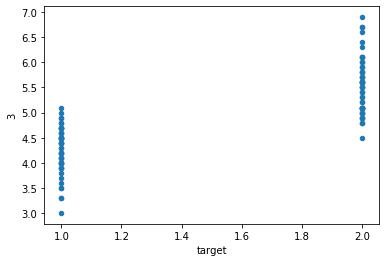

In [23]:
iris.query("target > 0").plot(x='target', y='3', kind='scatter')

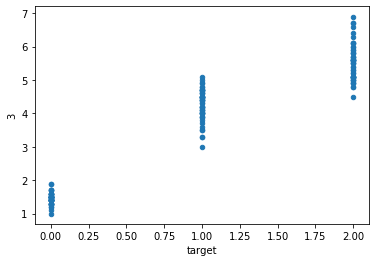

In [24]:
iris.plot(x='target', y='3', kind='scatter')

In [25]:
iris['target'].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

In [123]:
feature_df = iris[['1','2', '3']]
y = iris['target'] == 0

#### test_single grident tree regressor

In [152]:
gtr = gradientTreeRegressor(max_depth=3)
tree = gtr.fit(feature_df , y, pd.Series([0.5]*y.shape[0]))

Tree feature_idx:'None' split_value:'None'
predicted_value:-0.6666666666666666
checking stack
[150]
[150]
current feature_df： (150, 3)
feature_idx: 0, feature_value: 4.3
best_value:0, split_score:1.79
left_score:1.0, right_score:17.46


find new best: 1.79, old_score: 0
feature_idx: 0, feature_value: 4.4
best_value:1.79, split_score:7.31
left_score:4.0, right_score:19.97


find new best: 7.31, old_score: 1.7897091722595064
feature_idx: 0, feature_value: 4.5
best_value:7.31, split_score:9.2
left_score:5.0, right_score:20.86


find new best: 9.2, old_score: 7.30593607305936
feature_idx: 0, feature_value: 4.6
best_value:9.2, split_score:17.02
left_score:9.0, right_score:24.69


find new best: 17.02, old_score: 9.195402298850574
feature_idx: 0, feature_value: 4.7
best_value:17.02, split_score:21.1
left_score:11.0, right_score:26.77


find new best: 21.1, old_score: 17.021276595744684
feature_idx: 0, feature_value: 4.8
best_value:21.1, split_score:31.84
left_score:16.0, right_score:32.51





feature_idx: 2, feature_value: 4.1
best_value:133.33, split_score:78.26
left_score:13.93, right_score:81.0


feature_idx: 2, feature_value: 4.2
best_value:133.33, split_score:70.32
left_score:9.99, right_score:77.0


feature_idx: 2, feature_value: 4.3
best_value:133.33, split_score:66.67
left_score:8.33, right_score:75.0


feature_idx: 2, feature_value: 4.4
best_value:133.33, split_score:59.92
left_score:5.58, right_score:71.0


feature_idx: 2, feature_value: 4.5
best_value:133.33, split_score:48.28
left_score:1.94, right_score:63.0


feature_idx: 2, feature_value: 4.6
best_value:133.33, split_score:44.44
left_score:1.11, right_score:60.0


feature_idx: 2, feature_value: 4.7
best_value:133.33, split_score:38.6
left_score:0.26, right_score:55.0


feature_idx: 2, feature_value: 4.8
best_value:133.33, split_score:34.34
left_score:0.01, right_score:51.0


feature_idx: 2, feature_value: 4.9
best_value:133.33, split_score:29.49
left_score:0.15, right_score:46.0


feature_idx: 2, feature_val

best_value:0, split_score:0.0
left_score:70.0, right_score:30.0


feature_idx: 0, feature_value: 6.6
best_value:0, split_score:0.0
left_score:72.0, right_score:28.0


feature_idx: 0, feature_value: 6.7
best_value:0, split_score:0.0
left_score:80.0, right_score:20.0


feature_idx: 0, feature_value: 6.8
best_value:0, split_score:0.0
left_score:83.0, right_score:17.0


feature_idx: 0, feature_value: 6.9
best_value:0, split_score:0.0
left_score:87.0, right_score:13.0


feature_idx: 0, feature_value: 7.0
best_value:0, split_score:0.0
left_score:88.0, right_score:12.0


feature_idx: 0, feature_value: 7.1
best_value:0, split_score:0.0
left_score:89.0, right_score:11.0


feature_idx: 0, feature_value: 7.2
best_value:0, split_score:0.0
left_score:92.0, right_score:8.0


feature_idx: 0, feature_value: 7.3
best_value:0, split_score:0.0
left_score:93.0, right_score:7.0


feature_idx: 0, feature_value: 7.4
best_value:0, split_score:0.0
left_score:94.0, right_score:6.0


feature_idx: 0, feature_valu

In [154]:
logit_pred = pd.Series([0.5]*y.shape[0]).apply(p_to_logit) + pd.Series(tree.apply(feature_df)).apply(logit_to_p)
p_pred = logit_pred.apply(logit_to_p)

input df shape from tree: (150, 3)
output df shape from tree: (150,)


In [160]:
odd = np.exp(0.12)
p_to_logit(odd/(1+odd))

0.11999999999999986

In [156]:
np.array(logit_pred)

array([0.88079708, 0.88079708, 0.88079708, 0.88079708, 0.88079708,
       0.88079708, 0.88079708, 0.88079708, 0.88079708, 0.88079708,
       0.88079708, 0.88079708, 0.88079708, 0.88079708, 0.88079708,
       0.88079708, 0.88079708, 0.88079708, 0.88079708, 0.88079708,
       0.88079708, 0.88079708, 0.88079708, 0.88079708, 0.88079708,
       0.88079708, 0.88079708, 0.88079708, 0.88079708, 0.88079708,
       0.88079708, 0.88079708, 0.88079708, 0.88079708, 0.88079708,
       0.88079708, 0.88079708, 0.88079708, 0.88079708, 0.88079708,
       0.88079708, 0.88079708, 0.88079708, 0.88079708, 0.88079708,
       0.88079708, 0.88079708, 0.88079708, 0.88079708, 0.88079708,
       0.11920292, 0.11920292, 0.11920292, 0.11920292, 0.11920292,
       0.11920292, 0.11920292, 0.11920292, 0.11920292, 0.11920292,
       0.11920292, 0.11920292, 0.11920292, 0.11920292, 0.11920292,
       0.11920292, 0.11920292, 0.11920292, 0.11920292, 0.11920292,
       0.11920292, 0.11920292, 0.11920292, 0.11920292, 0.11920

In [155]:
np.array(p_pred)

array([0.70698737, 0.70698737, 0.70698737, 0.70698737, 0.70698737,
       0.70698737, 0.70698737, 0.70698737, 0.70698737, 0.70698737,
       0.70698737, 0.70698737, 0.70698737, 0.70698737, 0.70698737,
       0.70698737, 0.70698737, 0.70698737, 0.70698737, 0.70698737,
       0.70698737, 0.70698737, 0.70698737, 0.70698737, 0.70698737,
       0.70698737, 0.70698737, 0.70698737, 0.70698737, 0.70698737,
       0.70698737, 0.70698737, 0.70698737, 0.70698737, 0.70698737,
       0.70698737, 0.70698737, 0.70698737, 0.70698737, 0.70698737,
       0.70698737, 0.70698737, 0.70698737, 0.70698737, 0.70698737,
       0.70698737, 0.70698737, 0.70698737, 0.70698737, 0.70698737,
       0.52976549, 0.52976549, 0.52976549, 0.52976549, 0.52976549,
       0.52976549, 0.52976549, 0.52976549, 0.52976549, 0.52976549,
       0.52976549, 0.52976549, 0.52976549, 0.52976549, 0.52976549,
       0.52976549, 0.52976549, 0.52976549, 0.52976549, 0.52976549,
       0.52976549, 0.52976549, 0.52976549, 0.52976549, 0.52976

In [144]:
np.array((p_pred > 0.7))

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [128]:
from sklearn.tree import DecisionTreeClassifier

In [131]:
regressor = DecisionTreeClassifier(random_state=0, max_depth=3)
regressor.fit(feature_df, y)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [133]:
regressor.predict(feature_df)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [132]:
np.mean((regressor.predict(feature_df) == y))

1.0

#### test xgboost regressor

In [190]:
extremely_slow_regressor = xgboostRegressor(learning_rate=0.1, max_depth=3, n_estimators=20)

In [191]:
extremely_slow_regressor.fit(feature_df, pd.Series(y))

training 0th tree
Tree feature_idx:'None' split_value:'None'
predicted_value:-0.6666666666666666
checking stack
[150]
[150]
current feature_df： (150, 3)
feature_idx: 0, feature_value: 4.3
best_value:0, split_score:1.79
left_score:1.0, right_score:17.46


find new best: 1.79, old_score: 0
feature_idx: 0, feature_value: 4.4
best_value:1.79, split_score:7.31
left_score:4.0, right_score:19.97


find new best: 7.31, old_score: 1.7897091722595064
feature_idx: 0, feature_value: 4.5
best_value:7.31, split_score:9.2
left_score:5.0, right_score:20.86


find new best: 9.2, old_score: 7.30593607305936
feature_idx: 0, feature_value: 4.6
best_value:9.2, split_score:17.02
left_score:9.0, right_score:24.69


find new best: 17.02, old_score: 9.195402298850574
feature_idx: 0, feature_value: 4.7
best_value:17.02, split_score:21.1
left_score:11.0, right_score:26.77


find new best: 21.1, old_score: 17.021276595744684
feature_idx: 0, feature_value: 4.8
best_value:21.1, split_score:31.84
left_score:16.0, ri


feature_idx: 2, feature_value: 4.8
best_value:133.33, split_score:34.34
left_score:0.01, right_score:51.0


feature_idx: 2, feature_value: 4.9
best_value:133.33, split_score:29.49
left_score:0.15, right_score:46.0


feature_idx: 2, feature_value: 5.0
best_value:133.33, split_score:25.93
left_score:0.59, right_score:42.0


feature_idx: 2, feature_value: 5.1
best_value:133.33, split_score:19.54
left_score:2.21, right_score:34.0


feature_idx: 2, feature_value: 5.2
best_value:133.33, split_score:18.08
left_score:2.75, right_score:32.0


feature_idx: 2, feature_value: 5.3
best_value:133.33, split_score:16.67
left_score:3.33, right_score:30.0


feature_idx: 2, feature_value: 5.4
best_value:133.33, split_score:15.3
left_score:3.97, right_score:28.0


feature_idx: 2, feature_value: 5.5
best_value:133.33, split_score:13.33
left_score:5.0, right_score:25.0


feature_idx: 2, feature_value: 5.6
best_value:133.33, split_score:9.67
left_score:7.34, right_score:19.0


feature_idx: 2, feature_value:


feature_idx: 0, feature_value: 7.6
best_value:0, split_score:0.0
left_score:95.0, right_score:5.0


feature_idx: 0, feature_value: 7.7
best_value:0, split_score:0.0
left_score:99.0, right_score:1.0


feature_idx: 1, feature_value: 2.0
best_value:0, split_score:0.0
left_score:1.0, right_score:99.0


feature_idx: 1, feature_value: 2.2
best_value:0, split_score:0.0
left_score:4.0, right_score:96.0


feature_idx: 1, feature_value: 2.3
best_value:0, split_score:0.0
left_score:7.0, right_score:93.0


feature_idx: 1, feature_value: 2.4
best_value:0, split_score:0.0
left_score:10.0, right_score:90.0


feature_idx: 1, feature_value: 2.5
best_value:0, split_score:0.0
left_score:18.0, right_score:82.0


feature_idx: 1, feature_value: 2.6
best_value:0, split_score:0.0
left_score:23.0, right_score:77.0


feature_idx: 1, feature_value: 2.7
best_value:0, split_score:0.0
left_score:32.0, right_score:68.0


feature_idx: 1, feature_value: 2.8
best_value:0, split_score:0.0
left_score:46.0, right_score:5


feature_idx: 0, feature_value: 6.8
best_value:73.79, split_score:6.98
left_score:6.7, right_score:13.92


feature_idx: 0, feature_value: 6.9
best_value:73.79, split_score:5.18
left_score:8.18, right_score:10.64


feature_idx: 0, feature_value: 7.0
best_value:73.79, split_score:4.75
left_score:8.57, right_score:9.82


feature_idx: 0, feature_value: 7.1
best_value:73.79, split_score:4.32
left_score:8.96, right_score:9.01


feature_idx: 0, feature_value: 7.2
best_value:73.79, split_score:3.08
left_score:10.17, right_score:6.55


feature_idx: 0, feature_value: 7.3
best_value:73.79, split_score:2.67
left_score:10.59, right_score:5.73


feature_idx: 0, feature_value: 7.4
best_value:73.79, split_score:2.27
left_score:11.01, right_score:4.91


feature_idx: 0, feature_value: 7.6
best_value:73.79, split_score:1.88
left_score:11.43, right_score:4.09


feature_idx: 0, feature_value: 7.7
best_value:73.79, split_score:0.37
left_score:13.19, right_score:0.82


feature_idx: 1, feature_value: 2.0
best


find new best: 0.0, old_score: 7.105427357601002e-15
feature_idx: 0, feature_value: 4.8
best_value:0.0, split_score:0.0
left_score:13.1, right_score:27.84


feature_idx: 0, feature_value: 4.9
best_value:0.0, split_score:0.0
left_score:16.37, right_score:24.56


feature_idx: 0, feature_value: 5.0
best_value:0.0, split_score:0.0
left_score:22.92, right_score:18.01


feature_idx: 0, feature_value: 5.1
best_value:0.0, split_score:0.0
left_score:29.47, right_score:11.46


find new best: 0.0, old_score: 2.1316282072803006e-14
feature_idx: 0, feature_value: 5.2
best_value:0.0, split_score:0.0
left_score:31.93, right_score:9.01


feature_idx: 0, feature_value: 5.3
best_value:0.0, split_score:0.0
left_score:32.75, right_score:8.19


feature_idx: 0, feature_value: 5.4
best_value:0.0, split_score:0.0
left_score:36.84, right_score:4.09


feature_idx: 0, feature_value: 5.5
best_value:0.0, split_score:-0.0
left_score:38.48, right_score:2.46


feature_idx: 0, feature_value: 5.7
best_value:0.0, split


feature_idx: 2, feature_value: 4.0
best_value:0.0, split_score:-0.0
left_score:13.1, right_score:68.77


feature_idx: 2, feature_value: 4.1
best_value:0.0, split_score:-0.0
left_score:15.56, right_score:66.32


feature_idx: 2, feature_value: 4.2
best_value:0.0, split_score:-0.0
left_score:18.83, right_score:63.04


feature_idx: 2, feature_value: 4.3
best_value:0.0, split_score:-0.0
left_score:20.47, right_score:61.4


feature_idx: 2, feature_value: 4.4
best_value:0.0, split_score:-0.0
left_score:23.74, right_score:58.13


feature_idx: 2, feature_value: 4.5
best_value:0.0, split_score:-0.0
left_score:30.29, right_score:51.58


feature_idx: 2, feature_value: 4.6
best_value:0.0, split_score:-0.0
left_score:32.75, right_score:49.12


feature_idx: 2, feature_value: 4.7
best_value:0.0, split_score:-0.0
left_score:36.84, right_score:45.03


feature_idx: 2, feature_value: 4.8
best_value:0.0, split_score:-0.0
left_score:40.12, right_score:41.76


feature_idx: 2, feature_value: 4.9
best_value:0

best_value:61.52, split_score:24.48
left_score:26.0, right_score:9.86


feature_idx: 1, feature_value: 3.5
best_value:61.52, split_score:15.38
left_score:20.68, right_score:6.07


feature_idx: 1, feature_value: 3.6
best_value:61.52, split_score:12.94
left_score:18.81, right_score:5.51


feature_idx: 1, feature_value: 3.7
best_value:61.52, split_score:8.9
left_score:16.64, right_score:3.64


feature_idx: 1, feature_value: 3.8
best_value:61.52, split_score:7.58
left_score:14.87, right_score:4.1


feature_idx: 1, feature_value: 3.9
best_value:61.52, split_score:4.99
left_score:13.63, right_score:2.73


feature_idx: 1, feature_value: 4.0
best_value:61.52, split_score:3.71
left_score:13.04, right_score:2.05


feature_idx: 1, feature_value: 4.1
best_value:61.52, split_score:2.46
left_score:12.47, right_score:1.37


feature_idx: 1, feature_value: 4.2
best_value:61.52, split_score:1.22
left_score:11.92, right_score:0.68


feature_idx: 2, feature_value: 1.0
best_value:61.52, split_score:1.22
le


feature_idx: 1, feature_value: 4.2
best_value:0.0, split_score:-0.0
left_score:33.45, right_score:0.68


feature_idx: 2, feature_value: 1.0
best_value:0.0, split_score:-0.0
left_score:0.68, right_score:33.45


feature_idx: 2, feature_value: 1.1
best_value:0.0, split_score:-0.0
left_score:1.37, right_score:32.76


feature_idx: 2, feature_value: 1.2
best_value:0.0, split_score:0.0
left_score:2.73, right_score:31.4


feature_idx: 2, feature_value: 1.3
best_value:0.0, split_score:-0.0
left_score:7.51, right_score:26.62


feature_idx: 2, feature_value: 1.4
best_value:0.0, split_score:-0.0
left_score:16.38, right_score:17.75


feature_idx: 2, feature_value: 1.5
best_value:0.0, split_score:-0.0
left_score:25.26, right_score:8.87


feature_idx: 2, feature_value: 1.6
best_value:0.0, split_score:0.0
left_score:30.03, right_score:4.1


feature_idx: 2, feature_value: 1.7
best_value:0.0, split_score:-0.0
left_score:32.76, right_score:1.37


left res (47, 3)
right res (3, 3)
left y (47,)
right y (3


feature_idx: 2, feature_value: 6.4
best_value:0.0, split_score:0.0
left_score:65.53, right_score:2.73


feature_idx: 2, feature_value: 6.6
best_value:0.0, split_score:0.0
left_score:66.21, right_score:2.05


feature_idx: 2, feature_value: 6.7
best_value:0.0, split_score:0.0
left_score:67.58, right_score:0.68


left res (45, 3)
right res (55, 3)
left y (45,)
right y (55,)
left p (45,)
right p (55,)
end check stack ###


checking stack
[47, 3, 45, 55]
[47, 3, 45, 55]
current feature_df： (47, 3)
checking stack
[3, 45, 55]
[3, 45, 55]
current feature_df： (3, 3)
checking stack
[45, 55]
[45, 55]
current feature_df： (45, 3)
checking stack
[55]
[55]
current feature_df： (55, 3)
input df shape from tree: (150, 3)
output df shape from tree: (150,)
regressor_predictions shape: (150,)
curr prediction shape:(150,)
done training 


training 3th tree
Tree feature_idx:'None' split_value:'None'
predicted_value:-0.5256246981022166
checking stack
[150]
[150]
current feature_df： (150, 3)
feature_idx: 0, f


feature_idx: 2, feature_value: 3.6
best_value:76.92, split_score:64.55
left_score:19.94, right_score:54.23


feature_idx: 2, feature_value: 3.7
best_value:76.92, split_score:62.75
left_score:18.71, right_score:53.65


feature_idx: 2, feature_value: 3.8
best_value:76.92, split_score:61.0
left_score:17.54, right_score:53.07


feature_idx: 2, feature_value: 3.9
best_value:76.92, split_score:56.11
left_score:14.38, right_score:51.34


feature_idx: 2, feature_value: 4.0
best_value:76.92, split_score:48.95
left_score:10.1, right_score:48.46


feature_idx: 2, feature_value: 4.1
best_value:76.92, split_score:45.15
left_score:8.03, right_score:46.73


feature_idx: 2, feature_value: 4.2
best_value:76.92, split_score:40.57
left_score:5.76, right_score:44.42


feature_idx: 2, feature_value: 4.3
best_value:76.92, split_score:38.46
left_score:4.81, right_score:43.27


feature_idx: 2, feature_value: 4.4
best_value:76.92, split_score:34.56
left_score:3.22, right_score:40.96


feature_idx: 2, feature_


feature_idx: 0, feature_value: 6.1
best_value:0.0, split_score:0.0
left_score:25.96, right_score:31.73


find new best: 0.0, old_score: 2.842170943040401e-14
feature_idx: 0, feature_value: 6.2
best_value:0.0, split_score:0.0
left_score:28.27, right_score:29.42


feature_idx: 0, feature_value: 6.3
best_value:0.0, split_score:0.0
left_score:33.46, right_score:24.23


feature_idx: 0, feature_value: 6.4
best_value:0.0, split_score:0.0
left_score:37.5, right_score:20.19


feature_idx: 0, feature_value: 6.5
best_value:0.0, split_score:0.0
left_score:40.38, right_score:17.31


feature_idx: 0, feature_value: 6.6
best_value:0.0, split_score:-0.0
left_score:41.53, right_score:16.15


feature_idx: 0, feature_value: 6.7
best_value:0.0, split_score:-0.0
left_score:46.15, right_score:11.54


feature_idx: 0, feature_value: 6.8
best_value:0.0, split_score:0.0
left_score:47.88, right_score:9.81


feature_idx: 0, feature_value: 6.9
best_value:0.0, split_score:0.0
left_score:50.19, right_score:7.5


fea

feature_idx: 0, feature_value: 5.2
best_value:32.99, split_score:36.04
left_score:11.92, right_score:32.33


find new best: 36.04, old_score: 32.9948574532235
feature_idx: 0, feature_value: 5.3
best_value:36.04, split_score:37.6
left_score:12.38, right_score:33.43


find new best: 37.6, old_score: 36.038788719121044
feature_idx: 0, feature_value: 5.4
best_value:37.6, split_score:44.41
left_score:13.68, right_score:38.93


find new best: 44.41, old_score: 37.59925797529709
feature_idx: 0, feature_value: 5.5
best_value:44.41, split_score:41.14
left_score:10.23, right_score:39.12


feature_idx: 0, feature_value: 5.6
best_value:44.41, split_score:34.34
left_score:6.38, right_score:36.18


feature_idx: 0, feature_value: 5.7
best_value:44.41, split_score:32.0
left_score:4.22, right_score:35.99


feature_idx: 0, feature_value: 5.8
best_value:44.41, split_score:28.74
left_score:2.46, right_score:34.49


feature_idx: 0, feature_value: 5.9
best_value:44.41, split_score:26.52
left_score:1.72, rig


feature_idx: 2, feature_value: 5.5
best_value:65.7, split_score:6.57
left_score:2.46, right_score:12.32


feature_idx: 2, feature_value: 5.6
best_value:65.7, split_score:4.76
left_score:3.61, right_score:9.36


feature_idx: 2, feature_value: 5.7
best_value:65.7, split_score:3.92
left_score:4.25, right_score:7.88


feature_idx: 2, feature_value: 5.8
best_value:65.7, split_score:3.12
left_score:4.92, right_score:6.41


feature_idx: 2, feature_value: 5.9
best_value:65.7, split_score:2.6
left_score:5.39, right_score:5.42


feature_idx: 2, feature_value: 6.0
best_value:65.7, split_score:2.1
left_score:5.87, right_score:4.43


feature_idx: 2, feature_value: 6.1
best_value:65.7, split_score:1.37
left_score:6.62, right_score:2.96


feature_idx: 2, feature_value: 6.3
best_value:65.7, split_score:1.13
left_score:6.88, right_score:2.46


feature_idx: 2, feature_value: 6.4
best_value:65.7, split_score:0.9
left_score:7.14, right_score:1.97


feature_idx: 2, feature_value: 6.6
best_value:65.7, spli


feature_idx: 1, feature_value: 2.7
best_value:0.0, split_score:0.0
left_score:15.77, right_score:33.5


feature_idx: 1, feature_value: 2.8
best_value:0.0, split_score:-0.0
left_score:22.67, right_score:26.61


feature_idx: 1, feature_value: 2.9
best_value:0.0, split_score:-0.0
left_score:27.1, right_score:22.17


feature_idx: 1, feature_value: 3.0
best_value:0.0, split_score:0.0
left_score:36.95, right_score:12.32


feature_idx: 1, feature_value: 3.1
best_value:0.0, split_score:0.0
left_score:40.4, right_score:8.87


feature_idx: 1, feature_value: 3.2
best_value:0.0, split_score:-0.0
left_score:44.34, right_score:4.93


feature_idx: 1, feature_value: 3.3
best_value:0.0, split_score:0.0
left_score:46.32, right_score:2.96


feature_idx: 1, feature_value: 3.4
best_value:0.0, split_score:0.0
left_score:47.79, right_score:1.48


feature_idx: 1, feature_value: 3.6
best_value:0.0, split_score:-0.0
left_score:48.29, right_score:0.99


feature_idx: 2, feature_value: 3.0
best_value:0.0, split_s


feature_idx: 0, feature_value: 7.3
best_value:38.25, split_score:1.38
left_score:5.49, right_score:2.97


feature_idx: 0, feature_value: 7.4
best_value:38.25, split_score:1.18
left_score:5.71, right_score:2.55


feature_idx: 0, feature_value: 7.6
best_value:38.25, split_score:0.98
left_score:5.93, right_score:2.12


feature_idx: 0, feature_value: 7.7
best_value:38.25, split_score:0.19
left_score:6.84, right_score:0.42


feature_idx: 1, feature_value: 2.0
best_value:38.25, split_score:0.19
left_score:0.42, right_score:6.84


feature_idx: 1, feature_value: 2.2
best_value:38.25, split_score:0.78
left_score:1.7, right_score:6.15


feature_idx: 1, feature_value: 2.3
best_value:38.25, split_score:0.62
left_score:1.91, right_score:5.79


feature_idx: 1, feature_value: 2.4
best_value:38.25, split_score:1.18
left_score:3.13, right_score:5.13


feature_idx: 1, feature_value: 2.5
best_value:38.25, split_score:2.91
left_score:6.46, right_score:3.53


feature_idx: 1, feature_value: 2.6
best_value:


feature_idx: 0, feature_value: 5.3
best_value:0.0, split_score:0.0
left_score:16.98, right_score:4.24


feature_idx: 0, feature_value: 5.4
best_value:0.0, split_score:-0.0
left_score:19.1, right_score:2.12


feature_idx: 0, feature_value: 5.5
best_value:0.0, split_score:-0.0
left_score:19.95, right_score:1.27


feature_idx: 0, feature_value: 5.7
best_value:0.0, split_score:0.0
left_score:20.8, right_score:0.42


feature_idx: 1, feature_value: 2.3
best_value:0.0, split_score:0.0
left_score:0.42, right_score:20.8


feature_idx: 1, feature_value: 2.9
best_value:0.0, split_score:0.0
left_score:0.85, right_score:20.37


feature_idx: 1, feature_value: 3.0
best_value:0.0, split_score:-0.0
left_score:3.4, right_score:17.82


feature_idx: 1, feature_value: 3.1
best_value:0.0, split_score:0.0
left_score:5.09, right_score:16.13


feature_idx: 1, feature_value: 3.2
best_value:0.0, split_score:-0.0
left_score:7.21, right_score:14.01


feature_idx: 1, feature_value: 3.3
best_value:0.0, split_score:


feature_idx: 2, feature_value: 4.5
best_value:0.0, split_score:-0.0
left_score:15.7, right_score:26.74


feature_idx: 2, feature_value: 4.6
best_value:0.0, split_score:-0.0
left_score:16.98, right_score:25.46


feature_idx: 2, feature_value: 4.7
best_value:0.0, split_score:-0.0
left_score:19.1, right_score:23.34


feature_idx: 2, feature_value: 4.8
best_value:0.0, split_score:-0.0
left_score:20.8, right_score:21.64


feature_idx: 2, feature_value: 4.9
best_value:0.0, split_score:-0.0
left_score:22.92, right_score:19.52


feature_idx: 2, feature_value: 5.0
best_value:0.0, split_score:-0.0
left_score:24.61, right_score:17.82


feature_idx: 2, feature_value: 5.1
best_value:0.0, split_score:-0.0
left_score:28.01, right_score:14.43


feature_idx: 2, feature_value: 5.2
best_value:0.0, split_score:-0.0
left_score:28.86, right_score:13.58


feature_idx: 2, feature_value: 5.3
best_value:0.0, split_score:-0.0
left_score:29.71, right_score:12.73


feature_idx: 2, feature_value: 5.4
best_value:0.


feature_idx: 1, feature_value: 3.9
best_value:33.17, split_score:2.69
left_score:7.35, right_score:1.47


feature_idx: 1, feature_value: 4.0
best_value:33.17, split_score:2.0
left_score:7.03, right_score:1.1


feature_idx: 1, feature_value: 4.1
best_value:33.17, split_score:1.33
left_score:6.72, right_score:0.74


feature_idx: 1, feature_value: 4.2
best_value:33.17, split_score:0.66
left_score:6.42, right_score:0.37


feature_idx: 2, feature_value: 1.0
best_value:33.17, split_score:0.66
left_score:0.37, right_score:6.42


feature_idx: 2, feature_value: 1.1
best_value:33.17, split_score:1.33
left_score:0.74, right_score:6.72


feature_idx: 2, feature_value: 1.2
best_value:33.17, split_score:2.69
left_score:1.47, right_score:7.35


feature_idx: 2, feature_value: 1.3
best_value:33.17, split_score:7.77
left_score:4.05, right_score:9.85


feature_idx: 2, feature_value: 1.4
best_value:33.17, split_score:18.69
left_score:8.83, right_score:16.0


feature_idx: 2, feature_value: 1.5
best_value:


feature_idx: 2, feature_value: 1.2
best_value:0.0, split_score:-0.0
left_score:1.47, right_score:16.93


feature_idx: 2, feature_value: 1.3
best_value:0.0, split_score:-0.0
left_score:4.05, right_score:14.35


feature_idx: 2, feature_value: 1.4
best_value:0.0, split_score:-0.0
left_score:8.83, right_score:9.57


feature_idx: 2, feature_value: 1.5
best_value:0.0, split_score:-0.0
left_score:13.62, right_score:4.78


feature_idx: 2, feature_value: 1.6
best_value:0.0, split_score:-0.0
left_score:16.19, right_score:2.21


feature_idx: 2, feature_value: 1.7
best_value:0.0, split_score:0.0
left_score:17.67, right_score:0.74


left res (2, 3)
right res (48, 3)
left y (2,)
right y (48,)
left p (2,)
right p (48,)
end check stack ###


checking stack
[100, 2, 48]
[100, 2, 48]
current feature_df： (100, 3)
feature_idx: 0, feature_value: 4.9
best_value:0, split_score:0.0
left_score:0.74, right_score:36.07


feature_idx: 0, feature_value: 5.0
best_value:0, split_score:-0.0
left_score:1.47, right_sc


left res (87, 3)
right res (13, 3)
left y (87,)
right y (13,)
left p (87,)
right p (13,)
end check stack ###


checking stack
[2, 48, 87, 13]
[2, 48, 87, 13]
current feature_df： (2, 3)
checking stack
[48, 87, 13]
[48, 87, 13]
current feature_df： (48, 3)
checking stack
[87, 13]
[87, 13]
current feature_df： (87, 3)
checking stack
[13]
[13]
current feature_df： (13, 3)
input df shape from tree: (150, 3)
output df shape from tree: (150,)
regressor_predictions shape: (150,)
curr prediction shape:(150,)
done training 


training 7th tree
Tree feature_idx:'None' split_value:'None'
predicted_value:-0.4403310832934282
checking stack
[150]
[150]
current feature_df： (150, 3)
feature_idx: 0, feature_value: 4.3
best_value:0, split_score:0.57
left_score:0.32, right_score:5.6


find new best: 0.57, old_score: 0
feature_idx: 0, feature_value: 4.4
best_value:0.57, split_score:2.35
left_score:1.28, right_score:6.41


find new best: 2.35, old_score: 0.5744845635441367
feature_idx: 0, feature_value: 4.5
b


feature_idx: 2, feature_value: 3.9
best_value:42.8, split_score:31.22
left_score:8.0, right_score:28.57


feature_idx: 2, feature_value: 4.0
best_value:42.8, split_score:27.24
left_score:5.62, right_score:26.96


feature_idx: 2, feature_value: 4.1
best_value:42.8, split_score:25.12
left_score:4.47, right_score:26.0


feature_idx: 2, feature_value: 4.2
best_value:42.8, split_score:22.57
left_score:3.21, right_score:24.72


feature_idx: 2, feature_value: 4.3
best_value:42.8, split_score:21.4
left_score:2.67, right_score:24.07


feature_idx: 2, feature_value: 4.4
best_value:42.8, split_score:19.23
left_score:1.79, right_score:22.79


feature_idx: 2, feature_value: 4.5
best_value:42.8, split_score:15.5
left_score:0.62, right_score:20.22


feature_idx: 2, feature_value: 4.6
best_value:42.8, split_score:14.27
left_score:0.36, right_score:19.26


feature_idx: 2, feature_value: 4.7
best_value:42.8, split_score:12.39
left_score:0.08, right_score:17.65


feature_idx: 2, feature_value: 4.8
best_


feature_idx: 0, feature_value: 6.2
best_value:0.0, split_score:0.0
left_score:15.73, right_score:16.37


feature_idx: 0, feature_value: 6.3
best_value:0.0, split_score:0.0
left_score:18.62, right_score:13.48


feature_idx: 0, feature_value: 6.4
best_value:0.0, split_score:0.0
left_score:20.86, right_score:11.23


feature_idx: 0, feature_value: 6.5
best_value:0.0, split_score:0.0
left_score:22.47, right_score:9.63


feature_idx: 0, feature_value: 6.6
best_value:0.0, split_score:0.0
left_score:23.11, right_score:8.99


feature_idx: 0, feature_value: 6.7
best_value:0.0, split_score:0.0
left_score:25.68, right_score:6.42


feature_idx: 0, feature_value: 6.8
best_value:0.0, split_score:0.0
left_score:26.64, right_score:5.46


feature_idx: 0, feature_value: 6.9
best_value:0.0, split_score:-0.0
left_score:27.93, right_score:4.17


feature_idx: 0, feature_value: 7.0
best_value:0.0, split_score:0.0
left_score:28.25, right_score:3.85


feature_idx: 0, feature_value: 7.1
best_value:0.0, split_sc

feature_idx: 0, feature_value: 5.3
best_value:20.57, split_score:21.46
left_score:7.07, right_score:19.08


find new best: 21.46, old_score: 20.573008846814215
feature_idx: 0, feature_value: 5.4
best_value:21.46, split_score:25.35
left_score:7.81, right_score:22.23


find new best: 25.35, old_score: 21.46381425269788
feature_idx: 0, feature_value: 5.5
best_value:25.35, split_score:23.48
left_score:5.84, right_score:22.33


feature_idx: 0, feature_value: 5.6
best_value:25.35, split_score:19.6
left_score:3.64, right_score:20.65


feature_idx: 0, feature_value: 5.7
best_value:25.35, split_score:18.27
left_score:2.41, right_score:20.55


feature_idx: 0, feature_value: 5.8
best_value:25.35, split_score:16.41
left_score:1.41, right_score:19.69


feature_idx: 0, feature_value: 5.9
best_value:25.35, split_score:15.14
left_score:0.98, right_score:18.85


feature_idx: 0, feature_value: 6.0
best_value:25.35, split_score:12.85
left_score:0.38, right_score:17.16


feature_idx: 0, feature_value: 6.1


feature_idx: 2, feature_value: 5.8
best_value:37.5, split_score:1.78
left_score:2.81, right_score:3.66


feature_idx: 2, feature_value: 5.9
best_value:37.5, split_score:1.48
left_score:3.08, right_score:3.09


feature_idx: 2, feature_value: 6.0
best_value:37.5, split_score:1.2
left_score:3.35, right_score:2.53


feature_idx: 2, feature_value: 6.1
best_value:37.5, split_score:0.78
left_score:3.78, right_score:1.69


feature_idx: 2, feature_value: 6.3
best_value:37.5, split_score:0.65
left_score:3.93, right_score:1.41


feature_idx: 2, feature_value: 6.4
best_value:37.5, split_score:0.51
left_score:4.08, right_score:1.13


feature_idx: 2, feature_value: 6.6
best_value:37.5, split_score:0.38
left_score:4.23, right_score:0.84


feature_idx: 2, feature_value: 6.7
best_value:37.5, split_score:0.13
left_score:4.53, right_score:0.28


left res (50, 3)
right res (100, 3)
left y (50,)
right y (100,)
left p (50,)
right p (100,)
end check stack ###


checking stack
[50, 100]
[50, 100]
current fea


feature_idx: 1, feature_value: 2.7
best_value:0.0, split_score:0.0
left_score:9.0, right_score:19.13


feature_idx: 1, feature_value: 2.8
best_value:0.0, split_score:0.0
left_score:12.94, right_score:15.19


feature_idx: 1, feature_value: 2.9
best_value:0.0, split_score:0.0
left_score:15.47, right_score:12.66


feature_idx: 1, feature_value: 3.0
best_value:0.0, split_score:0.0
left_score:21.1, right_score:7.03


feature_idx: 1, feature_value: 3.1
best_value:0.0, split_score:0.0
left_score:23.06, right_score:5.06


feature_idx: 1, feature_value: 3.2
best_value:0.0, split_score:0.0
left_score:25.31, right_score:2.81


feature_idx: 1, feature_value: 3.3
best_value:0.0, split_score:-0.0
left_score:26.44, right_score:1.69


feature_idx: 1, feature_value: 3.4
best_value:0.0, split_score:0.0
left_score:27.28, right_score:0.84


feature_idx: 1, feature_value: 3.6
best_value:0.0, split_score:0.0
left_score:27.56, right_score:0.56


feature_idx: 2, feature_value: 3.0
best_value:0.0, split_score

best_value:22.3, split_score:1.31
left_score:2.71, right_score:2.72


feature_idx: 0, feature_value: 7.2
best_value:22.3, split_score:0.93
left_score:3.07, right_score:1.98


feature_idx: 0, feature_value: 7.3
best_value:22.3, split_score:0.81
left_score:3.2, right_score:1.73


feature_idx: 0, feature_value: 7.4
best_value:22.3, split_score:0.69
left_score:3.33, right_score:1.48


feature_idx: 0, feature_value: 7.6
best_value:22.3, split_score:0.57
left_score:3.46, right_score:1.24


feature_idx: 0, feature_value: 7.7
best_value:22.3, split_score:0.11
left_score:3.99, right_score:0.25


feature_idx: 1, feature_value: 2.0
best_value:22.3, split_score:0.11
left_score:0.25, right_score:3.99


feature_idx: 1, feature_value: 2.2
best_value:22.3, split_score:0.45
left_score:0.99, right_score:3.59


feature_idx: 1, feature_value: 2.3
best_value:22.3, split_score:0.36
left_score:1.11, right_score:3.37


feature_idx: 1, feature_value: 2.4
best_value:22.3, split_score:0.69
left_score:1.82, right


feature_idx: 0, feature_value: 5.4
best_value:0.0, split_score:0.0
left_score:11.14, right_score:1.24


feature_idx: 0, feature_value: 5.5
best_value:0.0, split_score:0.0
left_score:11.63, right_score:0.74


feature_idx: 0, feature_value: 5.7
best_value:0.0, split_score:0.0
left_score:12.12, right_score:0.25


feature_idx: 1, feature_value: 2.3
best_value:0.0, split_score:0.0
left_score:0.25, right_score:12.12


feature_idx: 1, feature_value: 2.9
best_value:0.0, split_score:0.0
left_score:0.49, right_score:11.88


feature_idx: 1, feature_value: 3.0
best_value:0.0, split_score:0.0
left_score:1.98, right_score:10.39


feature_idx: 1, feature_value: 3.1
best_value:0.0, split_score:0.0
left_score:2.97, right_score:9.4


feature_idx: 1, feature_value: 3.2
best_value:0.0, split_score:0.0
left_score:4.21, right_score:8.17


feature_idx: 1, feature_value: 3.3
best_value:0.0, split_score:0.0
left_score:4.7, right_score:7.67


feature_idx: 1, feature_value: 3.4
best_value:0.0, split_score:0.0
l


feature_idx: 2, feature_value: 4.4
best_value:0.0, split_score:0.0
left_score:7.18, right_score:17.57


feature_idx: 2, feature_value: 4.5
best_value:0.0, split_score:0.0
left_score:9.16, right_score:15.59


feature_idx: 2, feature_value: 4.6
best_value:0.0, split_score:0.0
left_score:9.9, right_score:14.85


feature_idx: 2, feature_value: 4.7
best_value:0.0, split_score:0.0
left_score:11.14, right_score:13.61


feature_idx: 2, feature_value: 4.8
best_value:0.0, split_score:0.0
left_score:12.12, right_score:12.62


feature_idx: 2, feature_value: 4.9
best_value:0.0, split_score:0.0
left_score:13.36, right_score:11.38


feature_idx: 2, feature_value: 5.0
best_value:0.0, split_score:0.0
left_score:14.35, right_score:10.39


feature_idx: 2, feature_value: 5.1
best_value:0.0, split_score:0.0
left_score:16.33, right_score:8.41


feature_idx: 2, feature_value: 5.2
best_value:0.0, split_score:0.0
left_score:16.83, right_score:7.92


feature_idx: 2, feature_value: 5.3
best_value:0.0, split_sco


feature_idx: 1, feature_value: 3.7
best_value:19.69, split_score:2.85
left_score:5.32, right_score:1.16


feature_idx: 1, feature_value: 3.8
best_value:19.69, split_score:2.43
left_score:4.76, right_score:1.31


feature_idx: 1, feature_value: 3.9
best_value:19.69, split_score:1.6
left_score:4.36, right_score:0.87


feature_idx: 1, feature_value: 4.0
best_value:19.69, split_score:1.19
left_score:4.17, right_score:0.66


feature_idx: 1, feature_value: 4.1
best_value:19.69, split_score:0.79
left_score:3.99, right_score:0.44


feature_idx: 1, feature_value: 4.2
best_value:19.69, split_score:0.39
left_score:3.81, right_score:0.22


feature_idx: 2, feature_value: 1.0
best_value:19.69, split_score:0.39
left_score:0.22, right_score:3.81


feature_idx: 2, feature_value: 1.1
best_value:19.69, split_score:0.79
left_score:0.44, right_score:3.99


feature_idx: 2, feature_value: 1.2
best_value:19.69, split_score:1.6
left_score:0.87, right_score:4.36


feature_idx: 2, feature_value: 1.3
best_value:1


feature_idx: 2, feature_value: 1.1
best_value:0.0, split_score:0.0
left_score:0.44, right_score:10.48


feature_idx: 2, feature_value: 1.2
best_value:0.0, split_score:0.0
left_score:0.87, right_score:10.05


feature_idx: 2, feature_value: 1.3
best_value:0.0, split_score:0.0
left_score:2.4, right_score:8.52


feature_idx: 2, feature_value: 1.4
best_value:0.0, split_score:0.0
left_score:5.24, right_score:5.68


feature_idx: 2, feature_value: 1.5
best_value:0.0, split_score:0.0
left_score:8.08, right_score:2.84


feature_idx: 2, feature_value: 1.6
best_value:0.0, split_score:0.0
left_score:9.61, right_score:1.31


feature_idx: 2, feature_value: 1.7
best_value:0.0, split_score:0.0
left_score:10.48, right_score:0.44


left res (20, 3)
right res (30, 3)
left y (20,)
right y (30,)
left p (20,)
right p (30,)
end check stack ###


checking stack
[100, 20, 30]
[100, 20, 30]
current feature_df： (100, 3)
feature_idx: 0, feature_value: 4.9
best_value:0, split_score:-0.0
left_score:0.44, right_scor

left res (5, 3)
right res (95, 3)
left y (5,)
right y (95,)
left p (5,)
right p (95,)
end check stack ###


checking stack
[20, 30, 5, 95]
[20, 30, 5, 95]
current feature_df： (20, 3)
checking stack
[30, 5, 95]
[30, 5, 95]
current feature_df： (30, 3)
checking stack
[5, 95]
[5, 95]
current feature_df： (5, 3)
checking stack
[95]
[95]
current feature_df： (95, 3)
input df shape from tree: (150, 3)
output df shape from tree: (150,)
regressor_predictions shape: (150,)
curr prediction shape:(150,)
done training 


training 11th tree
Tree feature_idx:'None' split_value:'None'
predicted_value:-0.39779005732857575
checking stack
[150]
[150]
current feature_df： (150, 3)
feature_idx: 0, feature_value: 4.3
best_value:0, split_score:0.35
left_score:0.19, right_score:3.38


find new best: 0.35, old_score: 0
feature_idx: 0, feature_value: 4.4
best_value:0.35, split_score:1.41
left_score:0.77, right_score:3.86


find new best: 1.41, old_score: 0.3460763704442593
feature_idx: 0, feature_value: 4.5
best_v


feature_idx: 2, feature_value: 3.9
best_value:25.78, split_score:18.81
left_score:4.82, right_score:17.21


feature_idx: 2, feature_value: 4.0
best_value:25.78, split_score:16.41
left_score:3.39, right_score:16.24


feature_idx: 2, feature_value: 4.1
best_value:25.78, split_score:15.13
left_score:2.69, right_score:15.66


feature_idx: 2, feature_value: 4.2
best_value:25.78, split_score:13.6
left_score:1.93, right_score:14.89


feature_idx: 2, feature_value: 4.3
best_value:25.78, split_score:12.89
left_score:1.61, right_score:14.5


feature_idx: 2, feature_value: 4.4
best_value:25.78, split_score:11.59
left_score:1.08, right_score:13.73


feature_idx: 2, feature_value: 4.5
best_value:25.78, split_score:9.34
left_score:0.38, right_score:12.18


feature_idx: 2, feature_value: 4.6
best_value:25.78, split_score:8.59
left_score:0.21, right_score:11.6


feature_idx: 2, feature_value: 4.7
best_value:25.78, split_score:7.46
left_score:0.05, right_score:10.64


feature_idx: 2, feature_value: 4.


feature_idx: 0, feature_value: 6.4
best_value:0.0, split_score:0.0
left_score:12.57, right_score:6.77


feature_idx: 0, feature_value: 6.5
best_value:0.0, split_score:-0.0
left_score:13.54, right_score:5.8


feature_idx: 0, feature_value: 6.6
best_value:0.0, split_score:0.0
left_score:13.92, right_score:5.41


feature_idx: 0, feature_value: 6.7
best_value:0.0, split_score:0.0
left_score:15.47, right_score:3.87


feature_idx: 0, feature_value: 6.8
best_value:0.0, split_score:-0.0
left_score:16.05, right_score:3.29


feature_idx: 0, feature_value: 6.9
best_value:0.0, split_score:-0.0
left_score:16.82, right_score:2.51


feature_idx: 0, feature_value: 7.0
best_value:0.0, split_score:0.0
left_score:17.02, right_score:2.32


feature_idx: 0, feature_value: 7.1
best_value:0.0, split_score:0.0
left_score:17.21, right_score:2.13


feature_idx: 0, feature_value: 7.2
best_value:0.0, split_score:-0.0
left_score:17.79, right_score:1.55


feature_idx: 0, feature_value: 7.3
best_value:0.0, split_sco


feature_idx: 0, feature_value: 5.6
best_value:15.47, split_score:11.96
left_score:2.22, right_score:12.6


feature_idx: 0, feature_value: 5.7
best_value:15.47, split_score:11.15
left_score:1.47, right_score:12.54


feature_idx: 0, feature_value: 5.8
best_value:15.47, split_score:10.01
left_score:0.86, right_score:12.01


feature_idx: 0, feature_value: 5.9
best_value:15.47, split_score:9.24
left_score:0.6, right_score:11.5


feature_idx: 0, feature_value: 6.0
best_value:15.47, split_score:7.84
left_score:0.23, right_score:10.47


feature_idx: 0, feature_value: 6.1
best_value:15.47, split_score:6.62
left_score:0.05, right_score:9.44


feature_idx: 0, feature_value: 6.2
best_value:15.47, split_score:5.89
left_score:0.0, right_score:8.75


feature_idx: 0, feature_value: 6.3
best_value:15.47, split_score:4.45
left_score:0.1, right_score:7.21


feature_idx: 0, feature_value: 6.4
best_value:15.47, split_score:3.48
left_score:0.34, right_score:6.01


feature_idx: 0, feature_value: 6.5
best_va


feature_idx: 2, feature_value: 5.9
best_value:22.88, split_score:0.91
left_score:1.88, right_score:1.89


feature_idx: 2, feature_value: 6.0
best_value:22.88, split_score:0.73
left_score:2.05, right_score:1.54


feature_idx: 2, feature_value: 6.1
best_value:22.88, split_score:0.48
left_score:2.31, right_score:1.03


feature_idx: 2, feature_value: 6.3
best_value:22.88, split_score:0.39
left_score:2.4, right_score:0.86


feature_idx: 2, feature_value: 6.4
best_value:22.88, split_score:0.31
left_score:2.49, right_score:0.69


feature_idx: 2, feature_value: 6.6
best_value:22.88, split_score:0.23
left_score:2.58, right_score:0.51


feature_idx: 2, feature_value: 6.7
best_value:22.88, split_score:0.08
left_score:2.77, right_score:0.17


left res (50, 3)
right res (100, 3)
left y (50,)
right y (100,)
left p (50,)
right p (100,)
end check stack ###


checking stack
[50, 100]
[50, 100]
current feature_df： (50, 3)
feature_idx: 0, feature_value: 4.3
best_value:0, split_score:0.0
left_score:0.17,


feature_idx: 1, feature_value: 2.7
best_value:0.0, split_score:0.0
left_score:5.49, right_score:11.67


feature_idx: 1, feature_value: 2.8
best_value:0.0, split_score:0.0
left_score:7.89, right_score:9.27


feature_idx: 1, feature_value: 2.9
best_value:0.0, split_score:0.0
left_score:9.44, right_score:7.72


feature_idx: 1, feature_value: 3.0
best_value:0.0, split_score:0.0
left_score:12.87, right_score:4.29


feature_idx: 1, feature_value: 3.1
best_value:0.0, split_score:0.0
left_score:14.07, right_score:3.09


feature_idx: 1, feature_value: 3.2
best_value:0.0, split_score:0.0
left_score:15.45, right_score:1.72


feature_idx: 1, feature_value: 3.3
best_value:0.0, split_score:0.0
left_score:16.13, right_score:1.03


feature_idx: 1, feature_value: 3.4
best_value:0.0, split_score:0.0
left_score:16.65, right_score:0.51


feature_idx: 1, feature_value: 3.6
best_value:0.0, split_score:0.0
left_score:16.82, right_score:0.34


feature_idx: 2, feature_value: 3.0
best_value:0.0, split_score:0.


feature_idx: 0, feature_value: 7.0
best_value:13.76, split_score:0.88
left_score:1.6, right_score:1.83


feature_idx: 0, feature_value: 7.1
best_value:13.76, split_score:0.81
left_score:1.67, right_score:1.68


feature_idx: 0, feature_value: 7.2
best_value:13.76, split_score:0.57
left_score:1.9, right_score:1.22


feature_idx: 0, feature_value: 7.3
best_value:13.76, split_score:0.5
left_score:1.97, right_score:1.07


feature_idx: 0, feature_value: 7.4
best_value:13.76, split_score:0.42
left_score:2.05, right_score:0.92


feature_idx: 0, feature_value: 7.6
best_value:13.76, split_score:0.35
left_score:2.13, right_score:0.76


feature_idx: 0, feature_value: 7.7
best_value:13.76, split_score:0.07
left_score:2.46, right_score:0.15


feature_idx: 1, feature_value: 2.0
best_value:13.76, split_score:0.07
left_score:0.15, right_score:2.46


feature_idx: 1, feature_value: 2.2
best_value:13.76, split_score:0.28
left_score:0.61, right_score:2.21


feature_idx: 1, feature_value: 2.3
best_value:13


feature_idx: 0, feature_value: 5.0
best_value:0.0, split_score:0.0
left_score:4.27, right_score:3.36


feature_idx: 0, feature_value: 5.1
best_value:0.0, split_score:-0.0
left_score:5.5, right_score:2.14


feature_idx: 0, feature_value: 5.2
best_value:0.0, split_score:-0.0
left_score:5.95, right_score:1.68


feature_idx: 0, feature_value: 5.3
best_value:0.0, split_score:0.0
left_score:6.11, right_score:1.53


feature_idx: 0, feature_value: 5.4
best_value:0.0, split_score:-0.0
left_score:6.87, right_score:0.76


feature_idx: 0, feature_value: 5.5
best_value:0.0, split_score:-0.0
left_score:7.17, right_score:0.46


feature_idx: 0, feature_value: 5.7
best_value:0.0, split_score:0.0
left_score:7.48, right_score:0.15


feature_idx: 1, feature_value: 2.3
best_value:0.0, split_score:0.0
left_score:0.15, right_score:7.48


feature_idx: 1, feature_value: 2.9
best_value:0.0, split_score:0.0
left_score:0.31, right_score:7.33


feature_idx: 1, feature_value: 3.0
best_value:0.0, split_score:-0.0
l


feature_idx: 2, feature_value: 4.1
best_value:0.0, split_score:-0.0
left_score:2.9, right_score:12.36


feature_idx: 2, feature_value: 4.2
best_value:0.0, split_score:0.0
left_score:3.51, right_score:11.75


feature_idx: 2, feature_value: 4.3
best_value:0.0, split_score:-0.0
left_score:3.82, right_score:11.45


feature_idx: 2, feature_value: 4.4
best_value:0.0, split_score:0.0
left_score:4.43, right_score:10.84


find new best: 0.0, old_score: 5.329070518200751e-15
feature_idx: 2, feature_value: 4.5
best_value:0.0, split_score:-0.0
left_score:5.65, right_score:9.62


feature_idx: 2, feature_value: 4.6
best_value:0.0, split_score:-0.0
left_score:6.11, right_score:9.16


feature_idx: 2, feature_value: 4.7
best_value:0.0, split_score:-0.0
left_score:6.87, right_score:8.4


feature_idx: 2, feature_value: 4.8
best_value:0.0, split_score:-0.0
left_score:7.48, right_score:7.78


feature_idx: 2, feature_value: 4.9
best_value:0.0, split_score:-0.0
left_score:8.24, right_score:7.02


feature_id


feature_idx: 1, feature_value: 3.3
best_value:12.26, split_score:6.8
left_score:6.77, right_score:2.3


feature_idx: 1, feature_value: 3.4
best_value:12.26, split_score:4.88
left_score:5.18, right_score:1.96


feature_idx: 1, feature_value: 3.5
best_value:12.26, split_score:3.06
left_score:4.12, right_score:1.21


feature_idx: 1, feature_value: 3.6
best_value:12.26, split_score:2.58
left_score:3.75, right_score:1.1


feature_idx: 1, feature_value: 3.7
best_value:12.26, split_score:1.77
left_score:3.32, right_score:0.73


feature_idx: 1, feature_value: 3.8
best_value:12.26, split_score:1.51
left_score:2.96, right_score:0.82


feature_idx: 1, feature_value: 3.9
best_value:12.26, split_score:0.99
left_score:2.72, right_score:0.54


feature_idx: 1, feature_value: 4.0
best_value:12.26, split_score:0.74
left_score:2.6, right_score:0.41


feature_idx: 1, feature_value: 4.1
best_value:12.26, split_score:0.49
left_score:2.49, right_score:0.27


feature_idx: 1, feature_value: 4.2
best_value:12.


feature_idx: 1, feature_value: 4.0
best_value:0.0, split_score:-0.0
left_score:6.39, right_score:0.41


feature_idx: 1, feature_value: 4.1
best_value:0.0, split_score:0.0
left_score:6.53, right_score:0.27


feature_idx: 1, feature_value: 4.2
best_value:0.0, split_score:0.0
left_score:6.67, right_score:0.14


feature_idx: 2, feature_value: 1.0
best_value:0.0, split_score:0.0
left_score:0.14, right_score:6.67


feature_idx: 2, feature_value: 1.1
best_value:0.0, split_score:0.0
left_score:0.27, right_score:6.53


feature_idx: 2, feature_value: 1.2
best_value:0.0, split_score:-0.0
left_score:0.54, right_score:6.26


feature_idx: 2, feature_value: 1.3
best_value:0.0, split_score:-0.0
left_score:1.5, right_score:5.3


feature_idx: 2, feature_value: 1.4
best_value:0.0, split_score:-0.0
left_score:3.26, right_score:3.54


feature_idx: 2, feature_value: 1.5
best_value:0.0, split_score:-0.0
left_score:5.03, right_score:1.77


feature_idx: 2, feature_value: 1.6
best_value:0.0, split_score:-0.0
l


feature_idx: 2, feature_value: 6.1
best_value:0.0, split_score:0.0
left_score:12.79, right_score:0.82


feature_idx: 2, feature_value: 6.3
best_value:0.0, split_score:0.0
left_score:12.92, right_score:0.68


feature_idx: 2, feature_value: 6.4
best_value:0.0, split_score:-0.0
left_score:13.06, right_score:0.54


feature_idx: 2, feature_value: 6.6
best_value:0.0, split_score:-0.0
left_score:13.19, right_score:0.41


feature_idx: 2, feature_value: 6.7
best_value:0.0, split_score:-0.0
left_score:13.47, right_score:0.14


left res (5, 3)
right res (95, 3)
left y (5,)
right y (95,)
left p (5,)
right p (95,)
end check stack ###


checking stack
[40, 10, 5, 95]
[40, 10, 5, 95]
current feature_df： (40, 3)
checking stack
[10, 5, 95]
[10, 5, 95]
current feature_df： (10, 3)
checking stack
[5, 95]
[5, 95]
current feature_df： (5, 3)
checking stack
[95]
[95]
current feature_df： (95, 3)
input df shape from tree: (150, 3)
output df shape from tree: (150,)
regressor_predictions shape: (150,)
curr predi

feature_idx: 2, feature_value: 3.0
best_value:16.19, split_score:15.71
left_score:5.72, right_score:12.02


feature_idx: 2, feature_value: 3.3
best_value:16.19, split_score:14.81
left_score:5.06, right_score:11.78


feature_idx: 2, feature_value: 3.5
best_value:16.19, split_score:13.98
left_score:4.47, right_score:11.53


feature_idx: 2, feature_value: 3.6
best_value:16.19, split_score:13.59
left_score:4.2, right_score:11.41


feature_idx: 2, feature_value: 3.7
best_value:16.19, split_score:13.21
left_score:3.94, right_score:11.29


feature_idx: 2, feature_value: 3.8
best_value:16.19, split_score:12.84
left_score:3.69, right_score:11.17


feature_idx: 2, feature_value: 3.9
best_value:16.19, split_score:11.81
left_score:3.03, right_score:10.81


feature_idx: 2, feature_value: 4.0
best_value:16.19, split_score:10.3
left_score:2.13, right_score:10.2


feature_idx: 2, feature_value: 4.1
best_value:16.19, split_score:9.5
left_score:1.69, right_score:9.83


feature_idx: 2, feature_value: 4.2


feature_idx: 0, feature_value: 5.6
best_value:0.0, split_score:0.0
left_score:2.19, right_score:9.96


feature_idx: 0, feature_value: 5.7
best_value:0.0, split_score:0.0
left_score:2.91, right_score:9.23


feature_idx: 0, feature_value: 5.8
best_value:0.0, split_score:0.0
left_score:3.64, right_score:8.5


feature_idx: 0, feature_value: 5.9
best_value:0.0, split_score:0.0
left_score:4.01, right_score:8.14


feature_idx: 0, feature_value: 6.0
best_value:0.0, split_score:0.0
left_score:4.74, right_score:7.41


feature_idx: 0, feature_value: 6.1
best_value:0.0, split_score:0.0
left_score:5.46, right_score:6.68


feature_idx: 0, feature_value: 6.2
best_value:0.0, split_score:0.0
left_score:5.95, right_score:6.19


feature_idx: 0, feature_value: 6.3
best_value:0.0, split_score:0.0
left_score:7.04, right_score:5.1


feature_idx: 0, feature_value: 6.4
best_value:0.0, split_score:0.0
left_score:7.89, right_score:4.25


feature_idx: 0, feature_value: 6.5
best_value:0.0, split_score:0.0
left_sc

feature_idx: 0, feature_value: 5.0
best_value:3.71, split_score:5.18
left_score:1.95, right_score:5.04


find new best: 5.18, old_score: 3.7104315470740232
feature_idx: 0, feature_value: 5.1
best_value:5.18, split_score:7.27
left_score:2.54, right_score:6.53


find new best: 7.27, old_score: 5.181608335422775
feature_idx: 0, feature_value: 5.2
best_value:7.27, split_score:7.94
left_score:2.63, right_score:7.12


find new best: 7.94, old_score: 7.2682378634408895
feature_idx: 0, feature_value: 5.3
best_value:7.94, split_score:8.28
left_score:2.73, right_score:7.36


find new best: 8.28, old_score: 7.938767097030491
feature_idx: 0, feature_value: 5.4
best_value:8.28, split_score:9.78
left_score:3.01, right_score:8.58


find new best: 9.78, old_score: 8.282513444428826
feature_idx: 0, feature_value: 5.5
best_value:9.78, split_score:9.06
left_score:2.25, right_score:8.62


feature_idx: 0, feature_value: 5.6
best_value:9.78, split_score:7.56
left_score:1.4, right_score:7.97


feature_idx: 0


feature_idx: 2, feature_value: 5.2
best_value:14.47, split_score:1.96
left_score:0.3, right_score:3.47


feature_idx: 2, feature_value: 5.3
best_value:14.47, split_score:1.81
left_score:0.36, right_score:3.26


feature_idx: 2, feature_value: 5.4
best_value:14.47, split_score:1.66
left_score:0.43, right_score:3.04


feature_idx: 2, feature_value: 5.5
best_value:14.47, split_score:1.45
left_score:0.54, right_score:2.71


feature_idx: 2, feature_value: 5.6
best_value:14.47, split_score:1.05
left_score:0.8, right_score:2.06


feature_idx: 2, feature_value: 5.7
best_value:14.47, split_score:0.86
left_score:0.94, right_score:1.74


feature_idx: 2, feature_value: 5.8
best_value:14.47, split_score:0.69
left_score:1.08, right_score:1.41


feature_idx: 2, feature_value: 5.9
best_value:14.47, split_score:0.57
left_score:1.19, right_score:1.19


feature_idx: 2, feature_value: 6.0
best_value:14.47, split_score:0.46
left_score:1.29, right_score:0.98


feature_idx: 2, feature_value: 6.1
best_value:1


feature_idx: 1, feature_value: 2.2
best_value:0.0, split_score:0.0
left_score:0.43, right_score:10.42


feature_idx: 1, feature_value: 2.3
best_value:0.0, split_score:-0.0
left_score:0.76, right_score:10.09


feature_idx: 1, feature_value: 2.4
best_value:0.0, split_score:0.0
left_score:1.09, right_score:9.77


feature_idx: 1, feature_value: 2.5
best_value:0.0, split_score:0.0
left_score:1.95, right_score:8.9


feature_idx: 1, feature_value: 2.6
best_value:0.0, split_score:0.0
left_score:2.5, right_score:8.36


feature_idx: 1, feature_value: 2.7
best_value:0.0, split_score:0.0
left_score:3.47, right_score:7.38


feature_idx: 1, feature_value: 2.8
best_value:0.0, split_score:0.0
left_score:4.99, right_score:5.86


feature_idx: 1, feature_value: 2.9
best_value:0.0, split_score:0.0
left_score:5.97, right_score:4.88


feature_idx: 1, feature_value: 3.0
best_value:0.0, split_score:0.0
left_score:8.14, right_score:2.71


feature_idx: 1, feature_value: 3.1
best_value:0.0, split_score:0.0
left


feature_idx: 0, feature_value: 6.8
best_value:8.76, split_score:0.83
left_score:0.8, right_score:1.65


feature_idx: 0, feature_value: 6.9
best_value:8.76, split_score:0.61
left_score:0.97, right_score:1.26


feature_idx: 0, feature_value: 7.0
best_value:8.76, split_score:0.56
left_score:1.02, right_score:1.17


feature_idx: 0, feature_value: 7.1
best_value:8.76, split_score:0.51
left_score:1.06, right_score:1.07


feature_idx: 0, feature_value: 7.2
best_value:8.76, split_score:0.36
left_score:1.21, right_score:0.78


feature_idx: 0, feature_value: 7.3
best_value:8.76, split_score:0.32
left_score:1.26, right_score:0.68


feature_idx: 0, feature_value: 7.4
best_value:8.76, split_score:0.27
left_score:1.31, right_score:0.58


feature_idx: 0, feature_value: 7.6
best_value:8.76, split_score:0.22
left_score:1.36, right_score:0.49


feature_idx: 0, feature_value: 7.7
best_value:8.76, split_score:0.04
left_score:1.57, right_score:0.1


feature_idx: 1, feature_value: 2.0
best_value:8.76, spli

feature_idx: 0, feature_value: 5.5
best_value:0.0, split_score:0.0
left_score:4.57, right_score:0.29


feature_idx: 0, feature_value: 5.7
best_value:0.0, split_score:0.0
left_score:4.76, right_score:0.1


feature_idx: 1, feature_value: 2.3
best_value:0.0, split_score:0.0
left_score:0.1, right_score:4.76


feature_idx: 1, feature_value: 2.9
best_value:0.0, split_score:0.0
left_score:0.19, right_score:4.66


feature_idx: 1, feature_value: 3.0
best_value:0.0, split_score:0.0
left_score:0.78, right_score:4.08


feature_idx: 1, feature_value: 3.1
best_value:0.0, split_score:0.0
left_score:1.17, right_score:3.69


feature_idx: 1, feature_value: 3.2
best_value:0.0, split_score:-0.0
left_score:1.65, right_score:3.21


feature_idx: 1, feature_value: 3.3
best_value:0.0, split_score:0.0
left_score:1.85, right_score:3.01


feature_idx: 1, feature_value: 3.4
best_value:0.0, split_score:0.0
left_score:2.72, right_score:2.14


feature_idx: 1, feature_value: 3.5
best_value:0.0, split_score:0.0
left_sc


feature_idx: 2, feature_value: 4.7
best_value:0.0, split_score:0.0
left_score:4.37, right_score:5.34


feature_idx: 2, feature_value: 4.8
best_value:0.0, split_score:-0.0
left_score:4.76, right_score:4.95


feature_idx: 2, feature_value: 4.9
best_value:0.0, split_score:-0.0
left_score:5.25, right_score:4.47


feature_idx: 2, feature_value: 5.0
best_value:0.0, split_score:-0.0
left_score:5.63, right_score:4.08


feature_idx: 2, feature_value: 5.1
best_value:0.0, split_score:-0.0
left_score:6.41, right_score:3.3


feature_idx: 2, feature_value: 5.2
best_value:0.0, split_score:0.0
left_score:6.61, right_score:3.11


feature_idx: 2, feature_value: 5.3
best_value:0.0, split_score:-0.0
left_score:6.8, right_score:2.91


feature_idx: 2, feature_value: 5.4
best_value:0.0, split_score:-0.0
left_score:6.99, right_score:2.72


feature_idx: 2, feature_value: 5.5
best_value:0.0, split_score:0.0
left_score:7.29, right_score:2.43


feature_idx: 2, feature_value: 5.6
best_value:0.0, split_score:-0.0



feature_idx: 1, feature_value: 4.2
best_value:7.85, split_score:0.16
left_score:1.52, right_score:0.09


feature_idx: 2, feature_value: 1.0
best_value:7.85, split_score:0.16
left_score:0.09, right_score:1.52


feature_idx: 2, feature_value: 1.1
best_value:7.85, split_score:0.31
left_score:0.17, right_score:1.59


feature_idx: 2, feature_value: 1.2
best_value:7.85, split_score:0.64
left_score:0.35, right_score:1.74


feature_idx: 2, feature_value: 1.3
best_value:7.85, split_score:1.84
left_score:0.96, right_score:2.33


feature_idx: 2, feature_value: 1.4
best_value:7.85, split_score:4.42
left_score:2.09, right_score:3.78


feature_idx: 2, feature_value: 1.5
best_value:7.85, split_score:7.6
left_score:3.22, right_score:5.83


feature_idx: 2, feature_value: 1.6
best_value:7.85, split_score:9.64
left_score:3.83, right_score:7.26


find new best: 9.64, old_score: 7.845576983151472
feature_idx: 2, feature_value: 1.7
best_value:9.64, split_score:10.92
left_score:4.18, right_score:8.2


find 

best_value:0.0, split_score:0.0
left_score:3.83, right_score:0.52


feature_idx: 2, feature_value: 1.7
best_value:0.0, split_score:-0.0
left_score:4.18, right_score:0.17


left res (4, 3)
right res (46, 3)
left y (4,)
right y (46,)
left p (4,)
right p (46,)
end check stack ###


checking stack
[100, 4, 46]
[100, 4, 46]
current feature_df： (100, 3)
feature_idx: 0, feature_value: 4.9
best_value:0, split_score:0.0
left_score:0.17, right_score:8.53


find new best: 0.0, old_score: 0
feature_idx: 0, feature_value: 5.0
best_value:0.0, split_score:0.0
left_score:0.35, right_score:8.36


feature_idx: 0, feature_value: 5.1
best_value:0.0, split_score:0.0
left_score:0.44, right_score:8.27


find new best: 0.0, old_score: 1.7763568394002505e-15
feature_idx: 0, feature_value: 5.2
best_value:0.0, split_score:0.0
left_score:0.52, right_score:8.18


feature_idx: 0, feature_value: 5.4
best_value:0.0, split_score:0.0
left_score:0.61, right_score:8.1


feature_idx: 0, feature_value: 5.5
best_value:0.0, 


find new best: 1.65, old_score: 1.329141902681061
feature_idx: 0, feature_value: 4.8
best_value:1.65, split_score:2.49
left_score:1.25, right_score:2.54


find new best: 2.49, old_score: 1.6478809680722022
feature_idx: 0, feature_value: 4.9
best_value:2.49, split_score:2.67
left_score:1.15, right_score:2.82


find new best: 2.67, old_score: 2.4863550020302436
feature_idx: 0, feature_value: 5.0
best_value:2.67, split_score:3.73
left_score:1.41, right_score:3.62


find new best: 3.73, old_score: 2.6694543871673253
feature_idx: 0, feature_value: 5.1
best_value:3.73, split_score:5.23
left_score:1.83, right_score:4.7


find new best: 5.23, old_score: 3.7278863463967773
feature_idx: 0, feature_value: 5.2
best_value:5.23, split_score:5.71
left_score:1.89, right_score:5.12


find new best: 5.71, old_score: 5.229103193357172
feature_idx: 0, feature_value: 5.3
best_value:5.71, split_score:5.96
left_score:1.96, right_score:5.3


find new best: 5.96, old_score: 5.711512633235186
feature_idx: 0, f


feature_idx: 2, feature_value: 4.8
best_value:10.41, split_score:2.68
left_score:0.0, right_score:3.98


feature_idx: 2, feature_value: 4.9
best_value:10.41, split_score:2.3
left_score:0.01, right_score:3.59


feature_idx: 2, feature_value: 5.0
best_value:10.41, split_score:2.02
left_score:0.05, right_score:3.28


feature_idx: 2, feature_value: 5.1
best_value:10.41, split_score:1.53
left_score:0.17, right_score:2.65


feature_idx: 2, feature_value: 5.2
best_value:10.41, split_score:1.41
left_score:0.21, right_score:2.5


feature_idx: 2, feature_value: 5.3
best_value:10.41, split_score:1.3
left_score:0.26, right_score:2.34


feature_idx: 2, feature_value: 5.4
best_value:10.41, split_score:1.19
left_score:0.31, right_score:2.19


feature_idx: 2, feature_value: 5.5
best_value:10.41, split_score:1.04
left_score:0.39, right_score:1.95


feature_idx: 2, feature_value: 5.6
best_value:10.41, split_score:0.76
left_score:0.57, right_score:1.48


feature_idx: 2, feature_value: 5.7
best_value:10.


feature_idx: 0, feature_value: 7.7
best_value:0.0, split_score:-0.0
left_score:7.73, right_score:0.08


feature_idx: 1, feature_value: 2.0
best_value:0.0, split_score:-0.0
left_score:0.08, right_score:7.73


feature_idx: 1, feature_value: 2.2
best_value:0.0, split_score:-0.0
left_score:0.31, right_score:7.5


feature_idx: 1, feature_value: 2.3
best_value:0.0, split_score:0.0
left_score:0.55, right_score:7.26


feature_idx: 1, feature_value: 2.4
best_value:0.0, split_score:0.0
left_score:0.78, right_score:7.03


feature_idx: 1, feature_value: 2.5
best_value:0.0, split_score:0.0
left_score:1.41, right_score:6.4


feature_idx: 1, feature_value: 2.6
best_value:0.0, split_score:0.0
left_score:1.8, right_score:6.01


feature_idx: 1, feature_value: 2.7
best_value:0.0, split_score:0.0
left_score:2.5, right_score:5.31


feature_idx: 1, feature_value: 2.8
best_value:0.0, split_score:0.0
left_score:3.59, right_score:4.22


feature_idx: 1, feature_value: 2.9
best_value:0.0, split_score:0.0
left_s

In [193]:
preds = extremely_slow_regressor.predict(feature_df) > 0.5

input df shape from tree: (150, 3)
output df shape from tree: (150,)
curr prediction shape:(150,)
input df shape from tree: (150, 3)
output df shape from tree: (150,)
curr prediction shape:(150,)
input df shape from tree: (150, 3)
output df shape from tree: (150,)
curr prediction shape:(150,)
input df shape from tree: (150, 3)
output df shape from tree: (150,)
curr prediction shape:(150,)
input df shape from tree: (150, 3)
output df shape from tree: (150,)
curr prediction shape:(150,)
input df shape from tree: (150, 3)
output df shape from tree: (150,)
curr prediction shape:(150,)
input df shape from tree: (150, 3)
output df shape from tree: (150,)
curr prediction shape:(150,)
input df shape from tree: (150, 3)
output df shape from tree: (150,)
curr prediction shape:(150,)
input df shape from tree: (150, 3)
output df shape from tree: (150,)
curr prediction shape:(150,)
input df shape from tree: (150, 3)
output df shape from tree: (150,)
curr prediction shape:(150,)
input df shape from 

In [194]:
#it should be the same
np.mean(preds == y)

1.0

In [196]:
 gbregressor =  GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, max_depth=3)
gbregressor.fit(feature_df, y)

GradientBoostingClassifier(n_estimators=50)

In [223]:
mse_dict = {}
for n_estimator in np.arange(1, 20, 4):
    gbregressor = GradientBoostingClassifier(n_estimators=n_estimator , learning_rate=0.1, max_depth=3)
    gbregressor.fit(feature_df, y)
    sklearn_gb_pred = gbregressor.predict_proba(feature_df) 
    mse_dict[n_estimator] = np.mean((sklearn_gb_pred[:,1] - y)**2)

In [224]:
mse_dict

{1: 0.1791684095102238,
 5: 0.07785987354918247,
 9: 0.03442561844976874,
 13: 0.015326922805868974,
 17: 0.006848259607887595}

In [230]:
mse_dict = {}
for n_estimator in np.arange(1, 20, 4):
    extremely_slow_regressor = xgboostRegressor(learning_rate=0.1, max_depth=3, n_estimators=n_estimator)
    extremely_slow_regressor.fit(feature_df, y)
    pred = extremely_slow_regressor.predict(feature_df)
    mse_dict[n_estimator] = np.mean((pred - y)**2)

training 0th tree
Tree feature_idx:'None' split_value:'None'
predicted_value:-0.6666666666666666
checking stack
[150]
[150]
current feature_df： (150, 3)
feature_idx: 0, feature_value: 4.3
best_value:0, split_score:1.79
left_score:1.0, right_score:17.46


find new best: 1.79, old_score: 0
feature_idx: 0, feature_value: 4.4
best_value:1.79, split_score:7.31
left_score:4.0, right_score:19.97


find new best: 7.31, old_score: 1.7897091722595064
feature_idx: 0, feature_value: 4.5
best_value:7.31, split_score:9.2
left_score:5.0, right_score:20.86


find new best: 9.2, old_score: 7.30593607305936
feature_idx: 0, feature_value: 4.6
best_value:9.2, split_score:17.02
left_score:9.0, right_score:24.69


find new best: 17.02, old_score: 9.195402298850574
feature_idx: 0, feature_value: 4.7
best_value:17.02, split_score:21.1
left_score:11.0, right_score:26.77


find new best: 21.1, old_score: 17.021276595744684
feature_idx: 0, feature_value: 4.8
best_value:21.1, split_score:31.84
left_score:16.0, ri


feature_idx: 2, feature_value: 4.0
best_value:133.33, split_score:84.85
left_score:17.52, right_score:84.0


feature_idx: 2, feature_value: 4.1
best_value:133.33, split_score:78.26
left_score:13.93, right_score:81.0


feature_idx: 2, feature_value: 4.2
best_value:133.33, split_score:70.32
left_score:9.99, right_score:77.0


feature_idx: 2, feature_value: 4.3
best_value:133.33, split_score:66.67
left_score:8.33, right_score:75.0


feature_idx: 2, feature_value: 4.4
best_value:133.33, split_score:59.92
left_score:5.58, right_score:71.0


feature_idx: 2, feature_value: 4.5
best_value:133.33, split_score:48.28
left_score:1.94, right_score:63.0


feature_idx: 2, feature_value: 4.6
best_value:133.33, split_score:44.44
left_score:1.11, right_score:60.0


feature_idx: 2, feature_value: 4.7
best_value:133.33, split_score:38.6
left_score:0.26, right_score:55.0


feature_idx: 2, feature_value: 4.8
best_value:133.33, split_score:34.34
left_score:0.01, right_score:51.0


feature_idx: 2, feature_va


feature_idx: 0, feature_value: 7.6
best_value:0, split_score:0.0
left_score:95.0, right_score:5.0


feature_idx: 0, feature_value: 7.7
best_value:0, split_score:0.0
left_score:99.0, right_score:1.0


feature_idx: 1, feature_value: 2.0
best_value:0, split_score:0.0
left_score:1.0, right_score:99.0


feature_idx: 1, feature_value: 2.2
best_value:0, split_score:0.0
left_score:4.0, right_score:96.0


feature_idx: 1, feature_value: 2.3
best_value:0, split_score:0.0
left_score:7.0, right_score:93.0


feature_idx: 1, feature_value: 2.4
best_value:0, split_score:0.0
left_score:10.0, right_score:90.0


feature_idx: 1, feature_value: 2.5
best_value:0, split_score:0.0
left_score:18.0, right_score:82.0


feature_idx: 1, feature_value: 2.6
best_value:0, split_score:0.0
left_score:23.0, right_score:77.0


feature_idx: 1, feature_value: 2.7
best_value:0, split_score:0.0
left_score:32.0, right_score:68.0


feature_idx: 1, feature_value: 2.8
best_value:0, split_score:0.0
left_score:46.0, right_score:5


left res (50, 3)
right res (100, 3)
left y (50,)
right y (100,)
left p (50,)
right p (100,)
end check stack ###


checking stack
[50, 100]
[50, 100]
current feature_df： (50, 3)
feature_idx: 0, feature_value: 4.3
best_value:0, split_score:0.0
left_score:1.0, right_score:49.0


feature_idx: 0, feature_value: 4.4
best_value:0, split_score:0.0
left_score:4.0, right_score:46.0


feature_idx: 0, feature_value: 4.5
best_value:0, split_score:0.0
left_score:5.0, right_score:45.0


feature_idx: 0, feature_value: 4.6
best_value:0, split_score:0.0
left_score:9.0, right_score:41.0


feature_idx: 0, feature_value: 4.7
best_value:0, split_score:0.0
left_score:11.0, right_score:39.0


feature_idx: 0, feature_value: 4.8
best_value:0, split_score:0.0
left_score:16.0, right_score:34.0


feature_idx: 0, feature_value: 4.9
best_value:0, split_score:0.0
left_score:20.0, right_score:30.0


feature_idx: 0, feature_value: 5.0
best_value:0, split_score:0.0
left_score:28.0, right_score:22.0


feature_idx: 0, fe


feature_idx: 0, feature_value: 7.4
best_value:73.79, split_score:2.27
left_score:11.01, right_score:4.91


feature_idx: 0, feature_value: 7.6
best_value:73.79, split_score:1.88
left_score:11.43, right_score:4.09


feature_idx: 0, feature_value: 7.7
best_value:73.79, split_score:0.37
left_score:13.19, right_score:0.82


feature_idx: 1, feature_value: 2.0
best_value:73.79, split_score:0.37
left_score:0.82, right_score:13.19


feature_idx: 1, feature_value: 2.2
best_value:73.79, split_score:1.5
left_score:3.27, right_score:11.87


feature_idx: 1, feature_value: 2.3
best_value:73.79, split_score:1.2
left_score:3.68, right_score:11.16


feature_idx: 1, feature_value: 2.4
best_value:73.79, split_score:2.28
left_score:6.03, right_score:9.9


feature_idx: 1, feature_value: 2.5
best_value:73.79, split_score:5.61
left_score:12.45, right_score:6.81


feature_idx: 1, feature_value: 2.6
best_value:73.79, split_score:7.96
left_score:16.51, right_score:5.09


feature_idx: 1, feature_value: 2.7
best_

feature_idx: 0, feature_value: 5.2
best_value:0.0, split_score:0.0
left_score:31.93, right_score:9.01


feature_idx: 0, feature_value: 5.3
best_value:0.0, split_score:0.0
left_score:32.75, right_score:8.19


feature_idx: 0, feature_value: 5.4
best_value:0.0, split_score:0.0
left_score:36.84, right_score:4.09


feature_idx: 0, feature_value: 5.5
best_value:0.0, split_score:-0.0
left_score:38.48, right_score:2.46


feature_idx: 0, feature_value: 5.7
best_value:0.0, split_score:0.0
left_score:40.12, right_score:0.82


feature_idx: 1, feature_value: 2.3
best_value:0.0, split_score:0.0
left_score:0.82, right_score:40.12


feature_idx: 1, feature_value: 2.9
best_value:0.0, split_score:0.0
left_score:1.64, right_score:39.3


feature_idx: 1, feature_value: 3.0
best_value:0.0, split_score:0.0
left_score:6.55, right_score:34.39


feature_idx: 1, feature_value: 3.1
best_value:0.0, split_score:0.0
left_score:9.82, right_score:31.11


feature_idx: 1, feature_value: 3.2
best_value:0.0, split_score:0


feature_idx: 2, feature_value: 4.2
best_value:0.0, split_score:-0.0
left_score:18.83, right_score:63.04


feature_idx: 2, feature_value: 4.3
best_value:0.0, split_score:-0.0
left_score:20.47, right_score:61.4


feature_idx: 2, feature_value: 4.4
best_value:0.0, split_score:-0.0
left_score:23.74, right_score:58.13


feature_idx: 2, feature_value: 4.5
best_value:0.0, split_score:-0.0
left_score:30.29, right_score:51.58


feature_idx: 2, feature_value: 4.6
best_value:0.0, split_score:-0.0
left_score:32.75, right_score:49.12


feature_idx: 2, feature_value: 4.7
best_value:0.0, split_score:-0.0
left_score:36.84, right_score:45.03


feature_idx: 2, feature_value: 4.8
best_value:0.0, split_score:-0.0
left_score:40.12, right_score:41.76


feature_idx: 2, feature_value: 4.9
best_value:0.0, split_score:-0.0
left_score:44.21, right_score:37.66


feature_idx: 2, feature_value: 5.0
best_value:0.0, split_score:-0.0
left_score:47.49, right_score:34.39


feature_idx: 2, feature_value: 5.1
best_value:


feature_idx: 1, feature_value: 4.1
best_value:61.52, split_score:2.46
left_score:12.47, right_score:1.37


feature_idx: 1, feature_value: 4.2
best_value:61.52, split_score:1.22
left_score:11.92, right_score:0.68


feature_idx: 2, feature_value: 1.0
best_value:61.52, split_score:1.22
left_score:0.68, right_score:11.92


feature_idx: 2, feature_value: 1.1
best_value:61.52, split_score:2.46
left_score:1.37, right_score:12.47


feature_idx: 2, feature_value: 1.2
best_value:61.52, split_score:4.99
left_score:2.73, right_score:13.63


feature_idx: 2, feature_value: 1.3
best_value:61.52, split_score:14.4
left_score:7.51, right_score:18.27


feature_idx: 2, feature_value: 1.4
best_value:61.52, split_score:34.67
left_score:16.38, right_score:29.67


feature_idx: 2, feature_value: 1.5
best_value:61.52, split_score:59.6
left_score:25.26, right_score:45.72


feature_idx: 2, feature_value: 1.6
best_value:61.52, split_score:75.56
left_score:30.03, right_score:56.9


find new best: 75.56, old_score:


feature_idx: 2, feature_value: 1.3
best_value:0.0, split_score:-0.0
left_score:7.51, right_score:26.62


feature_idx: 2, feature_value: 1.4
best_value:0.0, split_score:-0.0
left_score:16.38, right_score:17.75


feature_idx: 2, feature_value: 1.5
best_value:0.0, split_score:-0.0
left_score:25.26, right_score:8.87


feature_idx: 2, feature_value: 1.6
best_value:0.0, split_score:0.0
left_score:30.03, right_score:4.1


feature_idx: 2, feature_value: 1.7
best_value:0.0, split_score:-0.0
left_score:32.76, right_score:1.37


left res (47, 3)
right res (3, 3)
left y (47,)
right y (3,)
left p (47,)
right p (3,)
end check stack ###


checking stack
[100, 47, 3]
[100, 47, 3]
current feature_df： (100, 3)
feature_idx: 0, feature_value: 4.9
best_value:0, split_score:0.0
left_score:1.37, right_score:66.89


find new best: 0.0, old_score: 0
feature_idx: 0, feature_value: 5.0
best_value:0.0, split_score:0.0
left_score:2.73, right_score:65.53


find new best: 0.0, old_score: 2.842170943040401e-14
featu


left res (45, 3)
right res (55, 3)
left y (45,)
right y (55,)
left p (45,)
right p (55,)
end check stack ###


checking stack
[47, 3, 45, 55]
[47, 3, 45, 55]
current feature_df： (47, 3)
checking stack
[3, 45, 55]
[3, 45, 55]
current feature_df： (3, 3)
checking stack
[45, 55]
[45, 55]
current feature_df： (45, 3)
checking stack
[55]
[55]
current feature_df： (55, 3)
regressor_predictions shape: (150,)
curr prediction shape:(150,)
done training 


training 3th tree
Tree feature_idx:'None' split_value:'None'
predicted_value:-0.5256246981022166
checking stack
[150]
[150]
current feature_df： (150, 3)
feature_idx: 0, feature_value: 4.3
best_value:0, split_score:1.03
left_score:0.58, right_score:10.07


find new best: 1.03, old_score: 0
feature_idx: 0, feature_value: 4.4
best_value:1.03, split_score:4.21
left_score:2.31, right_score:11.52


find new best: 4.21, old_score: 1.0324368578195013
feature_idx: 0, feature_value: 4.5
best_value:4.21, split_score:5.3
left_score:2.88, right_score:12.03




feature_idx: 2, feature_value: 3.3
best_value:76.92, split_score:70.39
left_score:24.04, right_score:55.96


feature_idx: 2, feature_value: 3.5
best_value:76.92, split_score:66.43
left_score:21.24, right_score:54.8


feature_idx: 2, feature_value: 3.6
best_value:76.92, split_score:64.55
left_score:19.94, right_score:54.23


feature_idx: 2, feature_value: 3.7
best_value:76.92, split_score:62.75
left_score:18.71, right_score:53.65


feature_idx: 2, feature_value: 3.8
best_value:76.92, split_score:61.0
left_score:17.54, right_score:53.07


feature_idx: 2, feature_value: 3.9
best_value:76.92, split_score:56.11
left_score:14.38, right_score:51.34


feature_idx: 2, feature_value: 4.0
best_value:76.92, split_score:48.95
left_score:10.1, right_score:48.46


feature_idx: 2, feature_value: 4.1
best_value:76.92, split_score:45.15
left_score:8.03, right_score:46.73


feature_idx: 2, feature_value: 4.2
best_value:76.92, split_score:40.57
left_score:5.76, right_score:44.42


feature_idx: 2, feature


feature_idx: 0, feature_value: 6.0
best_value:0.0, split_score:0.0
left_score:22.5, right_score:35.19


feature_idx: 0, feature_value: 6.1
best_value:0.0, split_score:0.0
left_score:25.96, right_score:31.73


find new best: 0.0, old_score: 2.842170943040401e-14
feature_idx: 0, feature_value: 6.2
best_value:0.0, split_score:0.0
left_score:28.27, right_score:29.42


feature_idx: 0, feature_value: 6.3
best_value:0.0, split_score:0.0
left_score:33.46, right_score:24.23


feature_idx: 0, feature_value: 6.4
best_value:0.0, split_score:0.0
left_score:37.5, right_score:20.19


feature_idx: 0, feature_value: 6.5
best_value:0.0, split_score:0.0
left_score:40.38, right_score:17.31


feature_idx: 0, feature_value: 6.6
best_value:0.0, split_score:-0.0
left_score:41.53, right_score:16.15


feature_idx: 0, feature_value: 6.7
best_value:0.0, split_score:-0.0
left_score:46.15, right_score:11.54


feature_idx: 0, feature_value: 6.8
best_value:0.0, split_score:0.0
left_score:47.88, right_score:9.81


fe

feature_idx: 0, feature_value: 5.2
best_value:32.99, split_score:36.04
left_score:11.92, right_score:32.33


find new best: 36.04, old_score: 32.9948574532235
feature_idx: 0, feature_value: 5.3
best_value:36.04, split_score:37.6
left_score:12.38, right_score:33.43


find new best: 37.6, old_score: 36.038788719121044
feature_idx: 0, feature_value: 5.4
best_value:37.6, split_score:44.41
left_score:13.68, right_score:38.93


find new best: 44.41, old_score: 37.59925797529709
feature_idx: 0, feature_value: 5.5
best_value:44.41, split_score:41.14
left_score:10.23, right_score:39.12


feature_idx: 0, feature_value: 5.6
best_value:44.41, split_score:34.34
left_score:6.38, right_score:36.18


feature_idx: 0, feature_value: 5.7
best_value:44.41, split_score:32.0
left_score:4.22, right_score:35.99


feature_idx: 0, feature_value: 5.8
best_value:44.41, split_score:28.74
left_score:2.46, right_score:34.49


feature_idx: 0, feature_value: 5.9
best_value:44.41, split_score:26.52
left_score:1.72, rig

best_value:65.7, split_score:6.57
left_score:2.46, right_score:12.32


feature_idx: 2, feature_value: 5.6
best_value:65.7, split_score:4.76
left_score:3.61, right_score:9.36


feature_idx: 2, feature_value: 5.7
best_value:65.7, split_score:3.92
left_score:4.25, right_score:7.88


feature_idx: 2, feature_value: 5.8
best_value:65.7, split_score:3.12
left_score:4.92, right_score:6.41


feature_idx: 2, feature_value: 5.9
best_value:65.7, split_score:2.6
left_score:5.39, right_score:5.42


feature_idx: 2, feature_value: 6.0
best_value:65.7, split_score:2.1
left_score:5.87, right_score:4.43


feature_idx: 2, feature_value: 6.1
best_value:65.7, split_score:1.37
left_score:6.62, right_score:2.96


feature_idx: 2, feature_value: 6.3
best_value:65.7, split_score:1.13
left_score:6.88, right_score:2.46


feature_idx: 2, feature_value: 6.4
best_value:65.7, split_score:0.9
left_score:7.14, right_score:1.97


feature_idx: 2, feature_value: 6.6
best_value:65.7, split_score:0.67
left_score:7.4, right_s


feature_idx: 1, feature_value: 2.9
best_value:0.0, split_score:-0.0
left_score:27.1, right_score:22.17


feature_idx: 1, feature_value: 3.0
best_value:0.0, split_score:0.0
left_score:36.95, right_score:12.32


feature_idx: 1, feature_value: 3.1
best_value:0.0, split_score:0.0
left_score:40.4, right_score:8.87


feature_idx: 1, feature_value: 3.2
best_value:0.0, split_score:-0.0
left_score:44.34, right_score:4.93


feature_idx: 1, feature_value: 3.3
best_value:0.0, split_score:0.0
left_score:46.32, right_score:2.96


feature_idx: 1, feature_value: 3.4
best_value:0.0, split_score:0.0
left_score:47.79, right_score:1.48


feature_idx: 1, feature_value: 3.6
best_value:0.0, split_score:-0.0
left_score:48.29, right_score:0.99


feature_idx: 2, feature_value: 3.0
best_value:0.0, split_score:-0.0
left_score:0.49, right_score:48.78


feature_idx: 2, feature_value: 3.3
best_value:0.0, split_score:0.0
left_score:1.48, right_score:47.79


feature_idx: 2, feature_value: 3.5
best_value:0.0, split_sc


feature_idx: 0, feature_value: 7.3
best_value:90.12, split_score:3.26
left_score:12.93, right_score:7.0


feature_idx: 0, feature_value: 7.4
best_value:90.12, split_score:2.78
left_score:13.44, right_score:6.0


feature_idx: 0, feature_value: 7.6
best_value:90.12, split_score:2.3
left_score:13.97, right_score:5.0


feature_idx: 0, feature_value: 7.7
best_value:90.12, split_score:0.45
left_score:16.11, right_score:1.0


feature_idx: 1, feature_value: 2.0
best_value:90.12, split_score:0.45
left_score:1.0, right_score:16.11


feature_idx: 1, feature_value: 2.2
best_value:90.12, split_score:1.83
left_score:4.0, right_score:14.49


feature_idx: 1, feature_value: 2.3
best_value:90.12, split_score:1.47
left_score:4.5, right_score:13.63


feature_idx: 1, feature_value: 2.4
best_value:90.12, split_score:2.79
left_score:7.36, right_score:12.09


feature_idx: 1, feature_value: 2.5
best_value:90.12, split_score:6.86
left_score:15.21, right_score:8.31


feature_idx: 1, feature_value: 2.6
best_valu


feature_idx: 0, feature_value: 5.4
best_value:0, split_score:0.0
left_score:45.0, right_score:5.0


feature_idx: 0, feature_value: 5.5
best_value:0, split_score:0.0
left_score:47.0, right_score:3.0


feature_idx: 0, feature_value: 5.7
best_value:0, split_score:0.0
left_score:49.0, right_score:1.0


feature_idx: 1, feature_value: 2.3
best_value:0, split_score:0.0
left_score:1.0, right_score:49.0


feature_idx: 1, feature_value: 2.9
best_value:0, split_score:0.0
left_score:2.0, right_score:48.0


feature_idx: 1, feature_value: 3.0
best_value:0, split_score:0.0
left_score:8.0, right_score:42.0


feature_idx: 1, feature_value: 3.1
best_value:0, split_score:0.0
left_score:12.0, right_score:38.0


feature_idx: 1, feature_value: 3.2
best_value:0, split_score:0.0
left_score:17.0, right_score:33.0


feature_idx: 1, feature_value: 3.3
best_value:0, split_score:0.0
left_score:19.0, right_score:31.0


feature_idx: 1, feature_value: 3.4
best_value:0, split_score:0.0
left_score:28.0, right_score:22


feature_idx: 1, feature_value: 3.6
best_value:73.79, split_score:15.53
left_score:22.57, right_score:6.6


feature_idx: 1, feature_value: 3.7
best_value:73.79, split_score:10.68
left_score:19.96, right_score:4.37


feature_idx: 1, feature_value: 3.8
best_value:73.79, split_score:9.1
left_score:17.83, right_score:4.91


feature_idx: 1, feature_value: 3.9
best_value:73.79, split_score:5.98
left_score:16.35, right_score:3.27


feature_idx: 1, feature_value: 4.0
best_value:73.79, split_score:4.46
left_score:15.64, right_score:2.46


feature_idx: 1, feature_value: 4.1
best_value:73.79, split_score:2.95
left_score:14.96, right_score:1.64


feature_idx: 1, feature_value: 4.2
best_value:73.79, split_score:1.47
left_score:14.29, right_score:0.82


feature_idx: 2, feature_value: 1.0
best_value:73.79, split_score:1.47
left_score:0.82, right_score:14.29


feature_idx: 2, feature_value: 1.1
best_value:73.79, split_score:2.95
left_score:1.64, right_score:14.96


feature_idx: 2, feature_value: 1.2
b

best_value:0.0, split_score:0.0
left_score:39.3, right_score:1.64


feature_idx: 1, feature_value: 4.2
best_value:0.0, split_score:0.0
left_score:40.12, right_score:0.82


feature_idx: 2, feature_value: 1.0
best_value:0.0, split_score:0.0
left_score:0.82, right_score:40.12


feature_idx: 2, feature_value: 1.1
best_value:0.0, split_score:0.0
left_score:1.64, right_score:39.3


feature_idx: 2, feature_value: 1.2
best_value:0.0, split_score:-0.0
left_score:3.27, right_score:37.66


feature_idx: 2, feature_value: 1.3
best_value:0.0, split_score:0.0
left_score:9.01, right_score:31.93


feature_idx: 2, feature_value: 1.4
best_value:0.0, split_score:0.0
left_score:19.65, right_score:21.29


feature_idx: 2, feature_value: 1.5
best_value:0.0, split_score:0.0
left_score:30.29, right_score:10.64


feature_idx: 2, feature_value: 1.6
best_value:0.0, split_score:-0.0
left_score:36.02, right_score:4.91


feature_idx: 2, feature_value: 1.7
best_value:0.0, split_score:0.0
left_score:39.3, right_score:1

curr prediction shape:(150,)
done training 


training 2th tree
Tree feature_idx:'None' split_value:'None'
predicted_value:-0.5608605613925454
checking stack
[150]
[150]
current feature_df： (150, 3)
feature_idx: 0, feature_value: 4.3
best_value:0, split_score:1.22
left_score:0.68, right_score:11.92


find new best: 1.22, old_score: 0
feature_idx: 0, feature_value: 4.4
best_value:1.22, split_score:4.99
left_score:2.73, right_score:13.63


find new best: 4.99, old_score: 1.221622700989057
feature_idx: 0, feature_value: 4.5
best_value:4.99, split_score:6.28
left_score:3.41, right_score:14.24


find new best: 6.28, old_score: 4.986898149243
feature_idx: 0, feature_value: 4.6
best_value:6.28, split_score:11.62
left_score:6.14, right_score:16.85


find new best: 11.62, old_score: 6.276613187840329
feature_idx: 0, feature_value: 4.7
best_value:11.62, split_score:14.4
left_score:7.51, right_score:18.27


find new best: 14.4, old_score: 11.618411645576781
feature_idx: 0, feature_value: 4.8
best


feature_idx: 2, feature_value: 4.0
best_value:91.01, split_score:57.92
left_score:11.96, right_score:57.34


feature_idx: 2, feature_value: 4.1
best_value:91.01, split_score:53.42
left_score:9.51, right_score:55.29


feature_idx: 2, feature_value: 4.2
best_value:91.01, split_score:48.0
left_score:6.82, right_score:52.56


feature_idx: 2, feature_value: 4.3
best_value:91.01, split_score:45.51
left_score:5.69, right_score:51.19


feature_idx: 2, feature_value: 4.4
best_value:91.01, split_score:40.9
left_score:3.81, right_score:48.46


feature_idx: 2, feature_value: 4.5
best_value:91.01, split_score:32.95
left_score:1.33, right_score:43.0


feature_idx: 2, feature_value: 4.6
best_value:91.01, split_score:30.34
left_score:0.76, right_score:40.95


feature_idx: 2, feature_value: 4.7
best_value:91.01, split_score:26.35
left_score:0.18, right_score:37.54


feature_idx: 2, feature_value: 4.8
best_value:91.01, split_score:23.44
left_score:0.01, right_score:34.81


feature_idx: 2, feature_value


feature_idx: 0, feature_value: 6.6
best_value:0.0, split_score:0.0
left_score:49.15, right_score:19.11


feature_idx: 0, feature_value: 6.7
best_value:0.0, split_score:0.0
left_score:54.61, right_score:13.65


feature_idx: 0, feature_value: 6.8
best_value:0.0, split_score:0.0
left_score:56.65, right_score:11.6


feature_idx: 0, feature_value: 6.9
best_value:0.0, split_score:-0.0
left_score:59.38, right_score:8.87


feature_idx: 0, feature_value: 7.0
best_value:0.0, split_score:0.0
left_score:60.07, right_score:8.19


feature_idx: 0, feature_value: 7.1
best_value:0.0, split_score:0.0
left_score:60.75, right_score:7.51


feature_idx: 0, feature_value: 7.2
best_value:0.0, split_score:0.0
left_score:62.8, right_score:5.46


feature_idx: 0, feature_value: 7.3
best_value:0.0, split_score:-0.0
left_score:63.48, right_score:4.78


feature_idx: 0, feature_value: 7.4
best_value:0.0, split_score:-0.0
left_score:64.16, right_score:4.1


feature_idx: 0, feature_value: 7.6
best_value:0.0, split_sco


find new best: 51.99, old_score: 44.02121711849507
feature_idx: 0, feature_value: 5.5
best_value:51.99, split_score:48.16
left_score:11.98, right_score:45.8


feature_idx: 0, feature_value: 5.6
best_value:51.99, split_score:40.21
left_score:7.46, right_score:42.36


feature_idx: 0, feature_value: 5.7
best_value:51.99, split_score:37.47
left_score:4.94, right_score:42.14


feature_idx: 0, feature_value: 5.8
best_value:51.99, split_score:33.65
left_score:2.88, right_score:40.38


feature_idx: 0, feature_value: 5.9
best_value:51.99, split_score:31.04
left_score:2.01, right_score:38.65


feature_idx: 0, feature_value: 6.0
best_value:51.99, split_score:26.36
left_score:0.78, right_score:35.19


feature_idx: 0, feature_value: 6.1
best_value:51.99, split_score:22.27
left_score:0.15, right_score:31.73


feature_idx: 0, feature_value: 6.2
best_value:51.99, split_score:19.81
left_score:0.01, right_score:29.42


feature_idx: 0, feature_value: 6.3
best_value:51.99, split_score:14.96
left_score:0.


feature_idx: 2, feature_value: 6.0
best_value:76.92, split_score:2.45
left_score:6.88, right_score:5.19


feature_idx: 2, feature_value: 6.1
best_value:76.92, split_score:1.6
left_score:7.76, right_score:3.46


feature_idx: 2, feature_value: 6.3
best_value:76.92, split_score:1.33
left_score:8.06, right_score:2.88


feature_idx: 2, feature_value: 6.4
best_value:76.92, split_score:1.05
left_score:8.36, right_score:2.31


feature_idx: 2, feature_value: 6.6
best_value:76.92, split_score:0.78
left_score:8.67, right_score:1.73


feature_idx: 2, feature_value: 6.7
best_value:76.92, split_score:0.26
left_score:9.3, right_score:0.58


left res (50, 3)
right res (100, 3)
left y (50,)
right y (100,)
left p (50,)
right p (100,)
end check stack ###


checking stack
[50, 100]
[50, 100]
current feature_df： (50, 3)
feature_idx: 0, feature_value: 4.3
best_value:0, split_score:-0.0
left_score:0.58, right_score:28.27


feature_idx: 0, feature_value: 4.4
best_value:0, split_score:0.0
left_score:2.31, rig


feature_idx: 2, feature_value: 3.3
best_value:0.0, split_score:-0.0
left_score:1.73, right_score:55.96


feature_idx: 2, feature_value: 3.5
best_value:0.0, split_score:0.0
left_score:2.88, right_score:54.8


feature_idx: 2, feature_value: 3.6
best_value:0.0, split_score:0.0
left_score:3.46, right_score:54.23


feature_idx: 2, feature_value: 3.7
best_value:0.0, split_score:0.0
left_score:4.04, right_score:53.65


feature_idx: 2, feature_value: 3.8
best_value:0.0, split_score:0.0
left_score:4.61, right_score:53.07


feature_idx: 2, feature_value: 3.9
best_value:0.0, split_score:-0.0
left_score:6.35, right_score:51.34


feature_idx: 2, feature_value: 4.0
best_value:0.0, split_score:0.0
left_score:9.23, right_score:48.46


feature_idx: 2, feature_value: 4.1
best_value:0.0, split_score:0.0
left_score:10.96, right_score:46.73


feature_idx: 2, feature_value: 4.2
best_value:0.0, split_score:0.0
left_score:13.27, right_score:44.42


feature_idx: 2, feature_value: 4.3
best_value:0.0, split_sco


feature_idx: 1, feature_value: 2.5
best_value:44.41, split_score:3.38
left_score:7.49, right_score:4.1


feature_idx: 1, feature_value: 2.6
best_value:44.41, split_score:4.79
left_score:9.94, right_score:3.07


feature_idx: 1, feature_value: 2.7
best_value:44.41, split_score:7.66
left_score:14.35, right_score:1.52


feature_idx: 1, feature_value: 2.8
best_value:44.41, split_score:13.14
left_score:21.23, right_score:0.12


feature_idx: 1, feature_value: 2.9
best_value:44.41, split_score:16.12
left_score:24.28, right_score:0.05


feature_idx: 1, feature_value: 3.0
best_value:44.41, split_score:20.56
left_score:26.65, right_score:2.13


feature_idx: 1, feature_value: 3.1
best_value:44.41, split_score:20.99
left_score:25.68, right_score:3.52


feature_idx: 1, feature_value: 3.2
best_value:44.41, split_score:22.39
left_score:24.54, right_score:6.06


feature_idx: 1, feature_value: 3.3
best_value:44.41, split_score:24.64
left_score:24.53, right_score:8.32


feature_idx: 1, feature_value: 3.


feature_idx: 1, feature_value: 3.1
best_value:0, split_score:-0.0
left_score:5.91, right_score:18.72


feature_idx: 1, feature_value: 3.2
best_value:0, split_score:-0.0
left_score:8.38, right_score:16.26


feature_idx: 1, feature_value: 3.3
best_value:0, split_score:-0.0
left_score:9.36, right_score:15.27


feature_idx: 1, feature_value: 3.4
best_value:0, split_score:-0.0
left_score:13.8, right_score:10.84


feature_idx: 1, feature_value: 3.5
best_value:0, split_score:-0.0
left_score:16.75, right_score:7.88


feature_idx: 1, feature_value: 3.6
best_value:0, split_score:-0.0
left_score:18.23, right_score:6.41


feature_idx: 1, feature_value: 3.7
best_value:0, split_score:-0.0
left_score:19.71, right_score:4.93


feature_idx: 1, feature_value: 3.8
best_value:0, split_score:-0.0
left_score:21.68, right_score:2.96


feature_idx: 1, feature_value: 3.9
best_value:0, split_score:-0.0
left_score:22.67, right_score:1.97


feature_idx: 1, feature_value: 4.0
best_value:0, split_score:-0.0
left_s


feature_idx: 2, feature_value: 5.2
best_value:0.0, split_score:0.0
left_score:33.5, right_score:15.77


feature_idx: 2, feature_value: 5.3
best_value:0.0, split_score:0.0
left_score:34.49, right_score:14.78


feature_idx: 2, feature_value: 5.4
best_value:0.0, split_score:-0.0
left_score:35.48, right_score:13.8


feature_idx: 2, feature_value: 5.5
best_value:0.0, split_score:0.0
left_score:36.95, right_score:12.32


feature_idx: 2, feature_value: 5.6
best_value:0.0, split_score:-0.0
left_score:39.91, right_score:9.36


feature_idx: 2, feature_value: 5.7
best_value:0.0, split_score:0.0
left_score:41.39, right_score:7.88


feature_idx: 2, feature_value: 5.8
best_value:0.0, split_score:0.0
left_score:42.87, right_score:6.41


feature_idx: 2, feature_value: 5.9
best_value:0.0, split_score:0.0
left_score:43.85, right_score:5.42


feature_idx: 2, feature_value: 6.0
best_value:0.0, split_score:0.0
left_score:44.84, right_score:4.43


feature_idx: 2, feature_value: 6.1
best_value:0.0, split_sc

best_value:38.25, split_score:0.76
left_score:7.41, right_score:0.42


feature_idx: 2, feature_value: 1.0
best_value:38.25, split_score:0.76
left_score:0.42, right_score:7.41


feature_idx: 2, feature_value: 1.1
best_value:38.25, split_score:1.53
left_score:0.85, right_score:7.75


feature_idx: 2, feature_value: 1.2
best_value:38.25, split_score:3.1
left_score:1.7, right_score:8.48


feature_idx: 2, feature_value: 1.3
best_value:38.25, split_score:8.96
left_score:4.67, right_score:11.36


feature_idx: 2, feature_value: 1.4
best_value:38.25, split_score:21.56
left_score:10.19, right_score:18.44


feature_idx: 2, feature_value: 1.5
best_value:38.25, split_score:37.06
left_score:15.7, right_score:28.43


feature_idx: 2, feature_value: 1.6
best_value:38.25, split_score:46.98
left_score:18.67, right_score:35.38


find new best: 46.98, old_score: 38.247747192615726
feature_idx: 2, feature_value: 1.7
best_value:46.98, split_score:53.26
left_score:20.37, right_score:39.96


find new best: 53.2


feature_idx: 2, feature_value: 1.6
best_value:0.0, split_score:-0.0
left_score:18.67, right_score:2.55


feature_idx: 2, feature_value: 1.7
best_value:0.0, split_score:0.0
left_score:20.37, right_score:0.85


left res (11, 3)
right res (39, 3)
left y (11,)
right y (39,)
left p (11,)
right p (39,)
end check stack ###


checking stack
[100, 11, 39]
[100, 11, 39]
current feature_df： (100, 3)
feature_idx: 0, feature_value: 4.9
best_value:0, split_score:-0.0
left_score:0.85, right_score:41.59


feature_idx: 0, feature_value: 5.0
best_value:0, split_score:-0.0
left_score:1.7, right_score:40.74


feature_idx: 0, feature_value: 5.1
best_value:0, split_score:0.0
left_score:2.12, right_score:40.32


find new best: 0.0, old_score: 0
feature_idx: 0, feature_value: 5.2
best_value:0.0, split_score:0.0
left_score:2.55, right_score:39.89


feature_idx: 0, feature_value: 5.4
best_value:0.0, split_score:0.0
left_score:2.97, right_score:39.47


feature_idx: 0, feature_value: 5.5
best_value:0.0, split_sc


feature_idx: 2, feature_value: 6.7
best_value:0.0, split_score:-0.0
left_score:42.02, right_score:0.42


left res (87, 3)
right res (13, 3)
left y (87,)
right y (13,)
left p (87,)
right p (13,)
end check stack ###


checking stack
[11, 39, 87, 13]
[11, 39, 87, 13]
current feature_df： (11, 3)
checking stack
[39, 87, 13]
[39, 87, 13]
current feature_df： (39, 3)
checking stack
[87, 13]
[87, 13]
current feature_df： (87, 3)
checking stack
[13]
[13]
current feature_df： (13, 3)
regressor_predictions shape: (150,)
curr prediction shape:(150,)
done training 


training 6th tree
Tree feature_idx:'None' split_value:'None'
predicted_value:-0.45601746859788184
checking stack
[150]
[150]
current feature_df： (150, 3)
feature_idx: 0, feature_value: 4.3
best_value:0, split_score:0.66
left_score:0.37, right_score:6.42


find new best: 0.66, old_score: 0
feature_idx: 0, feature_value: 4.4
best_value:0.66, split_score:2.69
left_score:1.47, right_score:7.35


find new best: 2.69, old_score: 0.658706766521


feature_idx: 2, feature_value: 3.7
best_value:49.07, split_score:40.03
left_score:11.94, right_score:34.23


feature_idx: 2, feature_value: 3.8
best_value:49.07, split_score:38.92
left_score:11.19, right_score:33.86


feature_idx: 2, feature_value: 3.9
best_value:49.07, split_score:35.8
left_score:9.18, right_score:32.76


feature_idx: 2, feature_value: 4.0
best_value:49.07, split_score:31.23
left_score:6.45, right_score:30.92


feature_idx: 2, feature_value: 4.1
best_value:49.07, split_score:28.8
left_score:5.13, right_score:29.81


feature_idx: 2, feature_value: 4.2
best_value:49.07, split_score:25.88
left_score:3.68, right_score:28.34


feature_idx: 2, feature_value: 4.3
best_value:49.07, split_score:24.54
left_score:3.07, right_score:27.6


feature_idx: 2, feature_value: 4.4
best_value:49.07, split_score:22.05
left_score:2.05, right_score:26.13


feature_idx: 2, feature_value: 4.5
best_value:49.07, split_score:17.77
left_score:0.71, right_score:23.19


feature_idx: 2, feature_valu


feature_idx: 0, feature_value: 6.2
best_value:0.0, split_score:-0.0
left_score:18.03, right_score:18.77


feature_idx: 0, feature_value: 6.3
best_value:0.0, split_score:-0.0
left_score:21.35, right_score:15.46


feature_idx: 0, feature_value: 6.4
best_value:0.0, split_score:-0.0
left_score:23.92, right_score:12.88


feature_idx: 0, feature_value: 6.5
best_value:0.0, split_score:0.0
left_score:25.76, right_score:11.04


feature_idx: 0, feature_value: 6.6
best_value:0.0, split_score:-0.0
left_score:26.5, right_score:10.31


feature_idx: 0, feature_value: 6.7
best_value:0.0, split_score:-0.0
left_score:29.44, right_score:7.36


feature_idx: 0, feature_value: 6.8
best_value:0.0, split_score:0.0
left_score:30.55, right_score:6.26


feature_idx: 0, feature_value: 6.9
best_value:0.0, split_score:0.0
left_score:32.02, right_score:4.78


find new best: 0.0, old_score: 7.105427357601002e-15
feature_idx: 0, feature_value: 7.0
best_value:0.0, split_score:-0.0
left_score:32.39, right_score:4.42




feature_idx: 0, feature_value: 5.4
best_value:24.49, split_score:28.93
left_score:8.91, right_score:25.37


find new best: 28.93, old_score: 24.494969848724182
feature_idx: 0, feature_value: 5.5
best_value:28.93, split_score:26.8
left_score:6.66, right_score:25.49


feature_idx: 0, feature_value: 5.6
best_value:28.93, split_score:22.37
left_score:4.15, right_score:23.57


feature_idx: 0, feature_value: 5.7
best_value:28.93, split_score:20.85
left_score:2.75, right_score:23.45


feature_idx: 0, feature_value: 5.8
best_value:28.93, split_score:18.72
left_score:1.6, right_score:22.47


feature_idx: 0, feature_value: 5.9
best_value:28.93, split_score:17.27
left_score:1.12, right_score:21.51


feature_idx: 0, feature_value: 6.0
best_value:28.93, split_score:14.67
left_score:0.44, right_score:19.58


feature_idx: 0, feature_value: 6.1
best_value:28.93, split_score:12.39
left_score:0.08, right_score:17.65


feature_idx: 0, feature_value: 6.2
best_value:28.93, split_score:11.02
left_score:0.0,


feature_idx: 2, feature_value: 5.8
best_value:42.8, split_score:2.03
left_score:3.21, right_score:4.17


feature_idx: 2, feature_value: 5.9
best_value:42.8, split_score:1.69
left_score:3.51, right_score:3.53


feature_idx: 2, feature_value: 6.0
best_value:42.8, split_score:1.37
left_score:3.83, right_score:2.89


feature_idx: 2, feature_value: 6.1
best_value:42.8, split_score:0.89
left_score:4.32, right_score:1.93


feature_idx: 2, feature_value: 6.3
best_value:42.8, split_score:0.74
left_score:4.48, right_score:1.6


feature_idx: 2, feature_value: 6.4
best_value:42.8, split_score:0.59
left_score:4.65, right_score:1.28


feature_idx: 2, feature_value: 6.6
best_value:42.8, split_score:0.44
left_score:4.82, right_score:0.96


feature_idx: 2, feature_value: 6.7
best_value:42.8, split_score:0.14
left_score:5.17, right_score:0.32


left res (50, 3)
right res (100, 3)
left y (50,)
right y (100,)
left p (50,)
right p (100,)
end check stack ###


checking stack
[50, 100]
[50, 100]
current fea


feature_idx: 1, feature_value: 2.7
best_value:0.0, split_score:0.0
left_score:10.27, right_score:21.83


feature_idx: 1, feature_value: 2.8
best_value:0.0, split_score:0.0
left_score:14.77, right_score:17.33


feature_idx: 1, feature_value: 2.9
best_value:0.0, split_score:0.0
left_score:17.65, right_score:14.44


feature_idx: 1, feature_value: 3.0
best_value:0.0, split_score:0.0
left_score:24.07, right_score:8.02


feature_idx: 1, feature_value: 3.1
best_value:0.0, split_score:0.0
left_score:26.32, right_score:5.78


feature_idx: 1, feature_value: 3.2
best_value:0.0, split_score:0.0
left_score:28.89, right_score:3.21


feature_idx: 1, feature_value: 3.3
best_value:0.0, split_score:-0.0
left_score:30.17, right_score:1.93


feature_idx: 1, feature_value: 3.4
best_value:0.0, split_score:0.0
left_score:31.14, right_score:0.96


feature_idx: 1, feature_value: 3.6
best_value:0.0, split_score:0.0
left_score:31.46, right_score:0.64


feature_idx: 2, feature_value: 3.0
best_value:0.0, split_sc


feature_idx: 0, feature_value: 7.3
best_value:25.35, split_score:0.92
left_score:3.64, right_score:1.97


feature_idx: 0, feature_value: 7.4
best_value:25.35, split_score:0.78
left_score:3.78, right_score:1.69


feature_idx: 0, feature_value: 7.6
best_value:25.35, split_score:0.65
left_score:3.93, right_score:1.41


feature_idx: 0, feature_value: 7.7
best_value:25.35, split_score:0.13
left_score:4.53, right_score:0.28


feature_idx: 1, feature_value: 2.0
best_value:25.35, split_score:0.13
left_score:0.28, right_score:4.53


feature_idx: 1, feature_value: 2.2
best_value:25.35, split_score:0.51
left_score:1.13, right_score:4.08


feature_idx: 1, feature_value: 2.3
best_value:25.35, split_score:0.41
left_score:1.27, right_score:3.83


feature_idx: 1, feature_value: 2.4
best_value:25.35, split_score:0.78
left_score:2.07, right_score:3.4


feature_idx: 1, feature_value: 2.5
best_value:25.35, split_score:1.93
left_score:4.28, right_score:2.34


feature_idx: 1, feature_value: 2.6
best_value:


feature_idx: 0, feature_value: 5.4
best_value:0.0, split_score:0.0
left_score:12.66, right_score:1.41


feature_idx: 0, feature_value: 5.5
best_value:0.0, split_score:0.0
left_score:13.22, right_score:0.84


feature_idx: 0, feature_value: 5.7
best_value:0.0, split_score:-0.0
left_score:13.78, right_score:0.28


feature_idx: 1, feature_value: 2.3
best_value:0.0, split_score:-0.0
left_score:0.28, right_score:13.78


feature_idx: 1, feature_value: 2.9
best_value:0.0, split_score:0.0
left_score:0.56, right_score:13.5


feature_idx: 1, feature_value: 3.0
best_value:0.0, split_score:0.0
left_score:2.25, right_score:11.81


feature_idx: 1, feature_value: 3.1
best_value:0.0, split_score:0.0
left_score:3.38, right_score:10.69


feature_idx: 1, feature_value: 3.2
best_value:0.0, split_score:-0.0
left_score:4.78, right_score:9.28


feature_idx: 1, feature_value: 3.3
best_value:0.0, split_score:0.0
left_score:5.34, right_score:8.72


feature_idx: 1, feature_value: 3.4
best_value:0.0, split_score:


feature_idx: 2, feature_value: 4.4
best_value:0.0, split_score:0.0
left_score:8.16, right_score:19.97


feature_idx: 2, feature_value: 4.5
best_value:0.0, split_score:0.0
left_score:10.41, right_score:17.72


feature_idx: 2, feature_value: 4.6
best_value:0.0, split_score:0.0
left_score:11.25, right_score:16.88


feature_idx: 2, feature_value: 4.7
best_value:0.0, split_score:0.0
left_score:12.66, right_score:15.47


feature_idx: 2, feature_value: 4.8
best_value:0.0, split_score:0.0
left_score:13.78, right_score:14.34


feature_idx: 2, feature_value: 4.9
best_value:0.0, split_score:0.0
left_score:15.19, right_score:12.94


feature_idx: 2, feature_value: 5.0
best_value:0.0, split_score:0.0
left_score:16.31, right_score:11.81


feature_idx: 2, feature_value: 5.1
best_value:0.0, split_score:0.0
left_score:18.56, right_score:9.56


feature_idx: 2, feature_value: 5.2
best_value:0.0, split_score:0.0
left_score:19.13, right_score:9.0


feature_idx: 2, feature_value: 5.3
best_value:0.0, split_s


feature_idx: 1, feature_value: 3.3
best_value:90.12, split_score:50.0
left_score:49.78, right_score:16.89


feature_idx: 1, feature_value: 3.4
best_value:90.12, split_score:35.86
left_score:38.09, right_score:14.44


feature_idx: 1, feature_value: 3.5
best_value:90.12, split_score:22.53
left_score:30.3, right_score:8.89


feature_idx: 1, feature_value: 3.6
best_value:90.12, split_score:18.96
left_score:27.56, right_score:8.07


feature_idx: 1, feature_value: 3.7
best_value:90.12, split_score:13.04
left_score:24.38, right_score:5.33


feature_idx: 1, feature_value: 3.8
best_value:90.12, split_score:11.11
left_score:21.78, right_score:6.0


feature_idx: 1, feature_value: 3.9
best_value:90.12, split_score:7.31
left_score:19.97, right_score:4.0


feature_idx: 1, feature_value: 4.0
best_value:90.12, split_score:5.44
left_score:19.11, right_score:3.0


feature_idx: 1, feature_value: 4.1
best_value:90.12, split_score:3.6
left_score:18.27, right_score:2.0


feature_idx: 1, feature_value: 4.2



feature_idx: 1, feature_value: 3.9
best_value:0, split_score:0.0
left_score:46.0, right_score:4.0


feature_idx: 1, feature_value: 4.0
best_value:0, split_score:0.0
left_score:47.0, right_score:3.0


feature_idx: 1, feature_value: 4.1
best_value:0, split_score:0.0
left_score:48.0, right_score:2.0


feature_idx: 1, feature_value: 4.2
best_value:0, split_score:0.0
left_score:49.0, right_score:1.0


feature_idx: 2, feature_value: 1.0
best_value:0, split_score:0.0
left_score:1.0, right_score:49.0


feature_idx: 2, feature_value: 1.1
best_value:0, split_score:0.0
left_score:2.0, right_score:48.0


feature_idx: 2, feature_value: 1.2
best_value:0, split_score:0.0
left_score:4.0, right_score:46.0


feature_idx: 2, feature_value: 1.3
best_value:0, split_score:0.0
left_score:11.0, right_score:39.0


feature_idx: 2, feature_value: 1.4
best_value:0, split_score:0.0
left_score:24.0, right_score:26.0


feature_idx: 2, feature_value: 1.5
best_value:0, split_score:0.0
left_score:37.0, right_score:13.


feature_idx: 2, feature_value: 6.1
best_value:0, split_score:0.0
left_score:94.0, right_score:6.0


feature_idx: 2, feature_value: 6.3
best_value:0, split_score:0.0
left_score:95.0, right_score:5.0


feature_idx: 2, feature_value: 6.4
best_value:0, split_score:0.0
left_score:96.0, right_score:4.0


feature_idx: 2, feature_value: 6.6
best_value:0, split_score:0.0
left_score:97.0, right_score:3.0


feature_idx: 2, feature_value: 6.7
best_value:0, split_score:0.0
left_score:99.0, right_score:1.0


no feature idx, skpping
regressor_predictions shape: (150,)
curr prediction shape:(150,)
done training 


training 1th tree
Tree feature_idx:'None' split_value:'None'
predicted_value:-0.6062435843593277
checking stack
[150]
[150]
current feature_df： (150, 3)
feature_idx: 0, feature_value: 4.3
best_value:0, split_score:1.47
left_score:0.82, right_score:14.29


find new best: 1.47, old_score: 0
feature_idx: 0, feature_value: 4.4
best_value:1.47, split_score:5.98
left_score:3.27, right_score:16.35

feature_idx: 2, feature_value: 1.9
best_value:102.74, split_score:109.16
left_score:40.94, right_score:81.87


find new best: 109.16, old_score: 102.74268273919779
feature_idx: 2, feature_value: 3.0
best_value:109.16, split_score:105.95
left_score:38.54, right_score:81.05


feature_idx: 2, feature_value: 3.3
best_value:109.16, split_score:99.9
left_score:34.12, right_score:79.42


feature_idx: 2, feature_value: 3.5
best_value:109.16, split_score:94.28
left_score:30.14, right_score:77.78


feature_idx: 2, feature_value: 3.6
best_value:109.16, split_score:91.62
left_score:28.3, right_score:76.96


feature_idx: 2, feature_value: 3.7
best_value:109.16, split_score:89.05
left_score:26.56, right_score:76.14


feature_idx: 2, feature_value: 3.8
best_value:109.16, split_score:86.58
left_score:24.9, right_score:75.32


feature_idx: 2, feature_value: 3.9
best_value:109.16, split_score:79.64
left_score:20.41, right_score:72.87


feature_idx: 2, feature_value: 4.0
best_value:109.16, split_score:69


feature_idx: 0, feature_value: 5.6
best_value:0.0, split_score:-0.0
left_score:14.74, right_score:67.14


feature_idx: 0, feature_value: 5.7
best_value:0.0, split_score:-0.0
left_score:19.65, right_score:62.22


feature_idx: 0, feature_value: 5.8
best_value:0.0, split_score:-0.0
left_score:24.56, right_score:57.31


feature_idx: 0, feature_value: 5.9
best_value:0.0, split_score:-0.0
left_score:27.02, right_score:54.85


feature_idx: 0, feature_value: 6.0
best_value:0.0, split_score:-0.0
left_score:31.93, right_score:49.94


feature_idx: 0, feature_value: 6.1
best_value:0.0, split_score:-0.0
left_score:36.84, right_score:45.03


feature_idx: 0, feature_value: 6.2
best_value:0.0, split_score:-0.0
left_score:40.12, right_score:41.76


feature_idx: 0, feature_value: 6.3
best_value:0.0, split_score:-0.0
left_score:47.49, right_score:34.39


feature_idx: 0, feature_value: 6.4
best_value:0.0, split_score:-0.0
left_score:53.22, right_score:28.66


feature_idx: 0, feature_value: 6.5
best_value

feature_idx: 0, feature_value: 4.8
best_value:14.4, split_score:21.73
left_score:10.92, right_score:22.19


find new best: 21.73, old_score: 14.404601488640758
feature_idx: 0, feature_value: 4.9
best_value:21.73, split_score:23.33
left_score:10.05, right_score:24.66


find new best: 23.33, old_score: 21.733944172820244
feature_idx: 0, feature_value: 5.0
best_value:23.33, split_score:32.59
left_score:12.29, right_score:31.68


find new best: 32.59, old_score: 23.334468559481678
feature_idx: 0, feature_value: 5.1
best_value:32.59, split_score:45.71
left_score:16.0, right_score:41.09


find new best: 45.71, old_score: 32.58652673051426
feature_idx: 0, feature_value: 5.2
best_value:45.71, split_score:49.93
left_score:16.52, right_score:44.78


find new best: 49.93, old_score: 45.70909495447761
feature_idx: 0, feature_value: 5.3
best_value:49.93, split_score:52.09
left_score:17.15, right_score:46.31


find new best: 52.09, old_score: 49.92597461413566
feature_idx: 0, feature_value: 5.4
best


feature_idx: 2, feature_value: 4.5
best_value:91.01, split_score:32.95
left_score:1.33, right_score:43.0


feature_idx: 2, feature_value: 4.6
best_value:91.01, split_score:30.34
left_score:0.76, right_score:40.95


feature_idx: 2, feature_value: 4.7
best_value:91.01, split_score:26.35
left_score:0.18, right_score:37.54


feature_idx: 2, feature_value: 4.8
best_value:91.01, split_score:23.44
left_score:0.01, right_score:34.81


feature_idx: 2, feature_value: 4.9
best_value:91.01, split_score:20.13
left_score:0.11, right_score:31.4


feature_idx: 2, feature_value: 5.0
best_value:91.01, split_score:17.7
left_score:0.4, right_score:28.67


feature_idx: 2, feature_value: 5.1
best_value:91.01, split_score:13.34
left_score:1.51, right_score:23.21


feature_idx: 2, feature_value: 5.2
best_value:91.01, split_score:12.34
left_score:1.87, right_score:21.84


feature_idx: 2, feature_value: 5.3
best_value:91.01, split_score:11.38
left_score:2.28, right_score:20.48


feature_idx: 2, feature_value: 


feature_idx: 0, feature_value: 6.6
best_value:0.0, split_score:0.0
left_score:49.15, right_score:19.11


feature_idx: 0, feature_value: 6.7
best_value:0.0, split_score:0.0
left_score:54.61, right_score:13.65


feature_idx: 0, feature_value: 6.8
best_value:0.0, split_score:0.0
left_score:56.65, right_score:11.6


feature_idx: 0, feature_value: 6.9
best_value:0.0, split_score:-0.0
left_score:59.38, right_score:8.87


feature_idx: 0, feature_value: 7.0
best_value:0.0, split_score:0.0
left_score:60.07, right_score:8.19


feature_idx: 0, feature_value: 7.1
best_value:0.0, split_score:0.0
left_score:60.75, right_score:7.51


feature_idx: 0, feature_value: 7.2
best_value:0.0, split_score:0.0
left_score:62.8, right_score:5.46


feature_idx: 0, feature_value: 7.3
best_value:0.0, split_score:-0.0
left_score:63.48, right_score:4.78


feature_idx: 0, feature_value: 7.4
best_value:0.0, split_score:-0.0
left_score:64.16, right_score:4.1


feature_idx: 0, feature_value: 7.6
best_value:0.0, split_sco


feature_idx: 2, feature_value: 5.0
best_value:76.92, split_score:14.96
left_score:0.34, right_score:24.23


feature_idx: 2, feature_value: 5.1
best_value:76.92, split_score:11.27
left_score:1.27, right_score:19.61


feature_idx: 2, feature_value: 5.2
best_value:76.92, split_score:10.43
left_score:1.58, right_score:18.46


feature_idx: 2, feature_value: 5.3
best_value:76.92, split_score:9.61
left_score:1.92, right_score:17.31


feature_idx: 2, feature_value: 5.4
best_value:76.92, split_score:8.83
left_score:2.29, right_score:16.15


feature_idx: 2, feature_value: 5.5
best_value:76.92, split_score:7.69
left_score:2.88, right_score:14.42


feature_idx: 2, feature_value: 5.6
best_value:76.92, split_score:5.58
left_score:4.23, right_score:10.96


feature_idx: 2, feature_value: 5.7
best_value:76.92, split_score:4.59
left_score:4.98, right_score:9.23


feature_idx: 2, feature_value: 5.8
best_value:76.92, split_score:3.65
left_score:5.76, right_score:7.5


feature_idx: 2, feature_value: 5.9
b


feature_idx: 0, feature_value: 7.4
best_value:0.0, split_score:0.0
left_score:54.23, right_score:3.46


feature_idx: 0, feature_value: 7.6
best_value:0.0, split_score:0.0
left_score:54.8, right_score:2.88


feature_idx: 0, feature_value: 7.7
best_value:0.0, split_score:-0.0
left_score:57.11, right_score:0.58


feature_idx: 1, feature_value: 2.0
best_value:0.0, split_score:-0.0
left_score:0.58, right_score:57.11


feature_idx: 1, feature_value: 2.2
best_value:0.0, split_score:-0.0
left_score:2.31, right_score:55.38


feature_idx: 1, feature_value: 2.3
best_value:0.0, split_score:0.0
left_score:4.04, right_score:53.65


feature_idx: 1, feature_value: 2.4
best_value:0.0, split_score:-0.0
left_score:5.77, right_score:51.92


feature_idx: 1, feature_value: 2.5
best_value:0.0, split_score:0.0
left_score:10.38, right_score:47.3


feature_idx: 1, feature_value: 2.6
best_value:0.0, split_score:0.0
left_score:13.27, right_score:44.42


feature_idx: 1, feature_value: 2.7
best_value:0.0, split_sc


feature_idx: 0, feature_value: 6.3
best_value:44.41, split_score:12.77
left_score:0.29, right_score:20.69


feature_idx: 0, feature_value: 6.4
best_value:44.41, split_score:10.0
left_score:0.96, right_score:17.25


feature_idx: 0, feature_value: 6.5
best_value:44.41, split_score:8.21
left_score:1.64, right_score:14.78


feature_idx: 0, feature_value: 6.6
best_value:44.41, split_score:7.54
left_score:1.95, right_score:13.8


feature_idx: 0, feature_value: 6.7
best_value:44.41, split_score:5.05
left_score:3.41, right_score:9.85


feature_idx: 0, feature_value: 6.8
best_value:44.41, split_score:4.2
left_score:4.03, right_score:8.38


feature_idx: 0, feature_value: 6.9
best_value:44.41, split_score:3.12
left_score:4.92, right_score:6.41


feature_idx: 0, feature_value: 7.0
best_value:44.41, split_score:2.86
left_score:5.16, right_score:5.91


feature_idx: 0, feature_value: 7.1
best_value:44.41, split_score:2.6
left_score:5.39, right_score:5.42


feature_idx: 0, feature_value: 7.2
best_val

left res (50, 3)
right res (100, 3)
left y (50,)
right y (100,)
left p (50,)
right p (100,)
end check stack ###


checking stack
[50, 100]
[50, 100]
current feature_df： (50, 3)
feature_idx: 0, feature_value: 4.3
best_value:0, split_score:-0.0
left_score:0.49, right_score:24.14


feature_idx: 0, feature_value: 4.4
best_value:0, split_score:-0.0
left_score:1.97, right_score:22.67


feature_idx: 0, feature_value: 4.5
best_value:0, split_score:-0.0
left_score:2.46, right_score:22.17


feature_idx: 0, feature_value: 4.6
best_value:0, split_score:-0.0
left_score:4.43, right_score:20.2


feature_idx: 0, feature_value: 4.7
best_value:0, split_score:-0.0
left_score:5.42, right_score:19.22


feature_idx: 0, feature_value: 4.8
best_value:0, split_score:-0.0
left_score:7.88, right_score:16.75


feature_idx: 0, feature_value: 4.9
best_value:0, split_score:-0.0
left_score:9.85, right_score:14.78


feature_idx: 0, feature_value: 5.0
best_value:0, split_score:-0.0
left_score:13.8, right_score:10.84





feature_idx: 2, feature_value: 3.5
best_value:0.0, split_score:0.0
left_score:2.46, right_score:46.81


feature_idx: 2, feature_value: 3.6
best_value:0.0, split_score:0.0
left_score:2.96, right_score:46.32


feature_idx: 2, feature_value: 3.7
best_value:0.0, split_score:0.0
left_score:3.45, right_score:45.82


feature_idx: 2, feature_value: 3.8
best_value:0.0, split_score:0.0
left_score:3.94, right_score:45.33


feature_idx: 2, feature_value: 3.9
best_value:0.0, split_score:0.0
left_score:5.42, right_score:43.85


feature_idx: 2, feature_value: 4.0
best_value:0.0, split_score:0.0
left_score:7.88, right_score:41.39


feature_idx: 2, feature_value: 4.1
best_value:0.0, split_score:-0.0
left_score:9.36, right_score:39.91


feature_idx: 2, feature_value: 4.2
best_value:0.0, split_score:-0.0
left_score:11.33, right_score:37.94


feature_idx: 2, feature_value: 4.3
best_value:0.0, split_score:0.0
left_score:12.32, right_score:36.95


feature_idx: 2, feature_value: 4.4
best_value:0.0, split_sc


feature_idx: 1, feature_value: 2.8
best_value:38.25, split_score:11.31
left_score:18.29, right_score:0.1


feature_idx: 1, feature_value: 2.9
best_value:38.25, split_score:13.88
left_score:20.91, right_score:0.04


feature_idx: 1, feature_value: 3.0
best_value:38.25, split_score:17.71
left_score:22.95, right_score:1.83


feature_idx: 1, feature_value: 3.1
best_value:38.25, split_score:18.08
left_score:22.12, right_score:3.03


feature_idx: 1, feature_value: 3.2
best_value:38.25, split_score:19.28
left_score:21.14, right_score:5.22


feature_idx: 1, feature_value: 3.3
best_value:38.25, split_score:21.22
left_score:21.13, right_score:7.17


feature_idx: 1, feature_value: 3.4
best_value:38.25, split_score:15.22
left_score:16.16, right_score:6.13


feature_idx: 1, feature_value: 3.5
best_value:38.25, split_score:9.56
left_score:12.86, right_score:3.77


feature_idx: 1, feature_value: 3.6
best_value:38.25, split_score:8.05
left_score:11.7, right_score:3.42


feature_idx: 1, feature_value: 


feature_idx: 1, feature_value: 3.5
best_value:0.0, split_score:0.0
left_score:14.43, right_score:6.79


feature_idx: 1, feature_value: 3.6
best_value:0.0, split_score:0.0
left_score:15.7, right_score:5.52


feature_idx: 1, feature_value: 3.7
best_value:0.0, split_score:0.0
left_score:16.98, right_score:4.24


feature_idx: 1, feature_value: 3.8
best_value:0.0, split_score:-0.0
left_score:18.67, right_score:2.55


feature_idx: 1, feature_value: 3.9
best_value:0.0, split_score:-0.0
left_score:19.52, right_score:1.7


feature_idx: 1, feature_value: 4.0
best_value:0.0, split_score:-0.0
left_score:19.95, right_score:1.27


feature_idx: 1, feature_value: 4.1
best_value:0.0, split_score:0.0
left_score:20.37, right_score:0.85


feature_idx: 1, feature_value: 4.2
best_value:0.0, split_score:0.0
left_score:20.8, right_score:0.42


feature_idx: 2, feature_value: 1.0
best_value:0.0, split_score:0.0
left_score:0.42, right_score:20.8


feature_idx: 2, feature_value: 1.1
best_value:0.0, split_score:0


feature_idx: 2, feature_value: 5.6
best_value:0.0, split_score:-0.0
left_score:34.38, right_score:8.06


feature_idx: 2, feature_value: 5.7
best_value:0.0, split_score:0.0
left_score:35.65, right_score:6.79


feature_idx: 2, feature_value: 5.8
best_value:0.0, split_score:0.0
left_score:36.92, right_score:5.52


feature_idx: 2, feature_value: 5.9
best_value:0.0, split_score:-0.0
left_score:37.77, right_score:4.67


feature_idx: 2, feature_value: 6.0
best_value:0.0, split_score:-0.0
left_score:38.62, right_score:3.82


feature_idx: 2, feature_value: 6.1
best_value:0.0, split_score:0.0
left_score:39.89, right_score:2.55


feature_idx: 2, feature_value: 6.3
best_value:0.0, split_score:0.0
left_score:40.32, right_score:2.12


feature_idx: 2, feature_value: 6.4
best_value:0.0, split_score:-0.0
left_score:40.74, right_score:1.7


feature_idx: 2, feature_value: 6.6
best_value:0.0, split_score:-0.0
left_score:41.17, right_score:1.27


feature_idx: 2, feature_value: 6.7
best_value:0.0, split_sc


find new best: 40.74, old_score: 33.16997675971239
feature_idx: 2, feature_value: 1.7
best_value:40.74, split_score:46.19
left_score:17.67, right_score:34.65


find new best: 46.19, old_score: 40.74039208784992
feature_idx: 2, feature_value: 1.9
best_value:46.19, split_score:49.07
left_score:18.4, right_score:36.81


find new best: 49.07, old_score: 46.186968570182835
feature_idx: 2, feature_value: 3.0
best_value:49.07, split_score:47.63
left_score:17.33, right_score:36.44


feature_idx: 2, feature_value: 3.3
best_value:49.07, split_score:44.91
left_score:15.34, right_score:35.7


feature_idx: 2, feature_value: 3.5
best_value:49.07, split_score:42.38
left_score:13.55, right_score:34.96


feature_idx: 2, feature_value: 3.6
best_value:49.07, split_score:41.19
left_score:12.72, right_score:34.6


feature_idx: 2, feature_value: 3.7
best_value:49.07, split_score:40.03
left_score:11.94, right_score:34.23


feature_idx: 2, feature_value: 3.8
best_value:49.07, split_score:38.92
left_score:11.


feature_idx: 0, feature_value: 5.6
best_value:0.0, split_score:-0.0
left_score:6.62, right_score:30.18


feature_idx: 0, feature_value: 5.7
best_value:0.0, split_score:0.0
left_score:8.83, right_score:27.97


feature_idx: 0, feature_value: 5.8
best_value:0.0, split_score:0.0
left_score:11.04, right_score:25.76


feature_idx: 0, feature_value: 5.9
best_value:0.0, split_score:-0.0
left_score:12.15, right_score:24.66


feature_idx: 0, feature_value: 6.0
best_value:0.0, split_score:-0.0
left_score:14.35, right_score:22.45


feature_idx: 0, feature_value: 6.1
best_value:0.0, split_score:-0.0
left_score:16.56, right_score:20.24


feature_idx: 0, feature_value: 6.2
best_value:0.0, split_score:-0.0
left_score:18.03, right_score:18.77


feature_idx: 0, feature_value: 6.3
best_value:0.0, split_score:-0.0
left_score:21.35, right_score:15.46


feature_idx: 0, feature_value: 6.4
best_value:0.0, split_score:-0.0
left_score:23.92, right_score:12.88


feature_idx: 0, feature_value: 6.5
best_value:0.0


find new best: 6.77, old_score: 5.463714891579337
feature_idx: 0, feature_value: 4.8
best_value:6.77, split_score:10.22
left_score:5.14, right_score:10.43


find new best: 10.22, old_score: 6.773958270854959
feature_idx: 0, feature_value: 4.9
best_value:10.22, split_score:10.97
left_score:4.73, right_score:11.6


find new best: 10.97, old_score: 10.220680593203138
feature_idx: 0, feature_value: 5.0
best_value:10.97, split_score:15.32
left_score:5.78, right_score:14.9


find new best: 15.32, old_score: 10.973348788521147
feature_idx: 0, feature_value: 5.1
best_value:15.32, split_score:21.5
left_score:7.52, right_score:19.32


find new best: 21.5, old_score: 15.324254019708558
feature_idx: 0, feature_value: 5.2
best_value:21.5, split_score:23.48
left_score:7.77, right_score:21.06


find new best: 23.48, old_score: 21.495318844075527
feature_idx: 0, feature_value: 5.3
best_value:23.48, split_score:24.49
left_score:8.07, right_score:21.78


find new best: 24.49, old_score: 23.478363419815


feature_idx: 2, feature_value: 4.8
best_value:42.8, split_score:11.02
left_score:0.0, right_score:16.37


feature_idx: 2, feature_value: 4.9
best_value:42.8, split_score:9.47
left_score:0.05, right_score:14.77


feature_idx: 2, feature_value: 5.0
best_value:42.8, split_score:8.32
left_score:0.19, right_score:13.48


feature_idx: 2, feature_value: 5.1
best_value:42.8, split_score:6.27
left_score:0.71, right_score:10.91


feature_idx: 2, feature_value: 5.2
best_value:42.8, split_score:5.8
left_score:0.88, right_score:10.27


feature_idx: 2, feature_value: 5.3
best_value:42.8, split_score:5.35
left_score:1.07, right_score:9.63


feature_idx: 2, feature_value: 5.4
best_value:42.8, split_score:4.91
left_score:1.27, right_score:8.99


feature_idx: 2, feature_value: 5.5
best_value:42.8, split_score:4.28
left_score:1.6, right_score:8.02


feature_idx: 2, feature_value: 5.6
best_value:42.8, split_score:3.1
left_score:2.35, right_score:6.1


feature_idx: 2, feature_value: 5.7
best_value:42.8, s


feature_idx: 0, feature_value: 7.2
best_value:0.0, split_score:0.0
left_score:29.53, right_score:2.57


feature_idx: 0, feature_value: 7.3
best_value:0.0, split_score:-0.0
left_score:29.85, right_score:2.25


feature_idx: 0, feature_value: 7.4
best_value:0.0, split_score:-0.0
left_score:30.17, right_score:1.93


feature_idx: 0, feature_value: 7.6
best_value:0.0, split_score:-0.0
left_score:30.49, right_score:1.6


feature_idx: 0, feature_value: 7.7
best_value:0.0, split_score:0.0
left_score:31.78, right_score:0.32


feature_idx: 1, feature_value: 2.0
best_value:0.0, split_score:0.0
left_score:0.32, right_score:31.78


feature_idx: 1, feature_value: 2.2
best_value:0.0, split_score:0.0
left_score:1.28, right_score:30.82


feature_idx: 1, feature_value: 2.3
best_value:0.0, split_score:-0.0
left_score:2.25, right_score:29.85


feature_idx: 1, feature_value: 2.4
best_value:0.0, split_score:0.0
left_score:3.21, right_score:28.89


feature_idx: 1, feature_value: 2.5
best_value:0.0, split_sco

best_value:25.35, split_score:16.41
left_score:1.41, right_score:19.69


feature_idx: 0, feature_value: 5.9
best_value:25.35, split_score:15.14
left_score:0.98, right_score:18.85


feature_idx: 0, feature_value: 6.0
best_value:25.35, split_score:12.85
left_score:0.38, right_score:17.16


feature_idx: 0, feature_value: 6.1
best_value:25.35, split_score:10.86
left_score:0.07, right_score:15.47


feature_idx: 0, feature_value: 6.2
best_value:25.35, split_score:9.66
left_score:0.0, right_score:14.34


feature_idx: 0, feature_value: 6.3
best_value:25.35, split_score:7.29
left_score:0.17, right_score:11.81


feature_idx: 0, feature_value: 6.4
best_value:25.35, split_score:5.71
left_score:0.55, right_score:9.84


feature_idx: 0, feature_value: 6.5
best_value:25.35, split_score:4.69
left_score:0.94, right_score:8.44


feature_idx: 0, feature_value: 6.6
best_value:25.35, split_score:4.3
left_score:1.12, right_score:7.88


feature_idx: 0, feature_value: 6.7
best_value:25.35, split_score:2.88
lef


find new best: 0.0, old_score: 0
feature_idx: 0, feature_value: 4.5
best_value:0.0, split_score:0.0
left_score:1.41, right_score:12.66


feature_idx: 0, feature_value: 4.6
best_value:0.0, split_score:0.0
left_score:2.53, right_score:11.53


feature_idx: 0, feature_value: 4.7
best_value:0.0, split_score:0.0
left_score:3.09, right_score:10.97


feature_idx: 0, feature_value: 4.8
best_value:0.0, split_score:-0.0
left_score:4.5, right_score:9.56


feature_idx: 0, feature_value: 4.9
best_value:0.0, split_score:0.0
left_score:5.63, right_score:8.44


feature_idx: 0, feature_value: 5.0
best_value:0.0, split_score:0.0
left_score:7.88, right_score:6.19


feature_idx: 0, feature_value: 5.1
best_value:0.0, split_score:0.0
left_score:10.13, right_score:3.94


feature_idx: 0, feature_value: 5.2
best_value:0.0, split_score:0.0
left_score:10.97, right_score:3.09


feature_idx: 0, feature_value: 5.3
best_value:0.0, split_score:-0.0
left_score:11.25, right_score:2.81


feature_idx: 0, feature_value: 5


feature_idx: 1, feature_value: 3.6
best_value:0.0, split_score:0.0
left_score:27.56, right_score:0.56


feature_idx: 2, feature_value: 3.0
best_value:0.0, split_score:0.0
left_score:0.28, right_score:27.85


feature_idx: 2, feature_value: 3.3
best_value:0.0, split_score:0.0
left_score:0.84, right_score:27.28


feature_idx: 2, feature_value: 3.5
best_value:0.0, split_score:-0.0
left_score:1.41, right_score:26.72


feature_idx: 2, feature_value: 3.6
best_value:0.0, split_score:-0.0
left_score:1.69, right_score:26.44


feature_idx: 2, feature_value: 3.7
best_value:0.0, split_score:0.0
left_score:1.97, right_score:26.16


feature_idx: 2, feature_value: 3.8
best_value:0.0, split_score:0.0
left_score:2.25, right_score:25.88


feature_idx: 2, feature_value: 3.9
best_value:0.0, split_score:0.0
left_score:3.09, right_score:25.03


feature_idx: 2, feature_value: 4.0
best_value:0.0, split_score:0.0
left_score:4.5, right_score:23.63


feature_idx: 2, feature_value: 4.1
best_value:0.0, split_score


feature_idx: 1, feature_value: 2.5
best_value:22.3, split_score:1.7
left_score:3.76, right_score:2.06


feature_idx: 1, feature_value: 2.6
best_value:22.3, split_score:2.41
left_score:4.99, right_score:1.54


feature_idx: 1, feature_value: 2.7
best_value:22.3, split_score:3.85
left_score:7.21, right_score:0.76


feature_idx: 1, feature_value: 2.8
best_value:22.3, split_score:6.6
left_score:10.66, right_score:0.06


feature_idx: 1, feature_value: 2.9
best_value:22.3, split_score:8.09
left_score:12.19, right_score:0.02


feature_idx: 1, feature_value: 3.0
best_value:22.3, split_score:10.33
left_score:13.38, right_score:1.07


feature_idx: 1, feature_value: 3.1
best_value:22.3, split_score:10.54
left_score:12.9, right_score:1.77


feature_idx: 1, feature_value: 3.2
best_value:22.3, split_score:11.24
left_score:12.32, right_score:3.04


feature_idx: 1, feature_value: 3.3
best_value:22.3, split_score:12.37
left_score:12.32, right_score:4.18


feature_idx: 1, feature_value: 3.4
best_value:2


feature_idx: 2, feature_value: 4.1
best_value:0.0, split_score:0.0
left_score:4.7, right_score:20.04


feature_idx: 2, feature_value: 4.2
best_value:0.0, split_score:0.0
left_score:5.69, right_score:19.05


feature_idx: 2, feature_value: 4.3
best_value:0.0, split_score:0.0
left_score:6.19, right_score:18.56


feature_idx: 2, feature_value: 4.4
best_value:0.0, split_score:0.0
left_score:7.18, right_score:17.57


feature_idx: 2, feature_value: 4.5
best_value:0.0, split_score:0.0
left_score:9.16, right_score:15.59


feature_idx: 2, feature_value: 4.6
best_value:0.0, split_score:0.0
left_score:9.9, right_score:14.85


feature_idx: 2, feature_value: 4.7
best_value:0.0, split_score:0.0
left_score:11.14, right_score:13.61


feature_idx: 2, feature_value: 4.8
best_value:0.0, split_score:0.0
left_score:12.12, right_score:12.62


feature_idx: 2, feature_value: 4.9
best_value:0.0, split_score:0.0
left_score:13.36, right_score:11.38


feature_idx: 2, feature_value: 5.0
best_value:0.0, split_score


feature_idx: 1, feature_value: 3.1
best_value:0.0, split_score:0.0
left_score:2.62, right_score:8.3


feature_idx: 1, feature_value: 3.2
best_value:0.0, split_score:0.0
left_score:3.71, right_score:7.21


feature_idx: 1, feature_value: 3.3
best_value:0.0, split_score:0.0
left_score:4.15, right_score:6.77


feature_idx: 1, feature_value: 3.4
best_value:0.0, split_score:0.0
left_score:6.12, right_score:4.81


feature_idx: 1, feature_value: 3.5
best_value:0.0, split_score:0.0
left_score:7.43, right_score:3.49


feature_idx: 1, feature_value: 3.6
best_value:0.0, split_score:0.0
left_score:8.08, right_score:2.84


feature_idx: 1, feature_value: 3.7
best_value:0.0, split_score:0.0
left_score:8.74, right_score:2.18


feature_idx: 1, feature_value: 3.8
best_value:0.0, split_score:0.0
left_score:9.61, right_score:1.31


feature_idx: 1, feature_value: 3.9
best_value:0.0, split_score:0.0
left_score:10.05, right_score:0.87


feature_idx: 1, feature_value: 4.0
best_value:0.0, split_score:-0.0
left


feature_idx: 1, feature_value: 2.7
best_value:17.43, split_score:3.0
left_score:5.63, right_score:0.6


feature_idx: 1, feature_value: 2.8
best_value:17.43, split_score:5.16
left_score:8.33, right_score:0.05


feature_idx: 1, feature_value: 2.9
best_value:17.43, split_score:6.33
left_score:9.53, right_score:0.02


feature_idx: 1, feature_value: 3.0
best_value:17.43, split_score:8.07
left_score:10.46, right_score:0.83


feature_idx: 1, feature_value: 3.1
best_value:17.43, split_score:8.24
left_score:10.08, right_score:1.38


feature_idx: 1, feature_value: 3.2
best_value:17.43, split_score:8.79
left_score:9.63, right_score:2.38


feature_idx: 1, feature_value: 3.3
best_value:17.43, split_score:9.67
left_score:9.63, right_score:3.27


feature_idx: 1, feature_value: 3.4
best_value:17.43, split_score:6.93
left_score:7.37, right_score:2.79


feature_idx: 1, feature_value: 3.5
best_value:17.43, split_score:4.36
left_score:5.86, right_score:1.72


feature_idx: 1, feature_value: 3.6
best_value


feature_idx: 2, feature_value: 3.8
best_value:0.0, split_score:-0.0
left_score:1.55, right_score:17.79


feature_idx: 2, feature_value: 3.9
best_value:0.0, split_score:0.0
left_score:2.13, right_score:17.21


feature_idx: 2, feature_value: 4.0
best_value:0.0, split_score:-0.0
left_score:3.09, right_score:16.24


feature_idx: 2, feature_value: 4.1
best_value:0.0, split_score:0.0
left_score:3.67, right_score:15.66


feature_idx: 2, feature_value: 4.2
best_value:0.0, split_score:-0.0
left_score:4.45, right_score:14.89


feature_idx: 2, feature_value: 4.3
best_value:0.0, split_score:-0.0
left_score:4.83, right_score:14.5


feature_idx: 2, feature_value: 4.4
best_value:0.0, split_score:-0.0
left_score:5.61, right_score:13.73


feature_idx: 2, feature_value: 4.5
best_value:0.0, split_score:0.0
left_score:7.15, right_score:12.18


feature_idx: 2, feature_value: 4.6
best_value:0.0, split_score:0.0
left_score:7.73, right_score:11.6


feature_idx: 2, feature_value: 4.7
best_value:0.0, split_sco


feature_idx: 1, feature_value: 3.5
best_value:15.47, split_score:3.87
left_score:5.2, right_score:1.53


feature_idx: 1, feature_value: 3.6
best_value:15.47, split_score:3.25
left_score:4.73, right_score:1.38


feature_idx: 1, feature_value: 3.7
best_value:15.47, split_score:2.24
left_score:4.18, right_score:0.92


feature_idx: 1, feature_value: 3.8
best_value:15.47, split_score:1.91
left_score:3.74, right_score:1.03


feature_idx: 1, feature_value: 3.9
best_value:15.47, split_score:1.25
left_score:3.43, right_score:0.69


feature_idx: 1, feature_value: 4.0
best_value:15.47, split_score:0.93
left_score:3.28, right_score:0.51


feature_idx: 1, feature_value: 4.1
best_value:15.47, split_score:0.62
left_score:3.14, right_score:0.34


feature_idx: 1, feature_value: 4.2
best_value:15.47, split_score:0.31
left_score:3.0, right_score:0.17


feature_idx: 2, feature_value: 1.0
best_value:15.47, split_score:0.31
left_score:0.17, right_score:3.0


feature_idx: 2, feature_value: 1.1
best_value:15


feature_idx: 2, feature_value: 4.8
best_value:0.0, split_score:0.0
left_score:8.41, right_score:8.75


feature_idx: 2, feature_value: 4.9
best_value:0.0, split_score:0.0
left_score:9.27, right_score:7.89


feature_idx: 2, feature_value: 5.0
best_value:0.0, split_score:0.0
left_score:9.95, right_score:7.21


feature_idx: 2, feature_value: 5.1
best_value:0.0, split_score:0.0
left_score:11.33, right_score:5.84


feature_idx: 2, feature_value: 5.2
best_value:0.0, split_score:0.0
left_score:11.67, right_score:5.49


feature_idx: 2, feature_value: 5.3
best_value:0.0, split_score:0.0
left_score:12.01, right_score:5.15


feature_idx: 2, feature_value: 5.4
best_value:0.0, split_score:0.0
left_score:12.36, right_score:4.81


feature_idx: 2, feature_value: 5.5
best_value:0.0, split_score:0.0
left_score:12.87, right_score:4.29


feature_idx: 2, feature_value: 5.6
best_value:0.0, split_score:0.0
left_score:13.9, right_score:3.26


feature_idx: 2, feature_value: 5.7
best_value:0.0, split_score:0.0



feature_idx: 1, feature_value: 3.7
best_value:0, split_score:0.0
left_score:40.0, right_score:10.0


feature_idx: 1, feature_value: 3.8
best_value:0, split_score:0.0
left_score:44.0, right_score:6.0


feature_idx: 1, feature_value: 3.9
best_value:0, split_score:0.0
left_score:46.0, right_score:4.0


feature_idx: 1, feature_value: 4.0
best_value:0, split_score:0.0
left_score:47.0, right_score:3.0


feature_idx: 1, feature_value: 4.1
best_value:0, split_score:0.0
left_score:48.0, right_score:2.0


feature_idx: 1, feature_value: 4.2
best_value:0, split_score:0.0
left_score:49.0, right_score:1.0


feature_idx: 2, feature_value: 1.0
best_value:0, split_score:0.0
left_score:1.0, right_score:49.0


feature_idx: 2, feature_value: 1.1
best_value:0, split_score:0.0
left_score:2.0, right_score:48.0


feature_idx: 2, feature_value: 1.2
best_value:0, split_score:0.0
left_score:4.0, right_score:46.0


feature_idx: 2, feature_value: 1.3
best_value:0, split_score:0.0
left_score:11.0, right_score:39.0


feature_idx: 1, feature_value: 4.1
best_value:73.79, split_score:2.95
left_score:14.96, right_score:1.64


feature_idx: 1, feature_value: 4.2
best_value:73.79, split_score:1.47
left_score:14.29, right_score:0.82


feature_idx: 2, feature_value: 1.0
best_value:73.79, split_score:1.47
left_score:0.82, right_score:14.29


feature_idx: 2, feature_value: 1.1
best_value:73.79, split_score:2.95
left_score:1.64, right_score:14.96


feature_idx: 2, feature_value: 1.2
best_value:73.79, split_score:5.98
left_score:3.27, right_score:16.35


feature_idx: 2, feature_value: 1.3
best_value:73.79, split_score:17.28
left_score:9.01, right_score:21.92


feature_idx: 2, feature_value: 1.4
best_value:73.79, split_score:41.59
left_score:19.65, right_score:35.58


feature_idx: 2, feature_value: 1.5
best_value:73.79, split_score:71.49
left_score:30.29, right_score:54.84


feature_idx: 2, feature_value: 1.6
best_value:73.79, split_score:90.63
left_score:36.02, right_score:68.25


find new best: 90.63, old_sco


feature_idx: 2, feature_value: 5.0
best_value:0.0, split_score:-0.0
left_score:47.49, right_score:34.39


feature_idx: 2, feature_value: 5.1
best_value:0.0, split_score:-0.0
left_score:54.04, right_score:27.84


feature_idx: 2, feature_value: 5.2
best_value:0.0, split_score:-0.0
left_score:55.67, right_score:26.2


feature_idx: 2, feature_value: 5.3
best_value:0.0, split_score:-0.0
left_score:57.31, right_score:24.56


feature_idx: 2, feature_value: 5.4
best_value:0.0, split_score:-0.0
left_score:58.95, right_score:22.92


feature_idx: 2, feature_value: 5.5
best_value:0.0, split_score:-0.0
left_score:61.4, right_score:20.47


feature_idx: 2, feature_value: 5.6
best_value:0.0, split_score:-0.0
left_score:66.32, right_score:15.56


feature_idx: 2, feature_value: 5.7
best_value:0.0, split_score:-0.0
left_score:68.77, right_score:13.1


feature_idx: 2, feature_value: 5.8
best_value:0.0, split_score:0.0
left_score:71.23, right_score:10.64


feature_idx: 2, feature_value: 5.9
best_value:0.0


feature_idx: 1, feature_value: 4.1
best_value:61.52, split_score:2.46
left_score:12.47, right_score:1.37


feature_idx: 1, feature_value: 4.2
best_value:61.52, split_score:1.22
left_score:11.92, right_score:0.68


feature_idx: 2, feature_value: 1.0
best_value:61.52, split_score:1.22
left_score:0.68, right_score:11.92


feature_idx: 2, feature_value: 1.1
best_value:61.52, split_score:2.46
left_score:1.37, right_score:12.47


feature_idx: 2, feature_value: 1.2
best_value:61.52, split_score:4.99
left_score:2.73, right_score:13.63


feature_idx: 2, feature_value: 1.3
best_value:61.52, split_score:14.4
left_score:7.51, right_score:18.27


feature_idx: 2, feature_value: 1.4
best_value:61.52, split_score:34.67
left_score:16.38, right_score:29.67


feature_idx: 2, feature_value: 1.5
best_value:61.52, split_score:59.6
left_score:25.26, right_score:45.72


feature_idx: 2, feature_value: 1.6
best_value:61.52, split_score:75.56
left_score:30.03, right_score:56.9


find new best: 75.56, old_score:


feature_idx: 2, feature_value: 5.8
best_value:0.0, split_score:-0.0
left_score:59.38, right_score:8.87


feature_idx: 2, feature_value: 5.9
best_value:0.0, split_score:0.0
left_score:60.75, right_score:7.51


feature_idx: 2, feature_value: 6.0
best_value:0.0, split_score:0.0
left_score:62.11, right_score:6.14


feature_idx: 2, feature_value: 6.1
best_value:0.0, split_score:-0.0
left_score:64.16, right_score:4.1


feature_idx: 2, feature_value: 6.3
best_value:0.0, split_score:-0.0
left_score:64.85, right_score:3.41


feature_idx: 2, feature_value: 6.4
best_value:0.0, split_score:0.0
left_score:65.53, right_score:2.73


feature_idx: 2, feature_value: 6.6
best_value:0.0, split_score:0.0
left_score:66.21, right_score:2.05


feature_idx: 2, feature_value: 6.7
best_value:0.0, split_score:0.0
left_score:67.58, right_score:0.68


left res (45, 3)
right res (55, 3)
left y (45,)
right y (55,)
left p (45,)
right p (55,)
end check stack ###


checking stack
[47, 3, 45, 55]
[47, 3, 45, 55]
current


feature_idx: 1, feature_value: 3.3
best_value:0.0, split_score:0.0
left_score:10.96, right_score:17.88


feature_idx: 1, feature_value: 3.4
best_value:0.0, split_score:0.0
left_score:16.15, right_score:12.69


feature_idx: 1, feature_value: 3.5
best_value:0.0, split_score:-0.0
left_score:19.61, right_score:9.23


feature_idx: 1, feature_value: 3.6
best_value:0.0, split_score:0.0
left_score:21.34, right_score:7.5


feature_idx: 1, feature_value: 3.7
best_value:0.0, split_score:-0.0
left_score:23.07, right_score:5.77


feature_idx: 1, feature_value: 3.8
best_value:0.0, split_score:-0.0
left_score:25.38, right_score:3.46


feature_idx: 1, feature_value: 3.9
best_value:0.0, split_score:0.0
left_score:26.54, right_score:2.31


feature_idx: 1, feature_value: 4.0
best_value:0.0, split_score:0.0
left_score:27.11, right_score:1.73


feature_idx: 1, feature_value: 4.1
best_value:0.0, split_score:-0.0
left_score:27.69, right_score:1.15


feature_idx: 1, feature_value: 4.2
best_value:0.0, split_s

best_value:44.41, split_score:2.6
left_score:5.39, right_score:5.42


feature_idx: 0, feature_value: 7.2
best_value:44.41, split_score:1.85
left_score:6.12, right_score:3.94


feature_idx: 0, feature_value: 7.3
best_value:44.41, split_score:1.61
left_score:6.37, right_score:3.45


feature_idx: 0, feature_value: 7.4
best_value:44.41, split_score:1.37
left_score:6.62, right_score:2.96


feature_idx: 0, feature_value: 7.6
best_value:44.41, split_score:1.13
left_score:6.88, right_score:2.46


feature_idx: 0, feature_value: 7.7
best_value:44.41, split_score:0.22
left_score:7.94, right_score:0.49


feature_idx: 1, feature_value: 2.0
best_value:44.41, split_score:0.22
left_score:0.49, right_score:7.94


feature_idx: 1, feature_value: 2.2
best_value:44.41, split_score:0.9
left_score:1.97, right_score:7.14


feature_idx: 1, feature_value: 2.3
best_value:44.41, split_score:0.72
left_score:2.22, right_score:6.72


feature_idx: 1, feature_value: 2.4
best_value:44.41, split_score:1.37
left_score:3.


feature_idx: 1, feature_value: 2.0
best_value:0.0, split_score:-0.0
left_score:0.49, right_score:48.78


feature_idx: 1, feature_value: 2.2
best_value:0.0, split_score:-0.0
left_score:1.97, right_score:47.3


feature_idx: 1, feature_value: 2.3
best_value:0.0, split_score:0.0
left_score:3.45, right_score:45.82


feature_idx: 1, feature_value: 2.4
best_value:0.0, split_score:-0.0
left_score:4.93, right_score:44.34


feature_idx: 1, feature_value: 2.5
best_value:0.0, split_score:0.0
left_score:8.87, right_score:40.4


feature_idx: 1, feature_value: 2.6
best_value:0.0, split_score:-0.0
left_score:11.33, right_score:37.94


feature_idx: 1, feature_value: 2.7
best_value:0.0, split_score:0.0
left_score:15.77, right_score:33.5


feature_idx: 1, feature_value: 2.8
best_value:0.0, split_score:-0.0
left_score:22.67, right_score:26.61


feature_idx: 1, feature_value: 2.9
best_value:0.0, split_score:-0.0
left_score:27.1, right_score:22.17


feature_idx: 1, feature_value: 3.0
best_value:0.0, split_


feature_idx: 2, feature_value: 4.9
best_value:56.59, split_score:12.51
left_score:0.07, right_score:19.52


feature_idx: 2, feature_value: 5.0
best_value:56.59, split_score:11.0
left_score:0.25, right_score:17.82


feature_idx: 2, feature_value: 5.1
best_value:56.59, split_score:8.29
left_score:0.94, right_score:14.43


feature_idx: 2, feature_value: 5.2
best_value:56.59, split_score:7.67
left_score:1.17, right_score:13.58


feature_idx: 2, feature_value: 5.3
best_value:56.59, split_score:7.07
left_score:1.41, right_score:12.73


feature_idx: 2, feature_value: 5.4
best_value:56.59, split_score:6.49
left_score:1.68, right_score:11.88


feature_idx: 2, feature_value: 5.5
best_value:56.59, split_score:5.66
left_score:2.12, right_score:10.61


feature_idx: 2, feature_value: 5.6
best_value:56.59, split_score:4.1
left_score:3.11, right_score:8.06


feature_idx: 2, feature_value: 5.7
best_value:56.59, split_score:3.38
left_score:3.66, right_score:6.79


feature_idx: 2, feature_value: 5.8
bes


find new best: 28.09, old_score: 26.920404538049418
feature_idx: 0, feature_value: 5.4
best_value:28.09, split_score:33.17
left_score:10.22, right_score:29.08


find new best: 33.17, old_score: 28.08605036407463
feature_idx: 0, feature_value: 5.5
best_value:33.17, split_score:30.73
left_score:7.64, right_score:29.22


feature_idx: 0, feature_value: 5.6
best_value:33.17, split_score:25.65
left_score:4.76, right_score:27.02


feature_idx: 0, feature_value: 5.7
best_value:33.17, split_score:23.9
left_score:3.15, right_score:26.89


feature_idx: 0, feature_value: 5.8
best_value:33.17, split_score:21.47
left_score:1.84, right_score:25.76


feature_idx: 0, feature_value: 5.9
best_value:33.17, split_score:19.81
left_score:1.28, right_score:24.66


feature_idx: 0, feature_value: 6.0
best_value:33.17, split_score:16.82
left_score:0.5, right_score:22.45


feature_idx: 0, feature_value: 6.1
best_value:33.17, split_score:14.21
left_score:0.1, right_score:20.24


feature_idx: 0, feature_value: 6.2


feature_idx: 2, feature_value: 5.4
best_value:49.07, split_score:5.63
left_score:1.46, right_score:10.31


feature_idx: 2, feature_value: 5.5
best_value:49.07, split_score:4.91
left_score:1.84, right_score:9.2


feature_idx: 2, feature_value: 5.6
best_value:49.07, split_score:3.56
left_score:2.7, right_score:6.99


feature_idx: 2, feature_value: 5.7
best_value:49.07, split_score:2.93
left_score:3.18, right_score:5.89


feature_idx: 2, feature_value: 5.8
best_value:49.07, split_score:2.33
left_score:3.68, right_score:4.78


feature_idx: 2, feature_value: 5.9
best_value:49.07, split_score:1.94
left_score:4.03, right_score:4.05


feature_idx: 2, feature_value: 6.0
best_value:49.07, split_score:1.57
left_score:4.39, right_score:3.31


feature_idx: 2, feature_value: 6.1
best_value:49.07, split_score:1.02
left_score:4.95, right_score:2.21


feature_idx: 2, feature_value: 6.3
best_value:49.07, split_score:0.85
left_score:5.14, right_score:1.84


feature_idx: 2, feature_value: 6.4
best_value:


feature_idx: 0, feature_value: 5.6
best_value:28.93, split_score:22.37
left_score:4.15, right_score:23.57


feature_idx: 0, feature_value: 5.7
best_value:28.93, split_score:20.85
left_score:2.75, right_score:23.45


feature_idx: 0, feature_value: 5.8
best_value:28.93, split_score:18.72
left_score:1.6, right_score:22.47


feature_idx: 0, feature_value: 5.9
best_value:28.93, split_score:17.27
left_score:1.12, right_score:21.51


feature_idx: 0, feature_value: 6.0
best_value:28.93, split_score:14.67
left_score:0.44, right_score:19.58


feature_idx: 0, feature_value: 6.1
best_value:28.93, split_score:12.39
left_score:0.08, right_score:17.65


feature_idx: 0, feature_value: 6.2
best_value:28.93, split_score:11.02
left_score:0.0, right_score:16.37


feature_idx: 0, feature_value: 6.3
best_value:28.93, split_score:8.32
left_score:0.19, right_score:13.48


feature_idx: 0, feature_value: 6.4
best_value:28.93, split_score:6.51
left_score:0.63, right_score:11.23


feature_idx: 0, feature_value: 


feature_idx: 1, feature_value: 2.4
best_value:0.0, split_score:0.0
left_score:3.21, right_score:28.89


feature_idx: 1, feature_value: 2.5
best_value:0.0, split_score:0.0
left_score:5.78, right_score:26.32


feature_idx: 1, feature_value: 2.6
best_value:0.0, split_score:0.0
left_score:7.38, right_score:24.72


feature_idx: 1, feature_value: 2.7
best_value:0.0, split_score:0.0
left_score:10.27, right_score:21.83


feature_idx: 1, feature_value: 2.8
best_value:0.0, split_score:0.0
left_score:14.77, right_score:17.33


feature_idx: 1, feature_value: 2.9
best_value:0.0, split_score:0.0
left_score:17.65, right_score:14.44


feature_idx: 1, feature_value: 3.0
best_value:0.0, split_score:0.0
left_score:24.07, right_score:8.02


feature_idx: 1, feature_value: 3.1
best_value:0.0, split_score:0.0
left_score:26.32, right_score:5.78


feature_idx: 1, feature_value: 3.2
best_value:0.0, split_score:0.0
left_score:28.89, right_score:3.21


feature_idx: 1, feature_value: 3.3
best_value:0.0, split_sco


feature_idx: 0, feature_value: 7.1
best_value:25.35, split_score:1.48
left_score:3.08, right_score:3.09


feature_idx: 0, feature_value: 7.2
best_value:25.35, split_score:1.06
left_score:3.49, right_score:2.25


feature_idx: 0, feature_value: 7.3
best_value:25.35, split_score:0.92
left_score:3.64, right_score:1.97


feature_idx: 0, feature_value: 7.4
best_value:25.35, split_score:0.78
left_score:3.78, right_score:1.69


feature_idx: 0, feature_value: 7.6
best_value:25.35, split_score:0.65
left_score:3.93, right_score:1.41


feature_idx: 0, feature_value: 7.7
best_value:25.35, split_score:0.13
left_score:4.53, right_score:0.28


feature_idx: 1, feature_value: 2.0
best_value:25.35, split_score:0.13
left_score:0.28, right_score:4.53


feature_idx: 1, feature_value: 2.2
best_value:25.35, split_score:0.51
left_score:1.13, right_score:4.08


feature_idx: 1, feature_value: 2.3
best_value:25.35, split_score:0.41
left_score:1.27, right_score:3.83


feature_idx: 1, feature_value: 2.4
best_value


feature_idx: 0, feature_value: 5.2
best_value:0.0, split_score:0.0
left_score:10.97, right_score:3.09


feature_idx: 0, feature_value: 5.3
best_value:0.0, split_score:-0.0
left_score:11.25, right_score:2.81


feature_idx: 0, feature_value: 5.4
best_value:0.0, split_score:0.0
left_score:12.66, right_score:1.41


feature_idx: 0, feature_value: 5.5
best_value:0.0, split_score:0.0
left_score:13.22, right_score:0.84


feature_idx: 0, feature_value: 5.7
best_value:0.0, split_score:-0.0
left_score:13.78, right_score:0.28


feature_idx: 1, feature_value: 2.3
best_value:0.0, split_score:-0.0
left_score:0.28, right_score:13.78


feature_idx: 1, feature_value: 2.9
best_value:0.0, split_score:0.0
left_score:0.56, right_score:13.5


feature_idx: 1, feature_value: 3.0
best_value:0.0, split_score:0.0
left_score:2.25, right_score:11.81


feature_idx: 1, feature_value: 3.1
best_value:0.0, split_score:0.0
left_score:3.38, right_score:10.69


feature_idx: 1, feature_value: 3.2
best_value:0.0, split_scor


feature_idx: 2, feature_value: 4.9
best_value:0.0, split_score:0.0
left_score:15.19, right_score:12.94


feature_idx: 2, feature_value: 5.0
best_value:0.0, split_score:0.0
left_score:16.31, right_score:11.81


feature_idx: 2, feature_value: 5.1
best_value:0.0, split_score:0.0
left_score:18.56, right_score:9.56


feature_idx: 2, feature_value: 5.2
best_value:0.0, split_score:0.0
left_score:19.13, right_score:9.0


feature_idx: 2, feature_value: 5.3
best_value:0.0, split_score:0.0
left_score:19.69, right_score:8.44


feature_idx: 2, feature_value: 5.4
best_value:0.0, split_score:0.0
left_score:20.25, right_score:7.88


feature_idx: 2, feature_value: 5.5
best_value:0.0, split_score:0.0
left_score:21.1, right_score:7.03


feature_idx: 2, feature_value: 5.6
best_value:0.0, split_score:0.0
left_score:22.78, right_score:5.34


feature_idx: 2, feature_value: 5.7
best_value:0.0, split_score:0.0
left_score:23.63, right_score:4.5


feature_idx: 2, feature_value: 5.8
best_value:0.0, split_score:-


feature_idx: 1, feature_value: 4.1
best_value:22.3, split_score:0.89
left_score:4.52, right_score:0.49


feature_idx: 1, feature_value: 4.2
best_value:22.3, split_score:0.44
left_score:4.32, right_score:0.25


feature_idx: 2, feature_value: 1.0
best_value:22.3, split_score:0.44
left_score:0.25, right_score:4.32


feature_idx: 2, feature_value: 1.1
best_value:22.3, split_score:0.89
left_score:0.49, right_score:4.52


feature_idx: 2, feature_value: 1.2
best_value:22.3, split_score:1.81
left_score:0.99, right_score:4.94


feature_idx: 2, feature_value: 1.3
best_value:22.3, split_score:5.22
left_score:2.72, right_score:6.62


feature_idx: 2, feature_value: 1.4
best_value:22.3, split_score:12.57
left_score:5.94, right_score:10.75


feature_idx: 2, feature_value: 1.5
best_value:22.3, split_score:21.61
left_score:9.16, right_score:16.57


feature_idx: 2, feature_value: 1.6
best_value:22.3, split_score:27.39
left_score:10.89, right_score:20.63


find new best: 27.39, old_score: 22.30059648281


feature_idx: 2, feature_value: 1.4
best_value:0.0, split_score:0.0
left_score:5.94, right_score:6.43


feature_idx: 2, feature_value: 1.5
best_value:0.0, split_score:0.0
left_score:9.16, right_score:3.22


feature_idx: 2, feature_value: 1.6
best_value:0.0, split_score:0.0
left_score:10.89, right_score:1.48


feature_idx: 2, feature_value: 1.7
best_value:0.0, split_score:0.0
left_score:11.88, right_score:0.49


left res (1, 3)
right res (49, 3)
left y (1,)
right y (49,)
left p (1,)
right p (49,)
end check stack ###


checking stack
[100, 1, 49]
[100, 1, 49]
current feature_df： (100, 3)
feature_idx: 0, feature_value: 4.9
best_value:0, split_score:0.0
left_score:0.49, right_score:24.25


find new best: 0.0, old_score: 0
feature_idx: 0, feature_value: 5.0
best_value:0.0, split_score:0.0
left_score:0.99, right_score:23.75


find new best: 0.0, old_score: 7.105427357601002e-15
feature_idx: 0, feature_value: 5.1
best_value:0.0, split_score:-0.0
left_score:1.24, right_score:23.51


feature_id

feature_idx: 2, feature_value: 1.1
best_value:19.69, split_score:0.79
left_score:0.44, right_score:3.99


feature_idx: 2, feature_value: 1.2
best_value:19.69, split_score:1.6
left_score:0.87, right_score:4.36


feature_idx: 2, feature_value: 1.3
best_value:19.69, split_score:4.61
left_score:2.4, right_score:5.85


feature_idx: 2, feature_value: 1.4
best_value:19.69, split_score:11.09
left_score:5.24, right_score:9.49


feature_idx: 2, feature_value: 1.5
best_value:19.69, split_score:19.07
left_score:8.08, right_score:14.63


feature_idx: 2, feature_value: 1.6
best_value:19.69, split_score:24.18
left_score:9.61, right_score:18.21


find new best: 24.18, old_score: 19.685233688342397
feature_idx: 2, feature_value: 1.7
best_value:24.18, split_score:27.41
left_score:10.48, right_score:20.57


find new best: 27.41, old_score: 24.17801328634321
feature_idx: 2, feature_value: 1.9
best_value:27.41, split_score:29.12
left_score:10.92, right_score:21.84


find new best: 29.12, old_score: 27.4103


feature_idx: 2, feature_value: 1.6
best_value:0.0, split_score:0.0
left_score:9.61, right_score:1.31


feature_idx: 2, feature_value: 1.7
best_value:0.0, split_score:0.0
left_score:10.48, right_score:0.44


left res (20, 3)
right res (30, 3)
left y (20,)
right y (30,)
left p (20,)
right p (30,)
end check stack ###


checking stack
[100, 20, 30]
[100, 20, 30]
current feature_df： (100, 3)
feature_idx: 0, feature_value: 4.9
best_value:0, split_score:-0.0
left_score:0.44, right_score:21.41


feature_idx: 0, feature_value: 5.0
best_value:0, split_score:-0.0
left_score:0.87, right_score:20.97


feature_idx: 0, feature_value: 5.1
best_value:0, split_score:0.0
left_score:1.09, right_score:20.75


find new best: 0.0, old_score: 0
feature_idx: 0, feature_value: 5.2
best_value:0.0, split_score:0.0
left_score:1.31, right_score:20.53


feature_idx: 0, feature_value: 5.4
best_value:0.0, split_score:0.0
left_score:1.53, right_score:20.31


feature_idx: 0, feature_value: 5.5
best_value:0.0, split_sco


left res (5, 3)
right res (95, 3)
left y (5,)
right y (95,)
left p (5,)
right p (95,)
end check stack ###


checking stack
[20, 30, 5, 95]
[20, 30, 5, 95]
current feature_df： (20, 3)
checking stack
[30, 5, 95]
[30, 5, 95]
current feature_df： (30, 3)
checking stack
[5, 95]
[5, 95]
current feature_df： (5, 3)
checking stack
[95]
[95]
current feature_df： (95, 3)
regressor_predictions shape: (150,)
curr prediction shape:(150,)
done training 


training 11th tree
Tree feature_idx:'None' split_value:'None'
predicted_value:-0.39779005732857575
checking stack
[150]
[150]
current feature_df： (150, 3)
feature_idx: 0, feature_value: 4.3
best_value:0, split_score:0.35
left_score:0.19, right_score:3.38


find new best: 0.35, old_score: 0
feature_idx: 0, feature_value: 4.4
best_value:0.35, split_score:1.41
left_score:0.77, right_score:3.86


find new best: 1.41, old_score: 0.3460763704442593
feature_idx: 0, feature_value: 4.5
best_value:1.41, split_score:1.78
left_score:0.97, right_score:4.03


find


feature_idx: 2, feature_value: 3.7
best_value:25.78, split_score:21.03
left_score:6.27, right_score:17.98


feature_idx: 2, feature_value: 3.8
best_value:25.78, split_score:20.45
left_score:5.88, right_score:17.79


feature_idx: 2, feature_value: 3.9
best_value:25.78, split_score:18.81
left_score:4.82, right_score:17.21


feature_idx: 2, feature_value: 4.0
best_value:25.78, split_score:16.41
left_score:3.39, right_score:16.24


feature_idx: 2, feature_value: 4.1
best_value:25.78, split_score:15.13
left_score:2.69, right_score:15.66


feature_idx: 2, feature_value: 4.2
best_value:25.78, split_score:13.6
left_score:1.93, right_score:14.89


feature_idx: 2, feature_value: 4.3
best_value:25.78, split_score:12.89
left_score:1.61, right_score:14.5


feature_idx: 2, feature_value: 4.4
best_value:25.78, split_score:11.59
left_score:1.08, right_score:13.73


feature_idx: 2, feature_value: 4.5
best_value:25.78, split_score:9.34
left_score:0.38, right_score:12.18


feature_idx: 2, feature_value:


feature_idx: 0, feature_value: 6.0
best_value:0.0, split_score:0.0
left_score:7.54, right_score:11.8


feature_idx: 0, feature_value: 6.1
best_value:0.0, split_score:0.0
left_score:8.7, right_score:10.64


find new best: 0.0, old_score: 3.552713678800501e-15
feature_idx: 0, feature_value: 6.2
best_value:0.0, split_score:0.0
left_score:9.48, right_score:9.86


feature_idx: 0, feature_value: 6.3
best_value:0.0, split_score:0.0
left_score:11.22, right_score:8.12


feature_idx: 0, feature_value: 6.4
best_value:0.0, split_score:0.0
left_score:12.57, right_score:6.77


feature_idx: 0, feature_value: 6.5
best_value:0.0, split_score:-0.0
left_score:13.54, right_score:5.8


feature_idx: 0, feature_value: 6.6
best_value:0.0, split_score:0.0
left_score:13.92, right_score:5.41


feature_idx: 0, feature_value: 6.7
best_value:0.0, split_score:0.0
left_score:15.47, right_score:3.87


feature_idx: 0, feature_value: 6.8
best_value:0.0, split_score:-0.0
left_score:16.05, right_score:3.29


feature_idx:

best_value:5.87, split_score:8.19
left_score:3.09, right_score:7.96


find new best: 8.19, old_score: 5.866855059932163
feature_idx: 0, feature_value: 5.1
best_value:8.19, split_score:11.49
left_score:4.02, right_score:10.33


find new best: 11.49, old_score: 8.193048354505942
feature_idx: 0, feature_value: 5.2
best_value:11.49, split_score:12.55
left_score:4.15, right_score:11.26


find new best: 12.55, old_score: 11.492382367098285
feature_idx: 0, feature_value: 5.3
best_value:12.55, split_score:13.1
left_score:4.31, right_score:11.64


find new best: 13.1, old_score: 12.55260886016479
feature_idx: 0, feature_value: 5.4
best_value:13.1, split_score:15.47
left_score:4.77, right_score:13.56


find new best: 15.47, old_score: 13.096133237850037
feature_idx: 0, feature_value: 5.5
best_value:15.47, split_score:14.33
left_score:3.56, right_score:13.63


feature_idx: 0, feature_value: 5.6
best_value:15.47, split_score:11.96
left_score:2.22, right_score:12.6


feature_idx: 0, feature_value: 


feature_idx: 2, feature_value: 5.5
best_value:22.88, split_score:2.29
left_score:0.86, right_score:4.29


feature_idx: 2, feature_value: 5.6
best_value:22.88, split_score:1.66
left_score:1.26, right_score:3.26


feature_idx: 2, feature_value: 5.7
best_value:22.88, split_score:1.37
left_score:1.48, right_score:2.75


feature_idx: 2, feature_value: 5.8
best_value:22.88, split_score:1.09
left_score:1.71, right_score:2.23


feature_idx: 2, feature_value: 5.9
best_value:22.88, split_score:0.91
left_score:1.88, right_score:1.89


feature_idx: 2, feature_value: 6.0
best_value:22.88, split_score:0.73
left_score:2.05, right_score:1.54


feature_idx: 2, feature_value: 6.1
best_value:22.88, split_score:0.48
left_score:2.31, right_score:1.03


feature_idx: 2, feature_value: 6.3
best_value:22.88, split_score:0.39
left_score:2.4, right_score:0.86


feature_idx: 2, feature_value: 6.4
best_value:22.88, split_score:0.31
left_score:2.49, right_score:0.69


feature_idx: 2, feature_value: 6.6
best_value:


find new best: 11.65, old_score: 11.164808701200307
feature_idx: 0, feature_value: 5.4
best_value:11.65, split_score:13.76
left_score:4.24, right_score:12.06


find new best: 13.76, old_score: 11.648241728461464
feature_idx: 0, feature_value: 5.5
best_value:13.76, split_score:12.74
left_score:3.17, right_score:12.12


feature_idx: 0, feature_value: 5.6
best_value:13.76, split_score:10.64
left_score:1.97, right_score:11.21


feature_idx: 0, feature_value: 5.7
best_value:13.76, split_score:9.91
left_score:1.31, right_score:11.15


feature_idx: 0, feature_value: 5.8
best_value:13.76, split_score:8.9
left_score:0.76, right_score:10.69


feature_idx: 0, feature_value: 5.9
best_value:13.76, split_score:8.21
left_score:0.53, right_score:10.23


feature_idx: 0, feature_value: 6.0
best_value:13.76, split_score:6.97
left_score:0.21, right_score:9.31


feature_idx: 0, feature_value: 6.1
best_value:13.76, split_score:5.89
left_score:0.04, right_score:8.4


feature_idx: 0, feature_value: 6.2
best_


feature_idx: 0, feature_value: 7.3
best_value:0.0, split_score:0.0
left_score:14.2, right_score:1.07


feature_idx: 0, feature_value: 7.4
best_value:0.0, split_score:0.0
left_score:14.35, right_score:0.92


feature_idx: 0, feature_value: 7.6
best_value:0.0, split_score:0.0
left_score:14.5, right_score:0.76


feature_idx: 0, feature_value: 7.7
best_value:0.0, split_score:-0.0
left_score:15.11, right_score:0.15


feature_idx: 1, feature_value: 2.0
best_value:0.0, split_score:-0.0
left_score:0.15, right_score:15.11


feature_idx: 1, feature_value: 2.2
best_value:0.0, split_score:-0.0
left_score:0.61, right_score:14.65


feature_idx: 1, feature_value: 2.3
best_value:0.0, split_score:0.0
left_score:1.07, right_score:14.2


feature_idx: 1, feature_value: 2.4
best_value:0.0, split_score:-0.0
left_score:1.53, right_score:13.74


feature_idx: 1, feature_value: 2.5
best_value:0.0, split_score:-0.0
left_score:2.75, right_score:12.52


feature_idx: 1, feature_value: 2.6
best_value:0.0, split_scor


feature_idx: 0, feature_value: 5.8
best_value:12.26, split_score:7.93
left_score:0.68, right_score:9.52


feature_idx: 0, feature_value: 5.9
best_value:12.26, split_score:7.32
left_score:0.47, right_score:9.11


feature_idx: 0, feature_value: 6.0
best_value:12.26, split_score:6.22
left_score:0.18, right_score:8.3


feature_idx: 0, feature_value: 6.1
best_value:12.26, split_score:5.25
left_score:0.04, right_score:7.48


feature_idx: 0, feature_value: 6.2
best_value:12.26, split_score:4.67
left_score:0.0, right_score:6.94


feature_idx: 0, feature_value: 6.3
best_value:12.26, split_score:3.53
left_score:0.08, right_score:5.71


feature_idx: 0, feature_value: 6.4
best_value:12.26, split_score:2.76
left_score:0.27, right_score:4.76


feature_idx: 0, feature_value: 6.5
best_value:12.26, split_score:2.27
left_score:0.45, right_score:4.08


feature_idx: 0, feature_value: 6.6
best_value:12.26, split_score:2.08
left_score:0.54, right_score:3.81


feature_idx: 0, feature_value: 6.7
best_value:1


feature_idx: 2, feature_value: 5.9
best_value:18.14, split_score:0.72
left_score:1.49, right_score:1.5


feature_idx: 2, feature_value: 6.0
best_value:18.14, split_score:0.58
left_score:1.62, right_score:1.22


feature_idx: 2, feature_value: 6.1
best_value:18.14, split_score:0.38
left_score:1.83, right_score:0.82


feature_idx: 2, feature_value: 6.3
best_value:18.14, split_score:0.31
left_score:1.9, right_score:0.68


feature_idx: 2, feature_value: 6.4
best_value:18.14, split_score:0.25
left_score:1.97, right_score:0.54


feature_idx: 2, feature_value: 6.6
best_value:18.14, split_score:0.19
left_score:2.04, right_score:0.41


feature_idx: 2, feature_value: 6.7
best_value:18.14, split_score:0.06
left_score:2.19, right_score:0.14


left res (50, 3)
right res (100, 3)
left y (50,)
right y (100,)
left p (50,)
right p (100,)
end check stack ###


checking stack
[50, 100]
[50, 100]
current feature_df： (50, 3)
feature_idx: 0, feature_value: 4.3
best_value:0, split_score:0.0
left_score:0.14, 


feature_idx: 1, feature_value: 2.8
best_value:0.0, split_score:-0.0
left_score:6.26, right_score:7.35


feature_idx: 1, feature_value: 2.9
best_value:0.0, split_score:-0.0
left_score:7.48, right_score:6.12


feature_idx: 1, feature_value: 3.0
best_value:0.0, split_score:-0.0
left_score:10.2, right_score:3.4


feature_idx: 1, feature_value: 3.1
best_value:0.0, split_score:-0.0
left_score:11.15, right_score:2.45


feature_idx: 1, feature_value: 3.2
best_value:0.0, split_score:-0.0
left_score:12.24, right_score:1.36


feature_idx: 1, feature_value: 3.3
best_value:0.0, split_score:0.0
left_score:12.79, right_score:0.82


feature_idx: 1, feature_value: 3.4
best_value:0.0, split_score:-0.0
left_score:13.19, right_score:0.41


feature_idx: 1, feature_value: 3.6
best_value:0.0, split_score:-0.0
left_score:13.33, right_score:0.27


feature_idx: 2, feature_value: 3.0
best_value:0.0, split_score:-0.0
left_score:0.14, right_score:13.47


feature_idx: 2, feature_value: 3.3
best_value:0.0, split_sc


feature_idx: 0, feature_value: 7.2
best_value:10.94, split_score:0.46
left_score:1.51, right_score:0.97


feature_idx: 0, feature_value: 7.3
best_value:10.94, split_score:0.4
left_score:1.57, right_score:0.85


feature_idx: 0, feature_value: 7.4
best_value:10.94, split_score:0.34
left_score:1.63, right_score:0.73


feature_idx: 0, feature_value: 7.6
best_value:10.94, split_score:0.28
left_score:1.7, right_score:0.61


feature_idx: 0, feature_value: 7.7
best_value:10.94, split_score:0.05
left_score:1.96, right_score:0.12


feature_idx: 1, feature_value: 2.0
best_value:10.94, split_score:0.05
left_score:0.12, right_score:1.96


feature_idx: 1, feature_value: 2.2
best_value:10.94, split_score:0.22
left_score:0.49, right_score:1.76


feature_idx: 1, feature_value: 2.3
best_value:10.94, split_score:0.18
left_score:0.55, right_score:1.66


feature_idx: 1, feature_value: 2.4
best_value:10.94, split_score:0.34
left_score:0.89, right_score:1.47


feature_idx: 1, feature_value: 2.5
best_value:1

feature_idx: 0, feature_value: 4.8
best_value:0.0, split_score:0.0
left_score:1.94, right_score:4.13


feature_idx: 0, feature_value: 4.9
best_value:0.0, split_score:0.0
left_score:2.43, right_score:3.64


feature_idx: 0, feature_value: 5.0
best_value:0.0, split_score:0.0
left_score:3.4, right_score:2.67


feature_idx: 0, feature_value: 5.1
best_value:0.0, split_score:0.0
left_score:4.37, right_score:1.7


feature_idx: 0, feature_value: 5.2
best_value:0.0, split_score:0.0
left_score:4.74, right_score:1.34


feature_idx: 0, feature_value: 5.3
best_value:0.0, split_score:0.0
left_score:4.86, right_score:1.21


feature_idx: 0, feature_value: 5.4
best_value:0.0, split_score:0.0
left_score:5.46, right_score:0.61


feature_idx: 0, feature_value: 5.5
best_value:0.0, split_score:0.0
left_score:5.71, right_score:0.36


feature_idx: 0, feature_value: 5.7
best_value:0.0, split_score:0.0
left_score:5.95, right_score:0.12


feature_idx: 1, feature_value: 2.3
best_value:0.0, split_score:0.0
left_sco


feature_idx: 2, feature_value: 4.1
best_value:0.0, split_score:0.0
left_score:2.31, right_score:9.83


feature_idx: 2, feature_value: 4.2
best_value:0.0, split_score:0.0
left_score:2.79, right_score:9.35


feature_idx: 2, feature_value: 4.3
best_value:0.0, split_score:0.0
left_score:3.04, right_score:9.11


feature_idx: 2, feature_value: 4.4
best_value:0.0, split_score:0.0
left_score:3.52, right_score:8.62


feature_idx: 2, feature_value: 4.5
best_value:0.0, split_score:0.0
left_score:4.49, right_score:7.65


feature_idx: 2, feature_value: 4.6
best_value:0.0, split_score:0.0
left_score:4.86, right_score:7.29


feature_idx: 2, feature_value: 4.7
best_value:0.0, split_score:0.0
left_score:5.46, right_score:6.68


feature_idx: 2, feature_value: 4.8
best_value:0.0, split_score:0.0
left_score:5.95, right_score:6.19


feature_idx: 2, feature_value: 4.9
best_value:0.0, split_score:0.0
left_score:6.56, right_score:5.59


feature_idx: 2, feature_value: 5.0
best_value:0.0, split_score:0.0
left_


feature_idx: 1, feature_value: 3.1
best_value:9.78, split_score:4.62
left_score:5.66, right_score:0.78


feature_idx: 1, feature_value: 3.2
best_value:9.78, split_score:4.93
left_score:5.41, right_score:1.34


feature_idx: 1, feature_value: 3.3
best_value:9.78, split_score:5.43
left_score:5.4, right_score:1.83


feature_idx: 1, feature_value: 3.4
best_value:9.78, split_score:3.89
left_score:4.13, right_score:1.57


feature_idx: 1, feature_value: 3.5
best_value:9.78, split_score:2.44
left_score:3.29, right_score:0.97


feature_idx: 1, feature_value: 3.6
best_value:9.78, split_score:2.06
left_score:2.99, right_score:0.88


feature_idx: 1, feature_value: 3.7
best_value:9.78, split_score:1.42
left_score:2.65, right_score:0.58


feature_idx: 1, feature_value: 3.8
best_value:9.78, split_score:1.21
left_score:2.36, right_score:0.65


feature_idx: 1, feature_value: 3.9
best_value:9.78, split_score:0.79
left_score:2.17, right_score:0.43


feature_idx: 1, feature_value: 4.0
best_value:9.78, spl


feature_idx: 1, feature_value: 3.6
best_value:0, split_score:-0.0
left_score:4.02, right_score:1.41


feature_idx: 1, feature_value: 3.7
best_value:0, split_score:-0.0
left_score:4.34, right_score:1.09


feature_idx: 1, feature_value: 3.8
best_value:0, split_score:-0.0
left_score:4.78, right_score:0.65


feature_idx: 1, feature_value: 3.9
best_value:0, split_score:-0.0
left_score:4.99, right_score:0.43


feature_idx: 1, feature_value: 4.0
best_value:0, split_score:-0.0
left_score:5.1, right_score:0.33


feature_idx: 1, feature_value: 4.1
best_value:0, split_score:-0.0
left_score:5.21, right_score:0.22


feature_idx: 1, feature_value: 4.2
best_value:0, split_score:0.0
left_score:5.32, right_score:0.11


feature_idx: 2, feature_value: 1.0
best_value:0, split_score:0.0
left_score:0.11, right_score:5.32


feature_idx: 2, feature_value: 1.1
best_value:0, split_score:-0.0
left_score:0.22, right_score:5.21


feature_idx: 2, feature_value: 1.2
best_value:0, split_score:-0.0
left_score:0.43, r

In [231]:
mse_dict

{1: 0.20264942997566163,
 5: 0.08877276965200882,
 9: 0.03934759786771913,
 13: 0.01753753058458994,
 17: 0.007840517920081199}